# **Digit Classifier MLP**
## *Gitopoulos Giorgos, 9344*
### *Computational Intelligence, ECE AUTh* - *August 2022*

This project deals with the construction, training and evaluation of a *Multi-layer Perceptron neural network* for digit classification.

We use the *MNIST* dataset which includes 28x28-pixel images of hand-written digits from 0 to 9 and the corresponding labels.

We load the dataset, preprocess the data and investigate the performance of some models with different structures. The structure of each case is described in the corresponding header, while the results are presented and commented below.

In [64]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from lib import utils

# MNIST dataset params
num_classes = 10 # 0-9 digits
num_features = 784 # img shape: 28*28

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# pre-process data
X_train, y_train, X_test, y_test = utils.preprocess(X_train, y_train, X_test, y_test, num_classes, num_features, print_summary=False)

In [2]:
# hidden layer sizes
n_hidden_1 = 128
n_hidden_2 = 256

# network loss function
loss =tf.keras.losses.SparseCategoricalCrossentropy()

# network metrics
metrics = ['accuracy']

# training batch size
batch_size = 256

# training epochs
epochs = 100

# print options during training
verbose = 0

# **$1$. MLP with Adam optimizer**

## $a$. Default Case

In [3]:
# create model
mlp_adam_1 = utils.create_mlp("MLP_Adam_1", 
                            n_hidden_1, n_hidden_2, 
                            num_features, num_classes)

In [4]:
# compile model
mlp_adam_1.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=loss, 
                metrics=metrics)

# train model
mlp_adam_1_history = mlp_adam_1.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                        validation_data=(X_test, y_test), verbose=verbose)

Evaluation on training data:
1750/1750 [==============================] - 3s 2ms/step - loss: 1.1570e-06 - accuracy: 1.0000
Evaluation on testing data:
438/438 [==============================] - 1s 1ms/step - loss: 0.1561 - accuracy: 0.9819


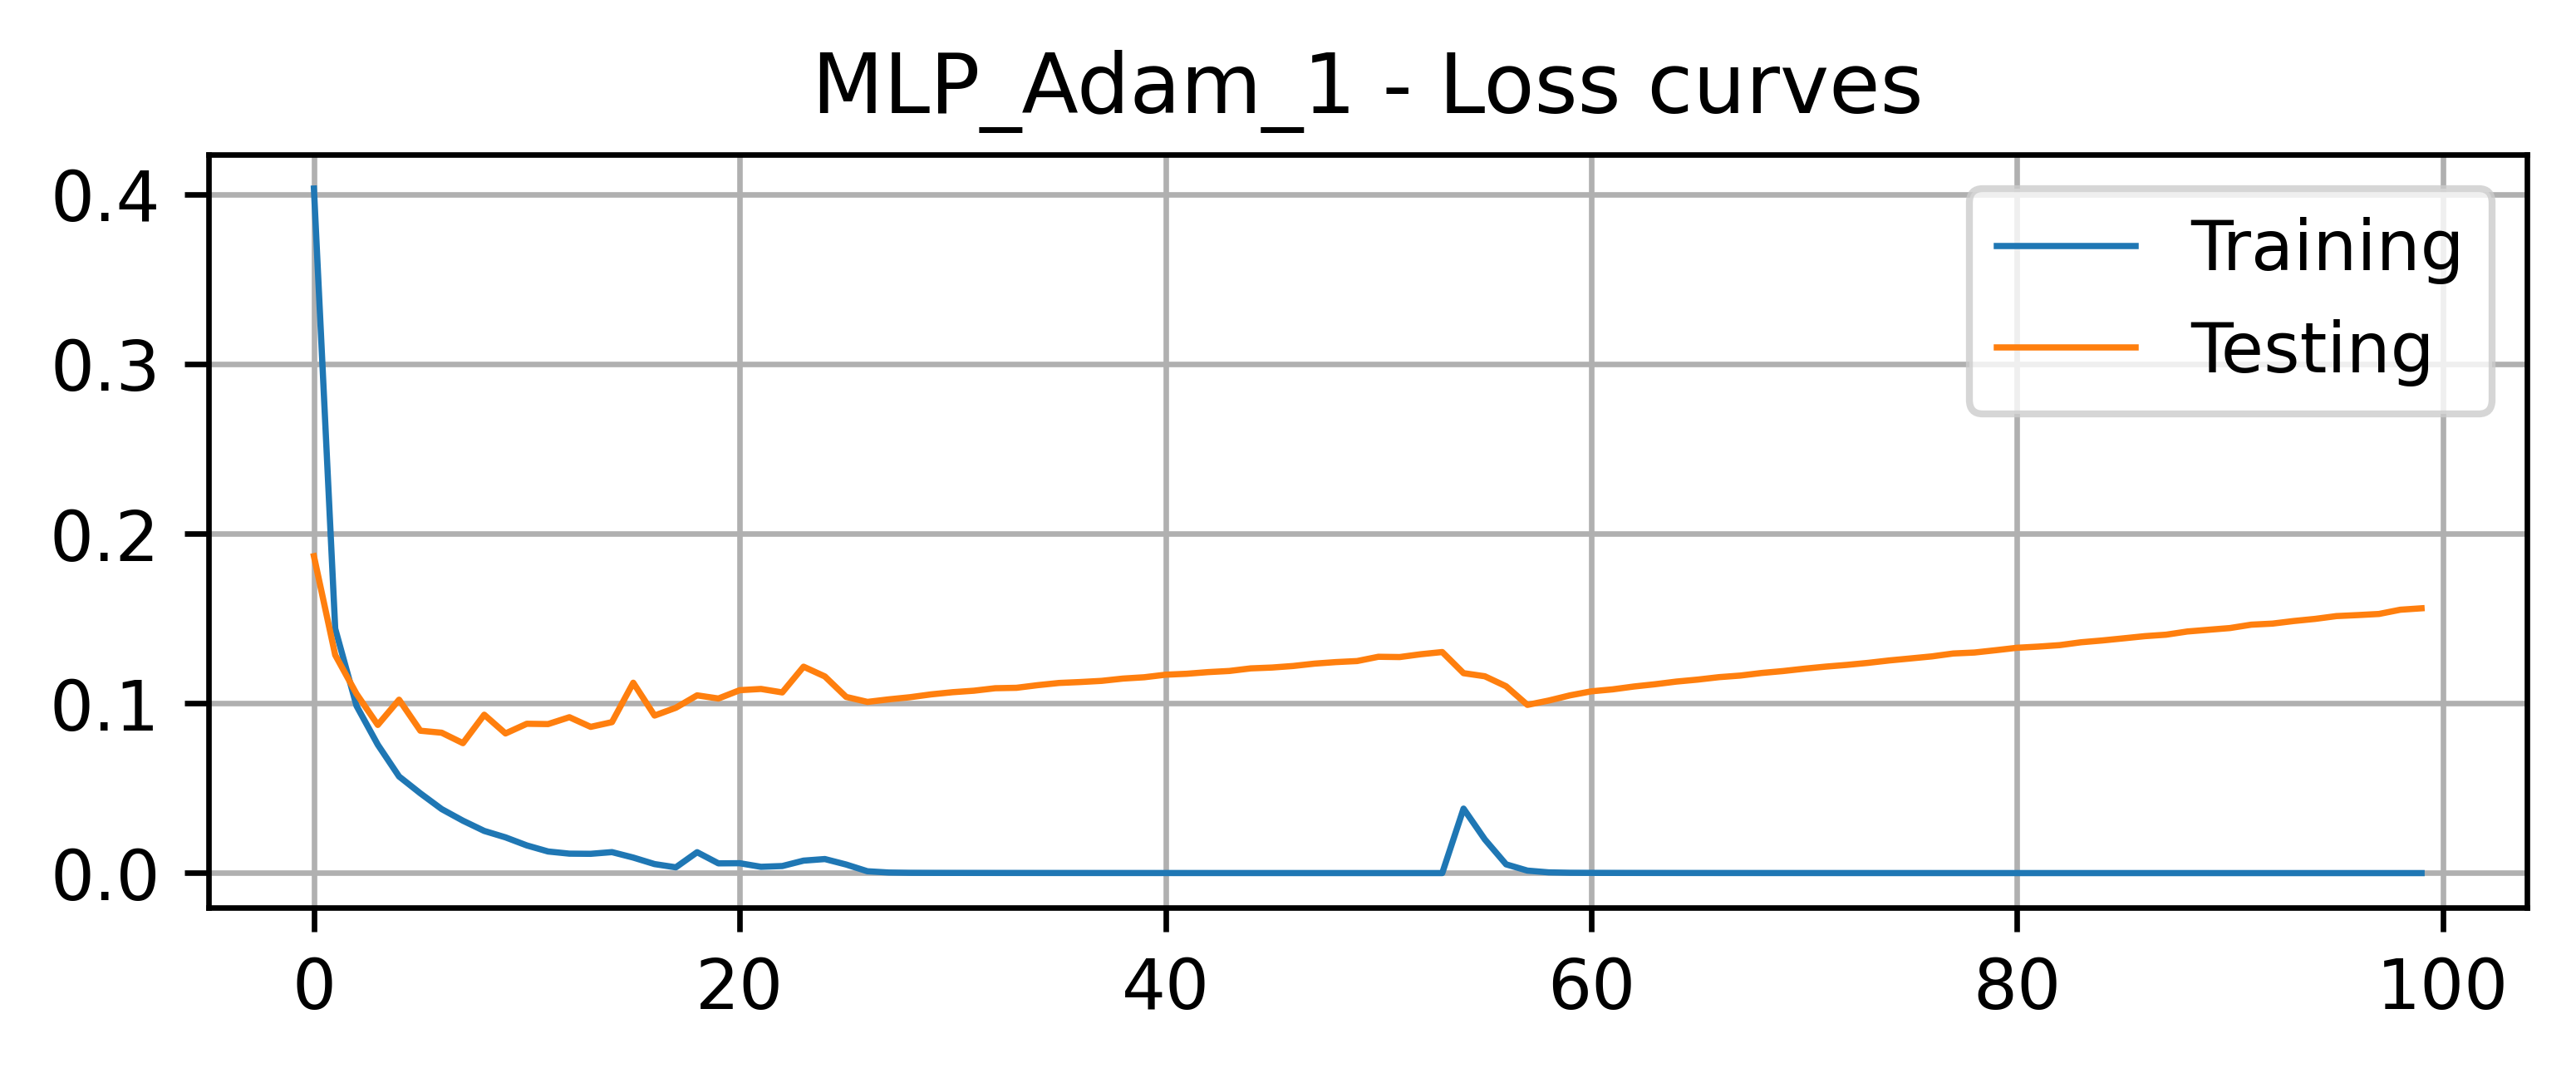

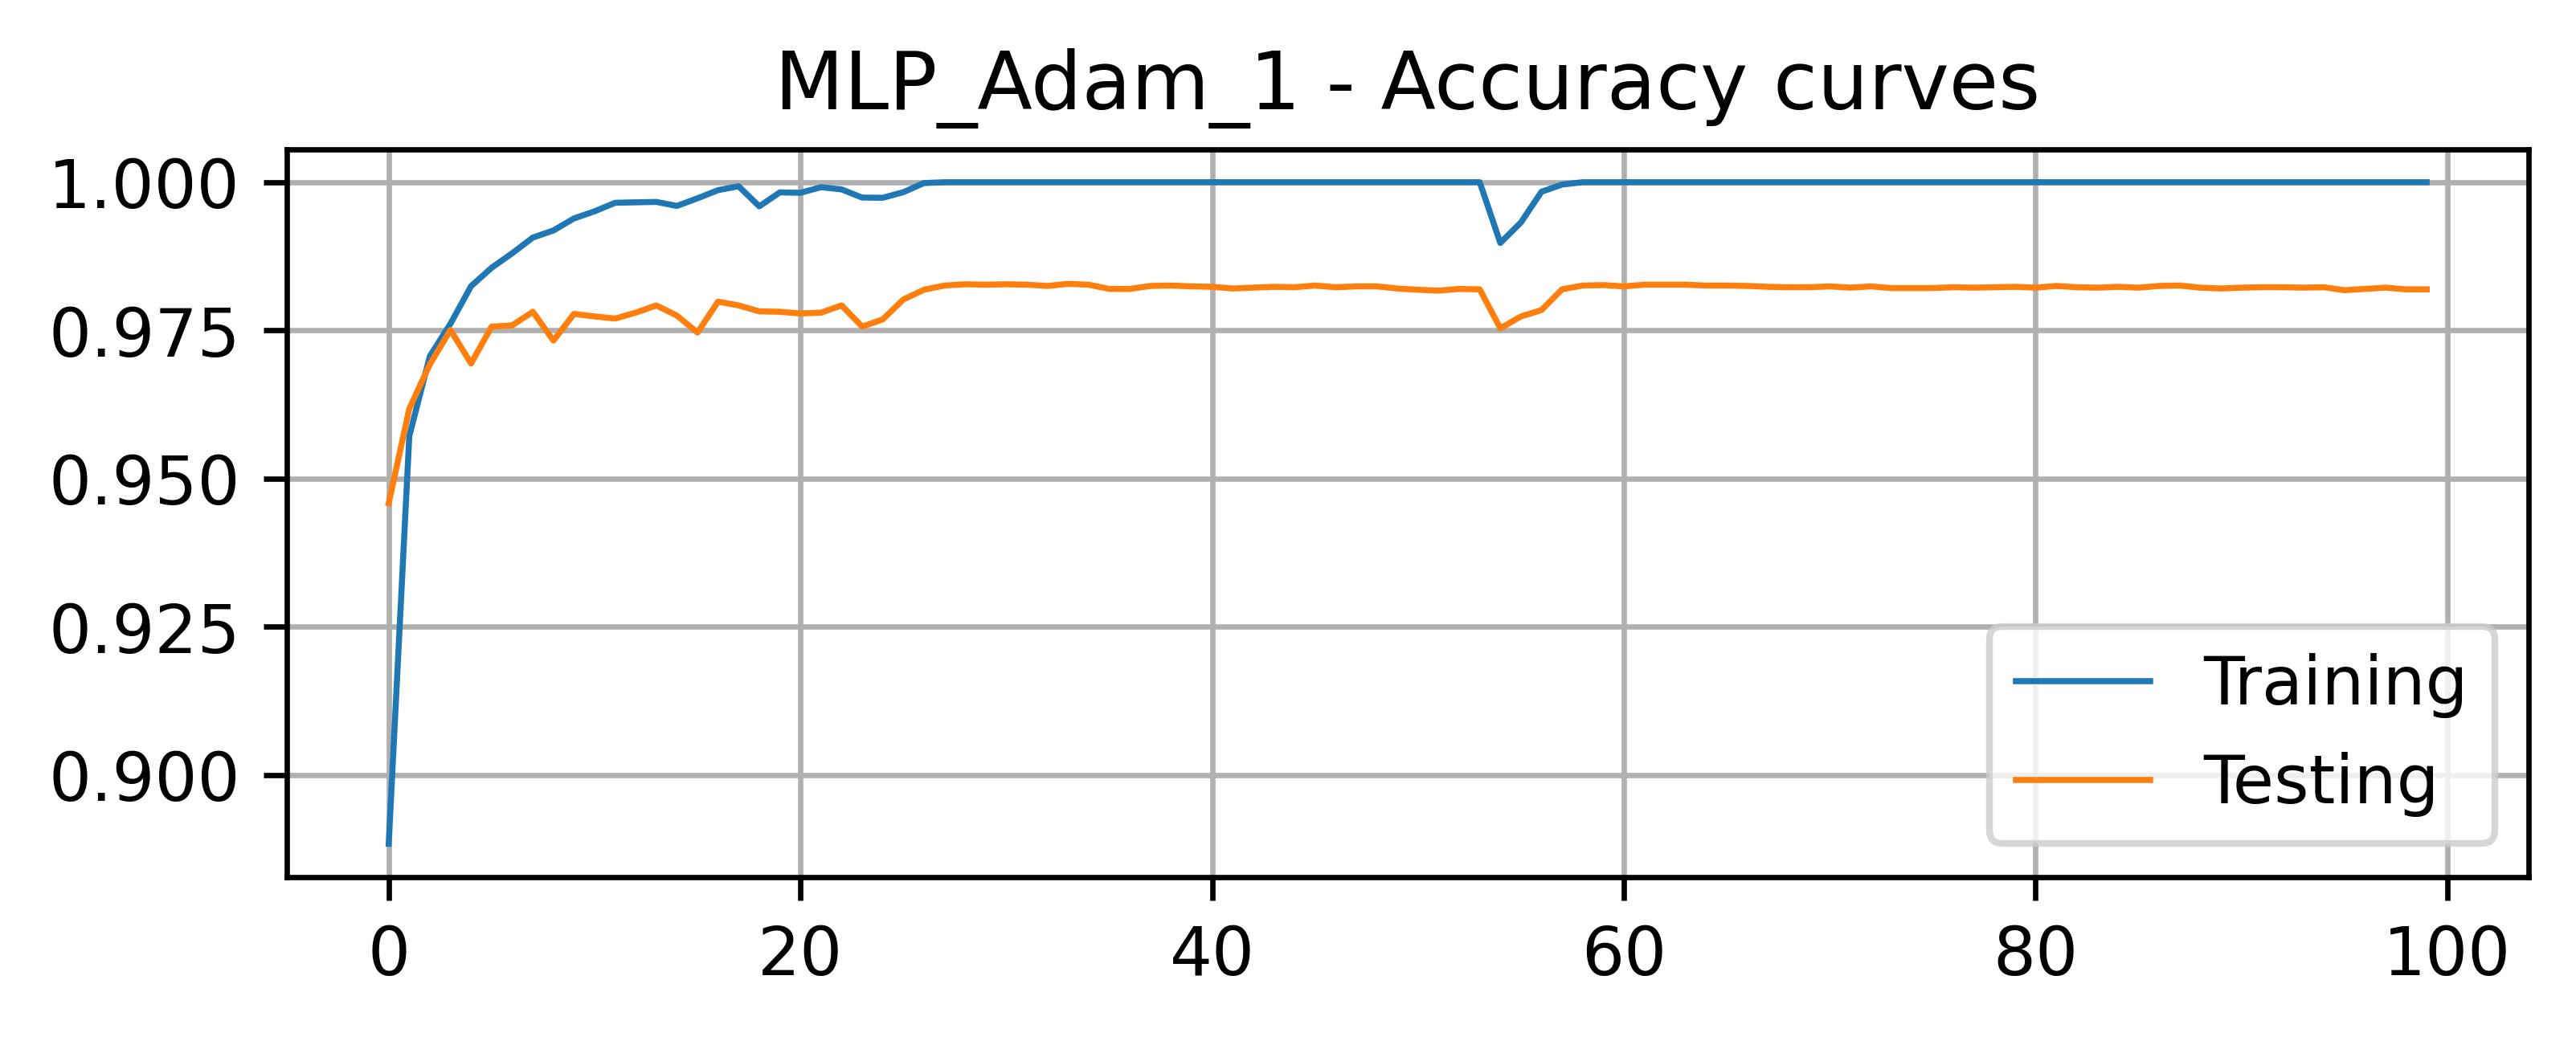

In [5]:
# display results
utils.disp_results(mlp_adam_1, X_train, y_train, X_test, y_test, mlp_adam_1_history)

High accuracy that is preserved in both training and testing data. In the loss curve we can notice that overfitting takes place very early, however it does not affect the accuracy in the first 100 training epochs. Probably the model keeps making the right predictions in the testing dataset, but will less "confidence". If we train for more epochs the accuracy in the testing dataset could start decreasing.

## $b$. $L2$ regularization

### $i)$ $\;\alpha=0.1$

In [6]:
a_reg = 0.1

In [7]:
# create model
mlp_adam_2 = utils.create_mlp("MLP_Adam_2", 
                            n_hidden_1, n_hidden_2, 
                            num_features, num_classes, kernel_reg="l2", a_reg=a_reg)

In [8]:
# compile model
mlp_adam_2.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=loss, 
                metrics=metrics)

# train model
mlp_adam_2_history = mlp_adam_2.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                        validation_data=(X_test, y_test), verbose=verbose)

Evaluation on training data:
1750/1750 [==============================] - 3s 2ms/step - loss: 2.2361 - accuracy: 0.6053
Evaluation on testing data:
438/438 [==============================] - 1s 1ms/step - loss: 2.2428 - accuracy: 0.6043


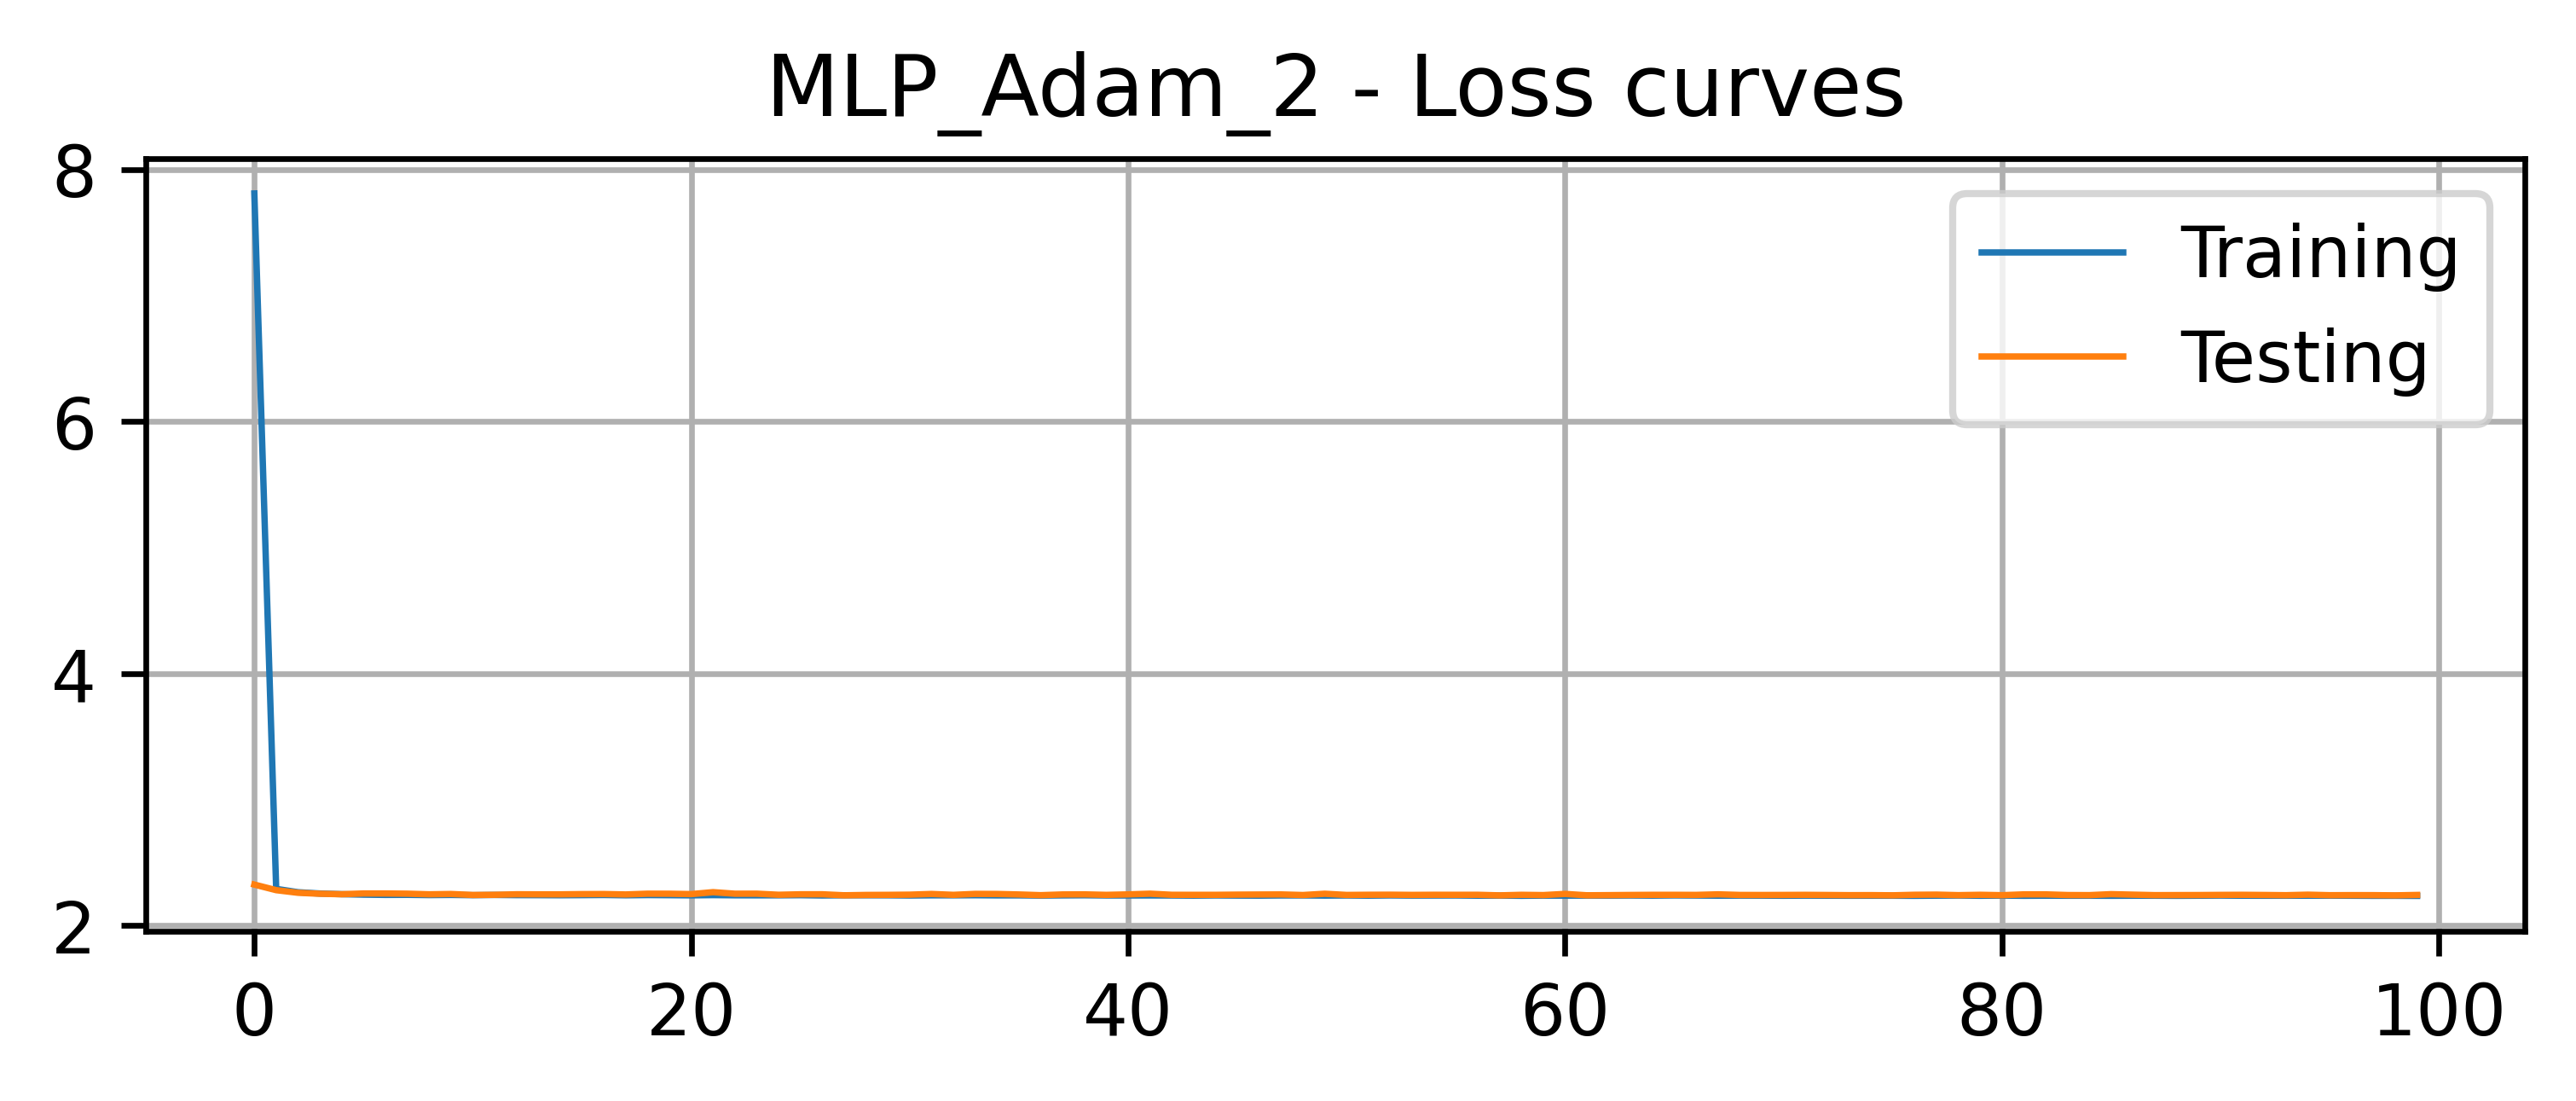

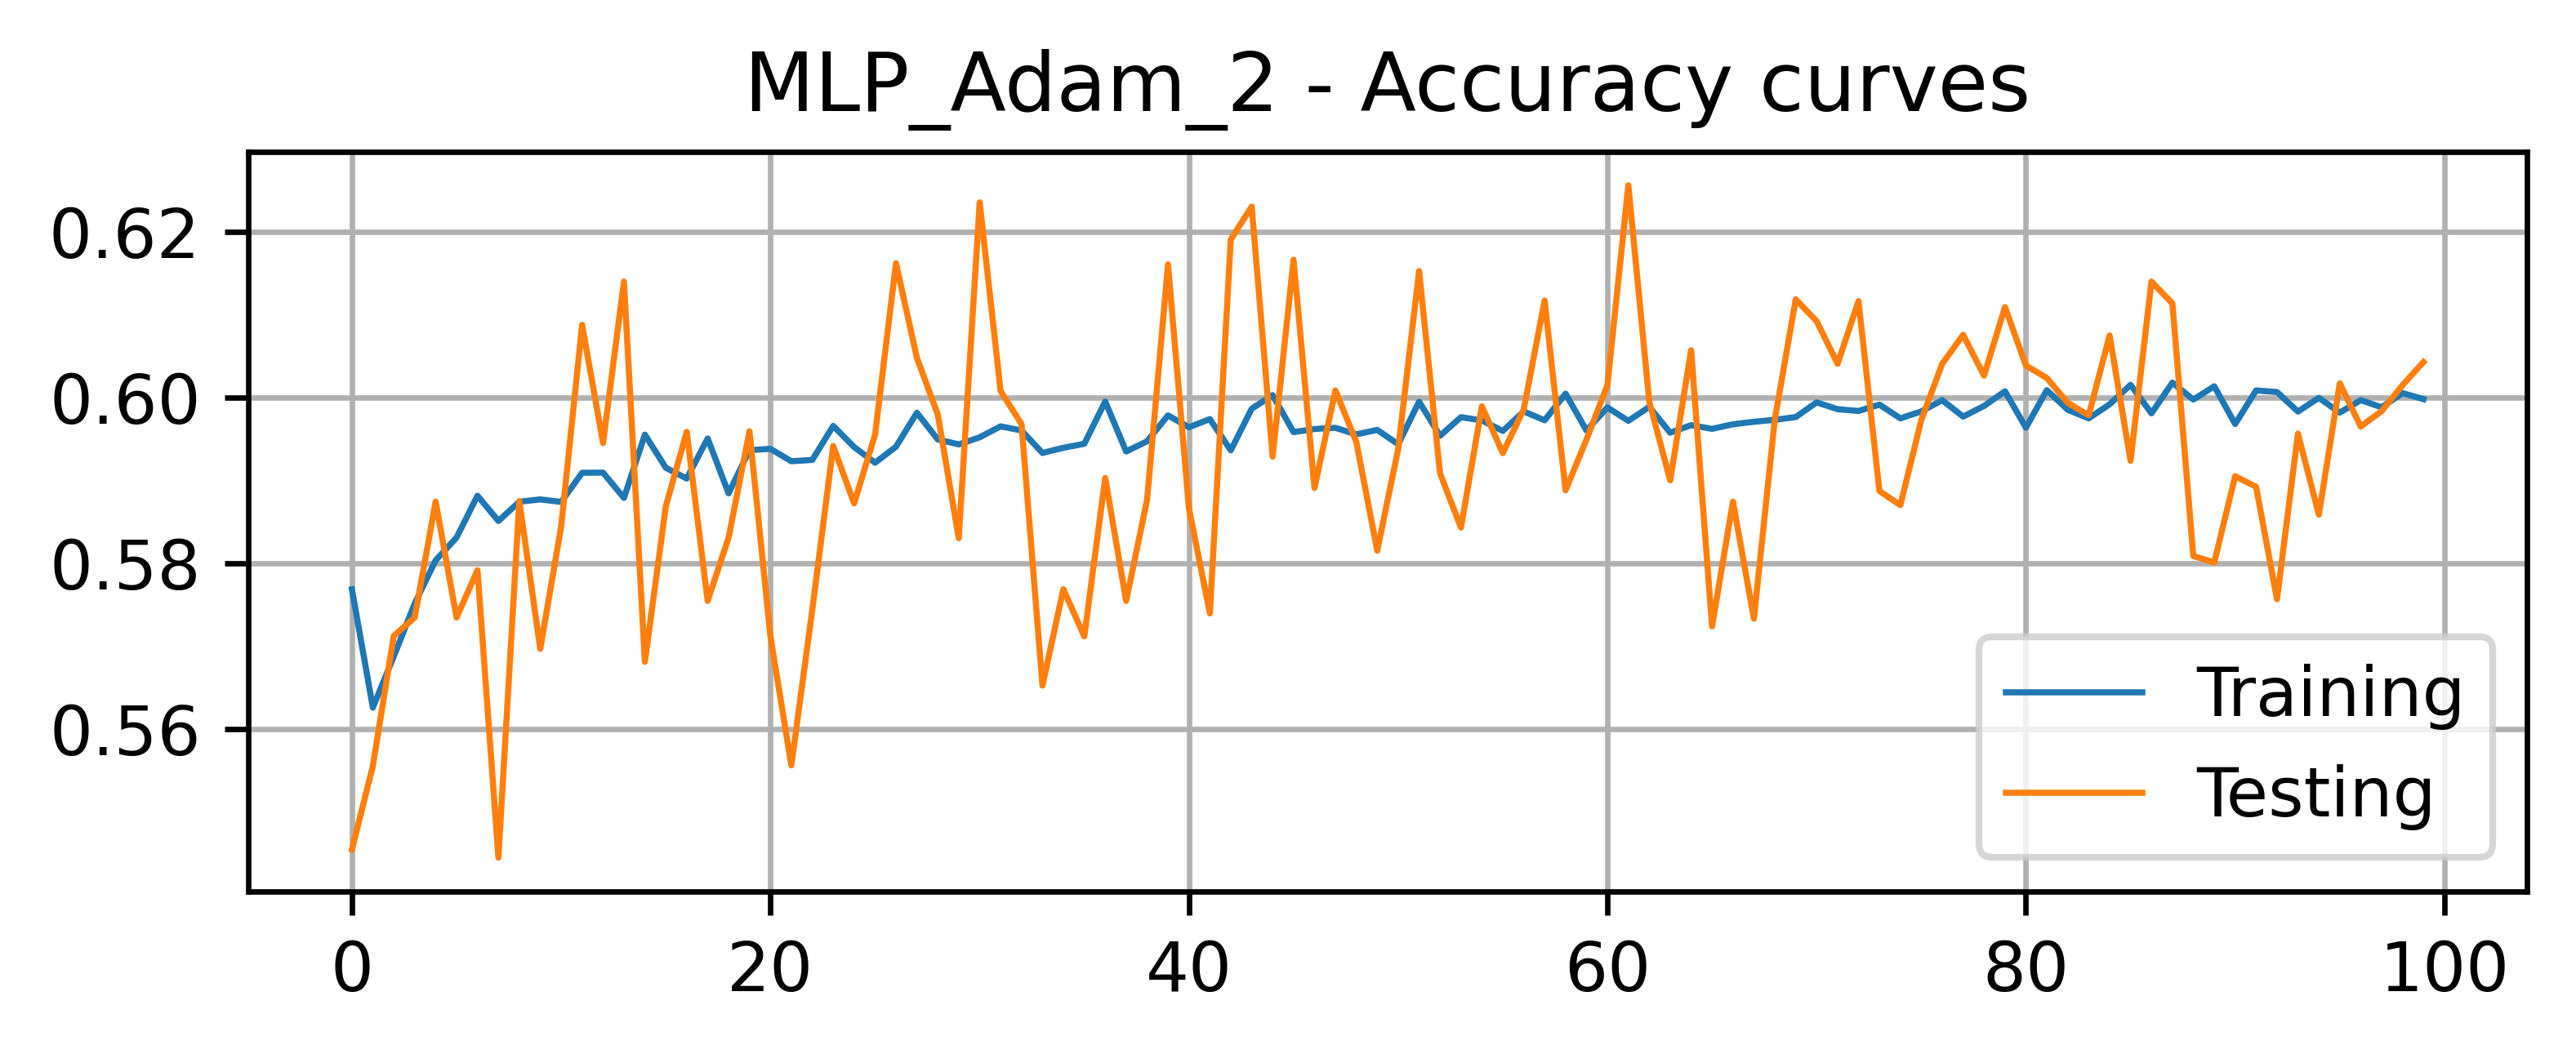

In [9]:
# display results
utils.disp_results(mlp_adam_2, X_train, y_train, X_test, y_test, mlp_adam_2_history)

Using $L2$ regularization with high value of $\alpha$, the performance of the model gets much worse. The loss curves do not fall below the value of 2, while the accuracy is obviously worse than the default case.

### $ii)$ $\;\alpha=0.01$

In [10]:
a_reg = 0.01

In [11]:
# create model
mlp_adam_3 = utils.create_mlp("MLP_Adam_3", 
                            n_hidden_1, n_hidden_2, 
                            num_features, num_classes, kernel_reg="l2", a_reg=a_reg)

In [12]:
# compile model
mlp_adam_3.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=loss, 
                metrics=metrics)

# train model
mlp_adam_3_history = mlp_adam_3.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                        validation_data=(X_test, y_test), verbose=verbose)

Evaluation on training data:
1750/1750 [==============================] - 3s 2ms/step - loss: 0.7339 - accuracy: 0.9196
Evaluation on testing data:
438/438 [==============================] - 1s 1ms/step - loss: 0.7334 - accuracy: 0.9211


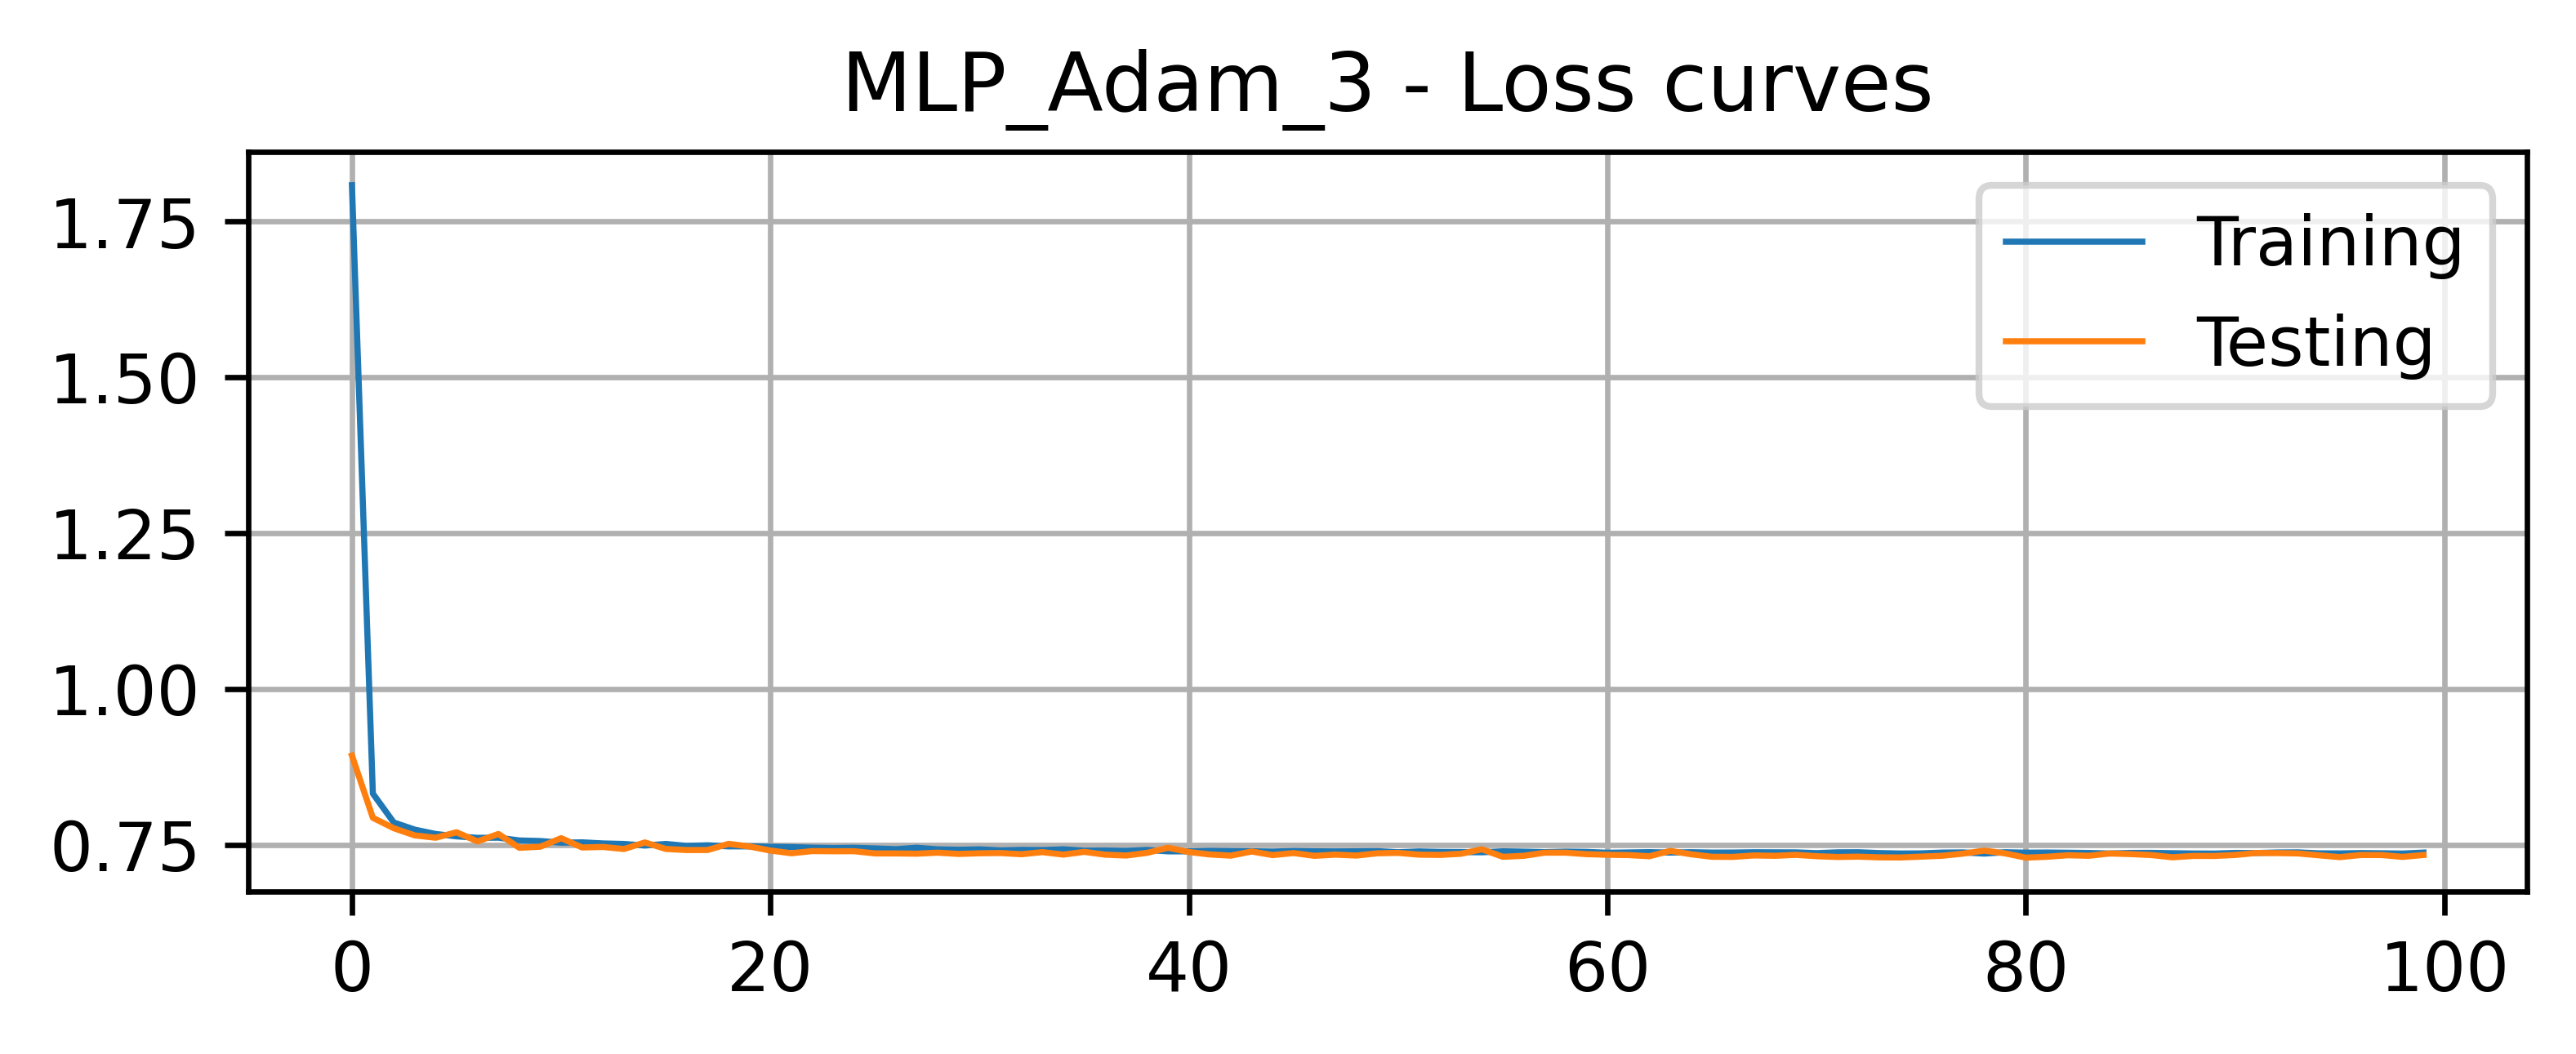

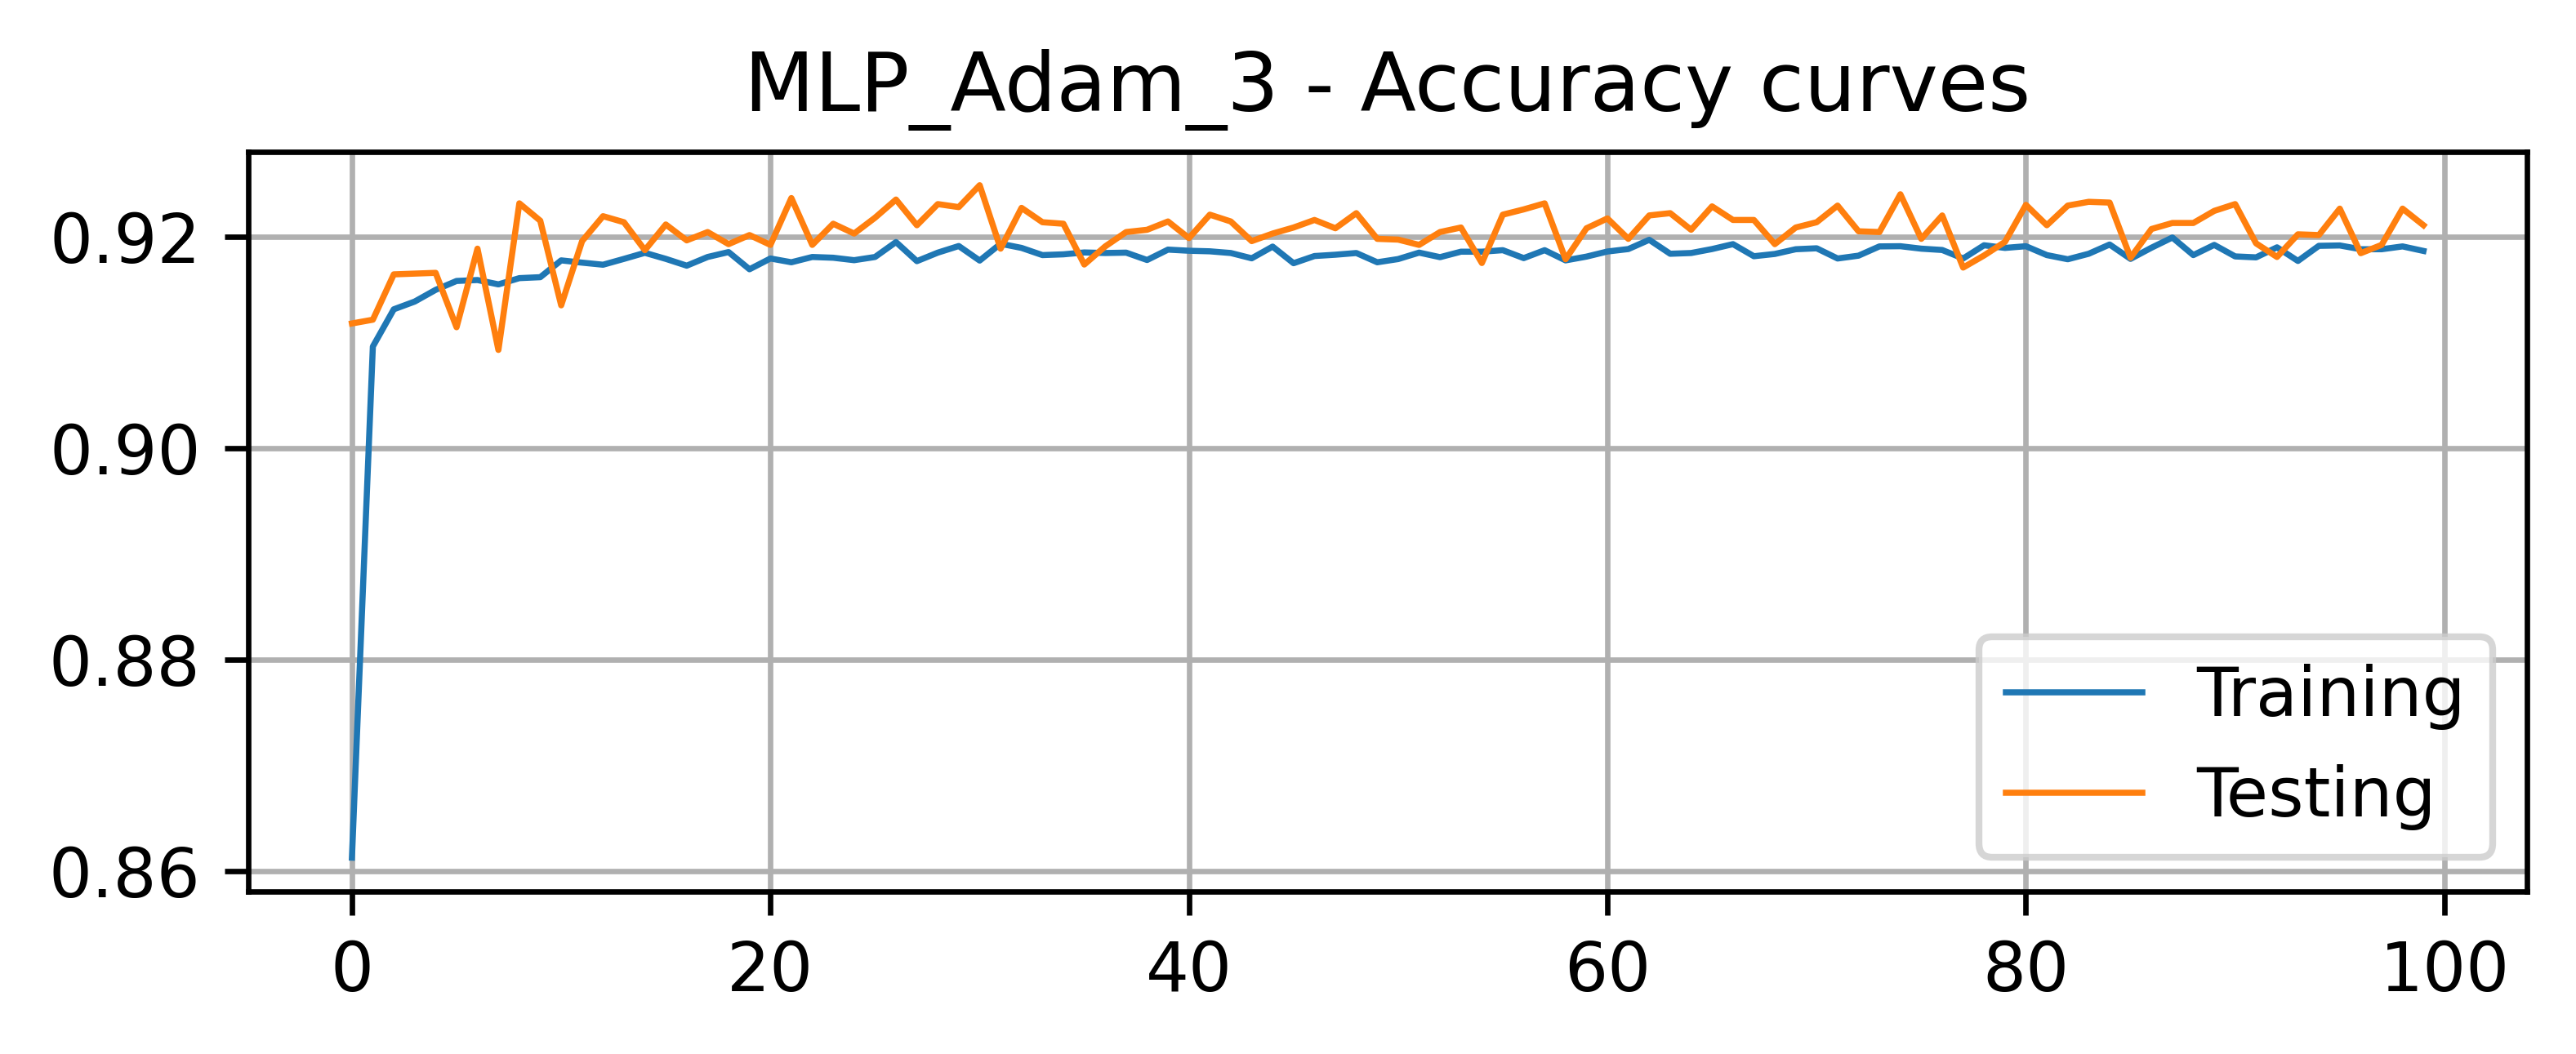

In [13]:
# display results
utils.disp_results(mlp_adam_3, X_train, y_train, X_test, y_test, mlp_adam_3_history)

Decreasing the value of $\alpha$ recover the performance of the model, but it is still worse than the default case. However, we can notice that the accuracy score of testing data surpasses the one of the training data. Overfitting is prevented.

### $iii)$ $\;\alpha=0.001$

In [14]:
a_reg = 0.001

In [15]:
# create model
mlp_adam_4 = utils.create_mlp("MLP_Adam_4", 
                            n_hidden_1, n_hidden_2, 
                            num_features, num_classes, kernel_reg="l2", a_reg=a_reg)

In [16]:
# compile model
mlp_adam_4.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=loss, 
                metrics=metrics)

# train model
mlp_adam_4_history = mlp_adam_4.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                        validation_data=(X_test, y_test), verbose=verbose)

Evaluation on training data:
1750/1750 [==============================] - 3s 2ms/step - loss: 0.1816 - accuracy: 0.9865
Evaluation on testing data:
438/438 [==============================] - 1s 1ms/step - loss: 0.2065 - accuracy: 0.9770


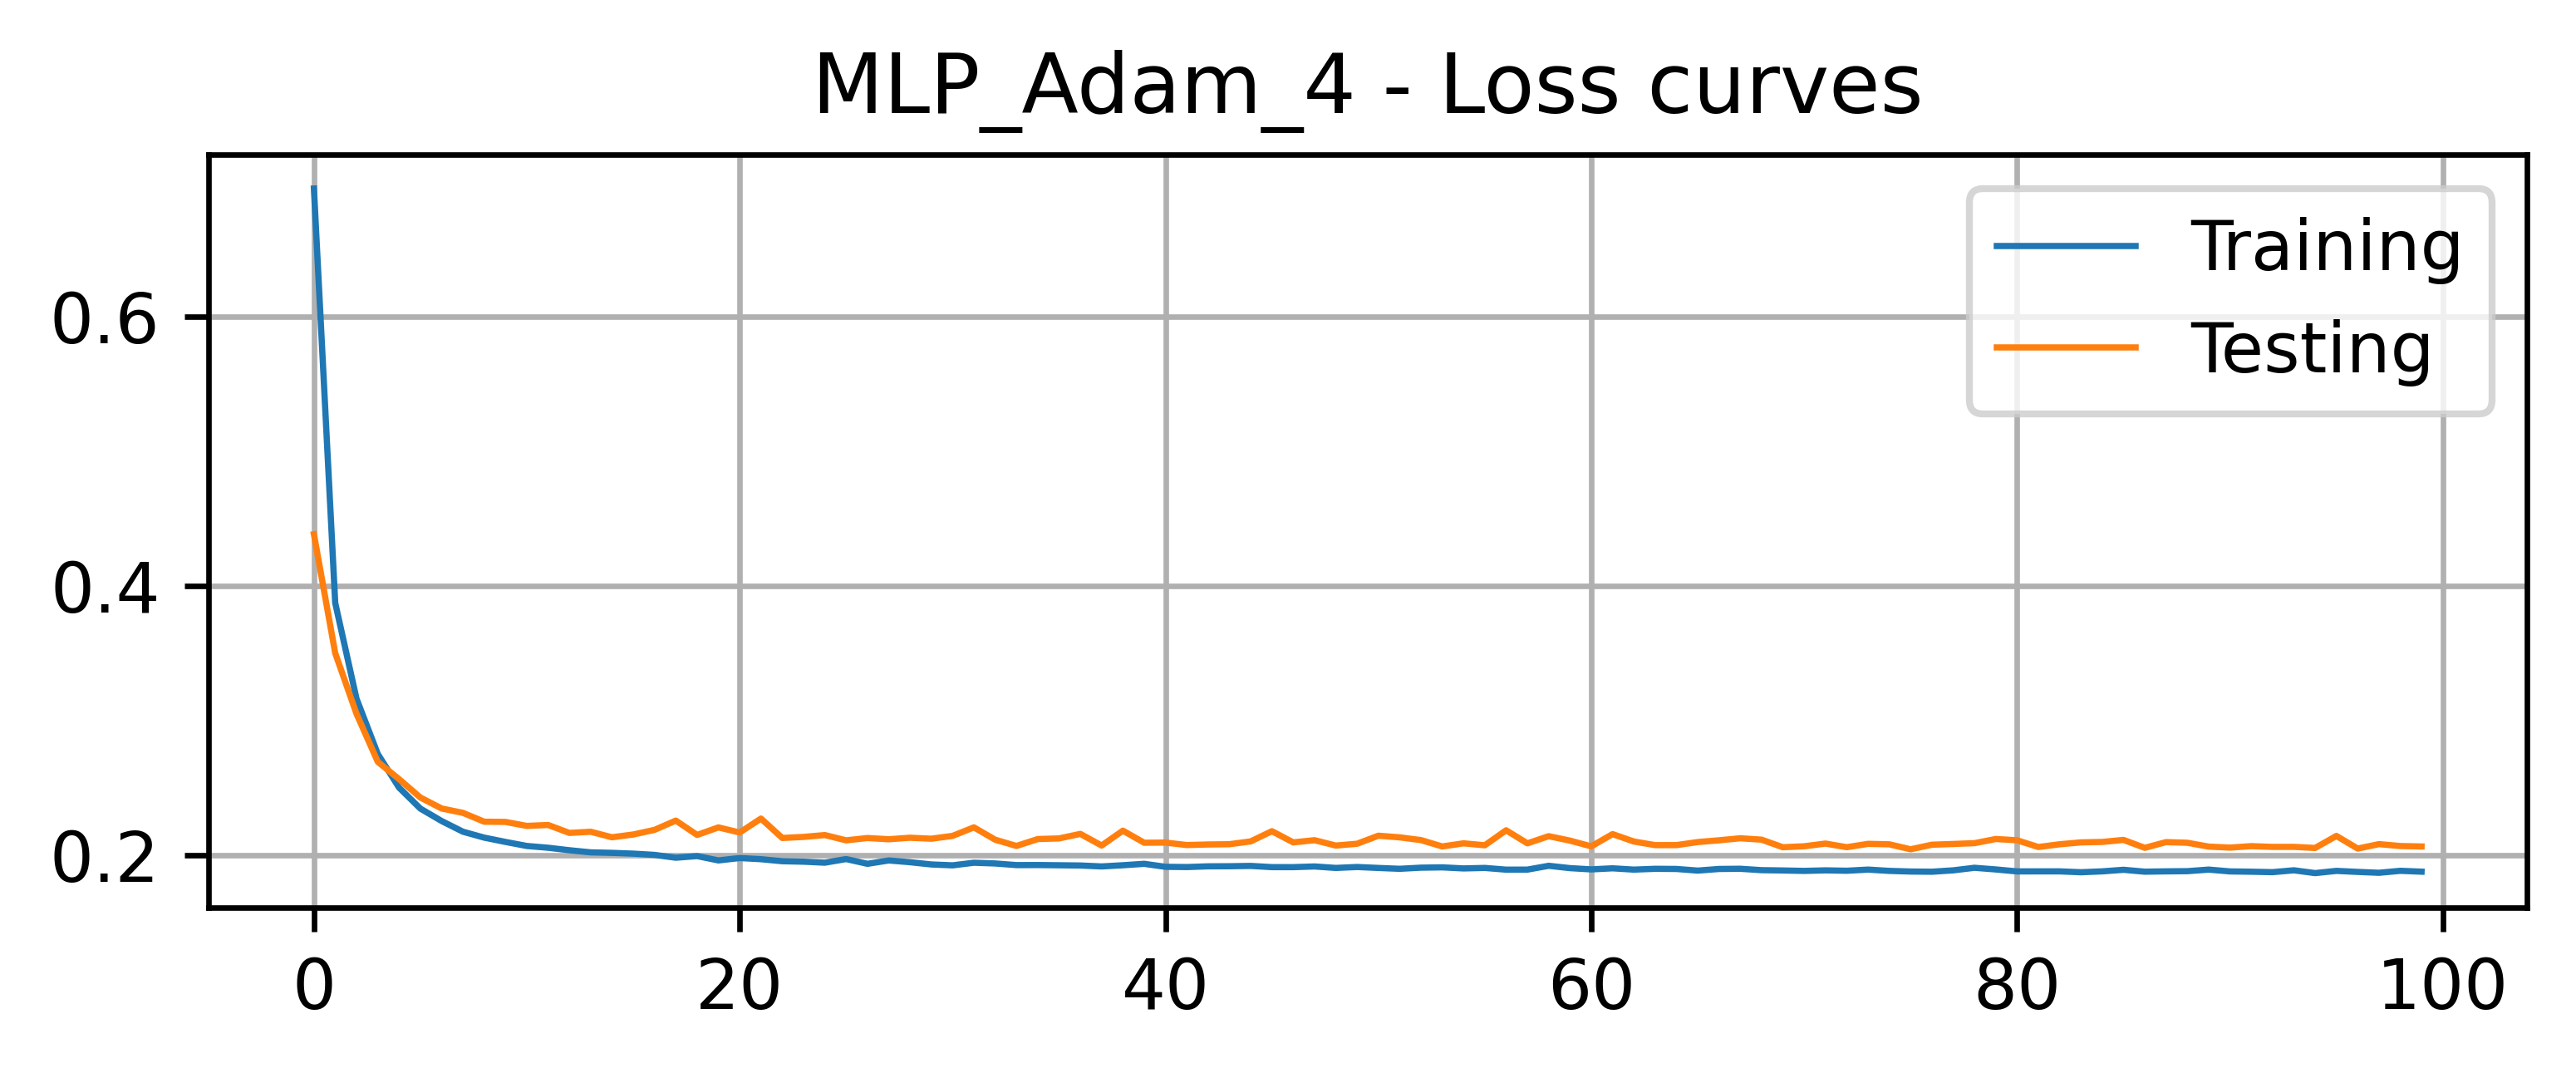

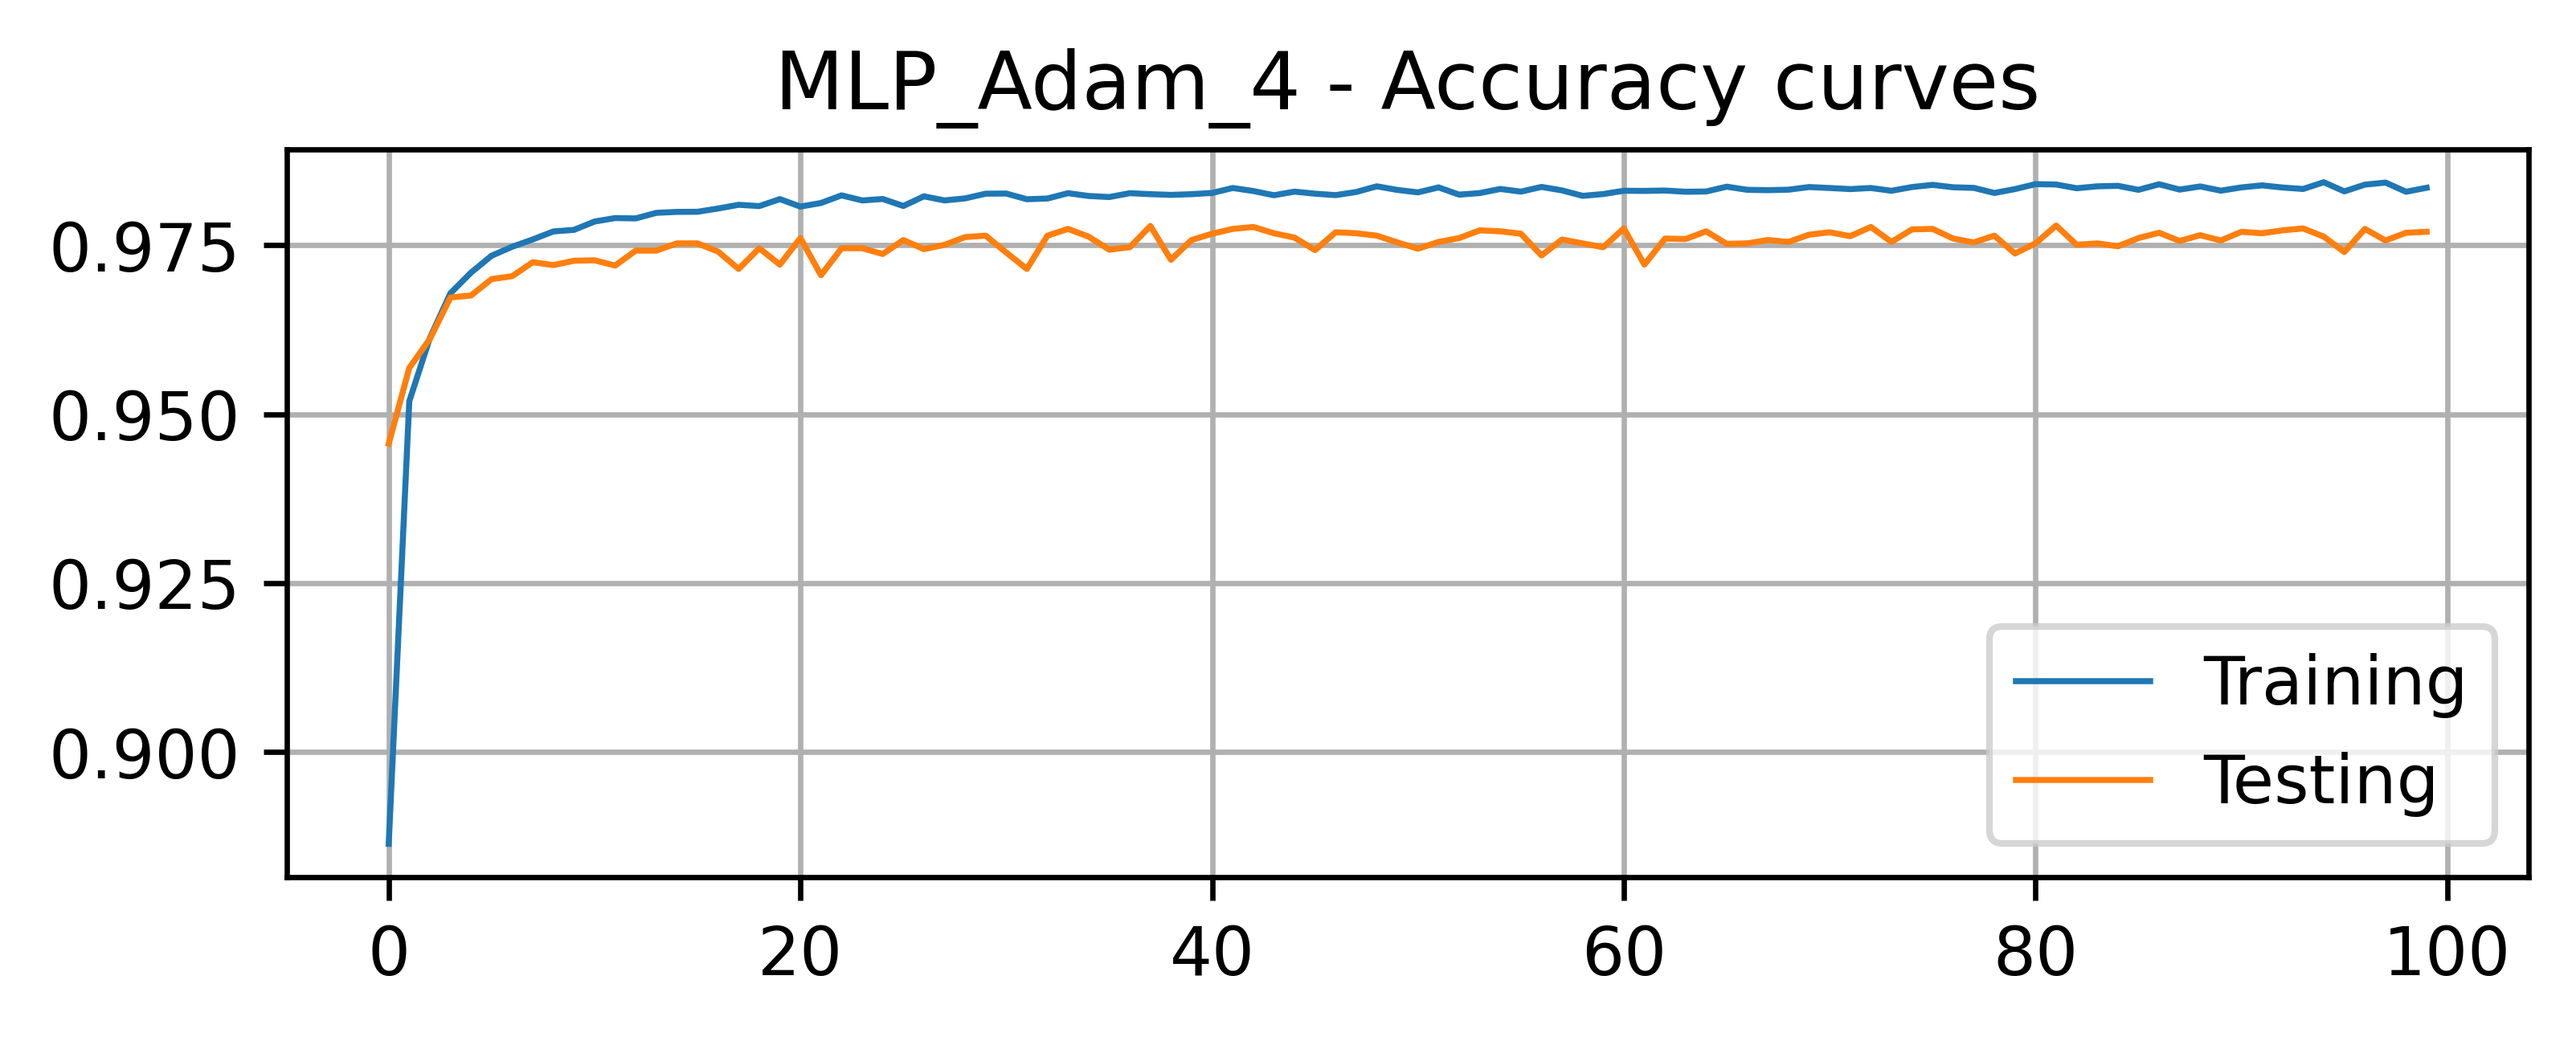

In [17]:
# display results
utils.disp_results(mlp_adam_4, X_train, y_train, X_test, y_test, mlp_adam_4_history)

Decreasing even more the value of $\alpha$ we get even better performance, however it is still worse of the default case. Overall, we can conclude that $L2$ regularization worsens the performance of *Adam* optimizer, but prevents overfitting.

## $c$. $L1$ regularization ($\alpha=0.01$) & Dropout ($probability=0.3$)

In [18]:
a_reg = 0.01
dropout_prob = 0.3

In [19]:
# create model
mlp_adam_5 = utils.create_mlp("MLP_Adam_5", 
                            n_hidden_1, n_hidden_2, 
                            num_features, num_classes, kernel_reg="l1", a_reg=a_reg,
                            dropout_layers=True, dropout_prob=dropout_prob)

In [20]:
# compile model
mlp_adam_5.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=loss, 
                metrics=metrics)

# train model
mlp_adam_5_history = mlp_adam_5.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                        validation_data=(X_test, y_test), verbose=verbose)

Evaluation on training data:
1750/1750 [==============================] - 3s 2ms/step - loss: 2.4685 - accuracy: 0.1134
Evaluation on testing data:
438/438 [==============================] - 1s 1ms/step - loss: 2.4697 - accuracy: 0.1089


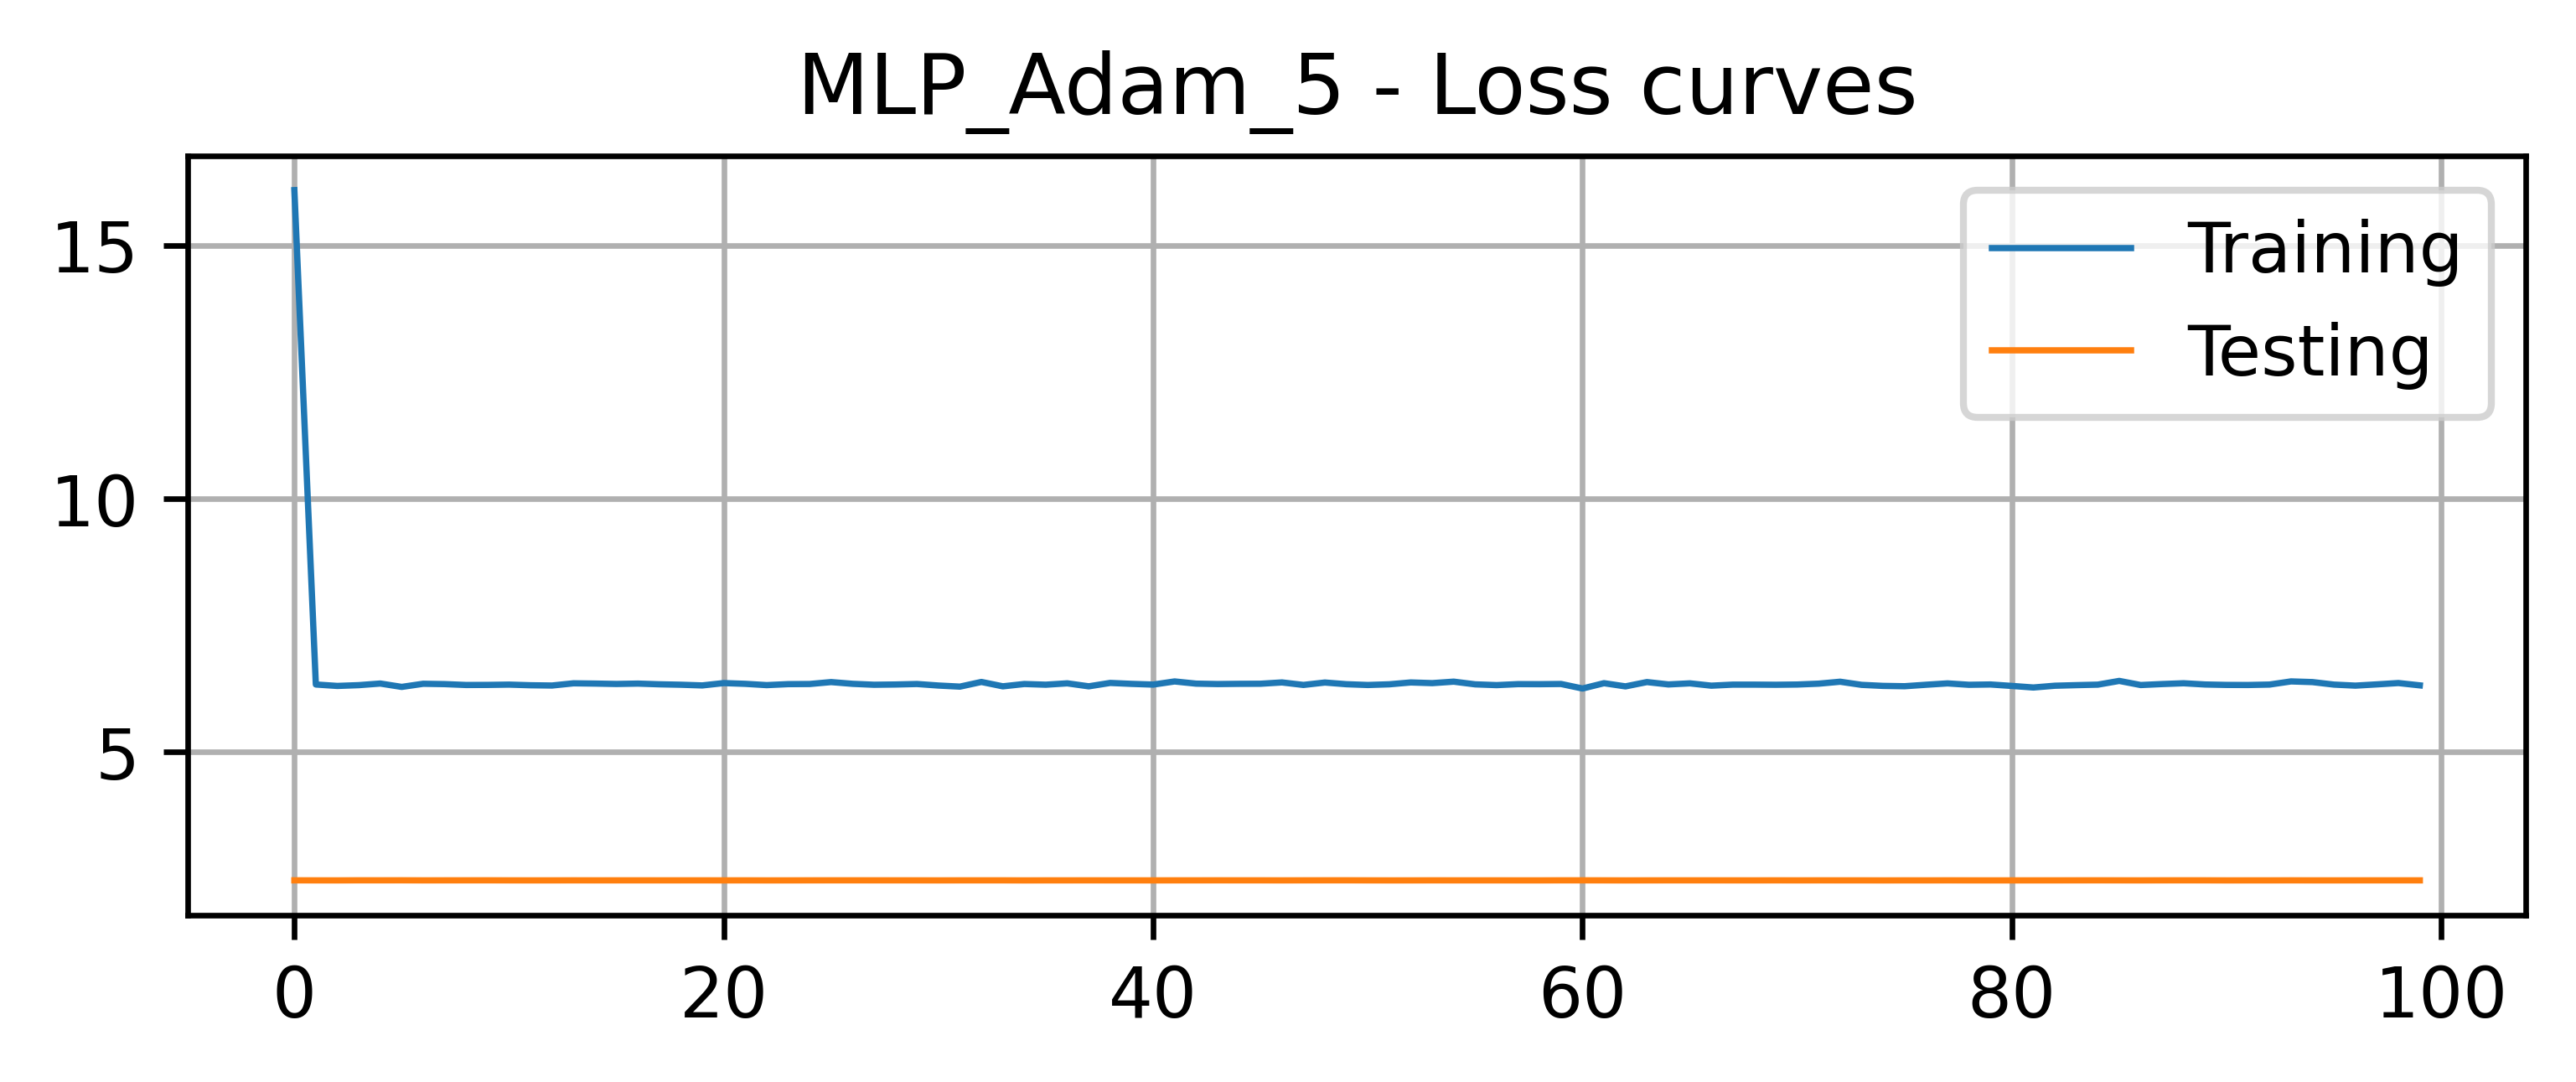

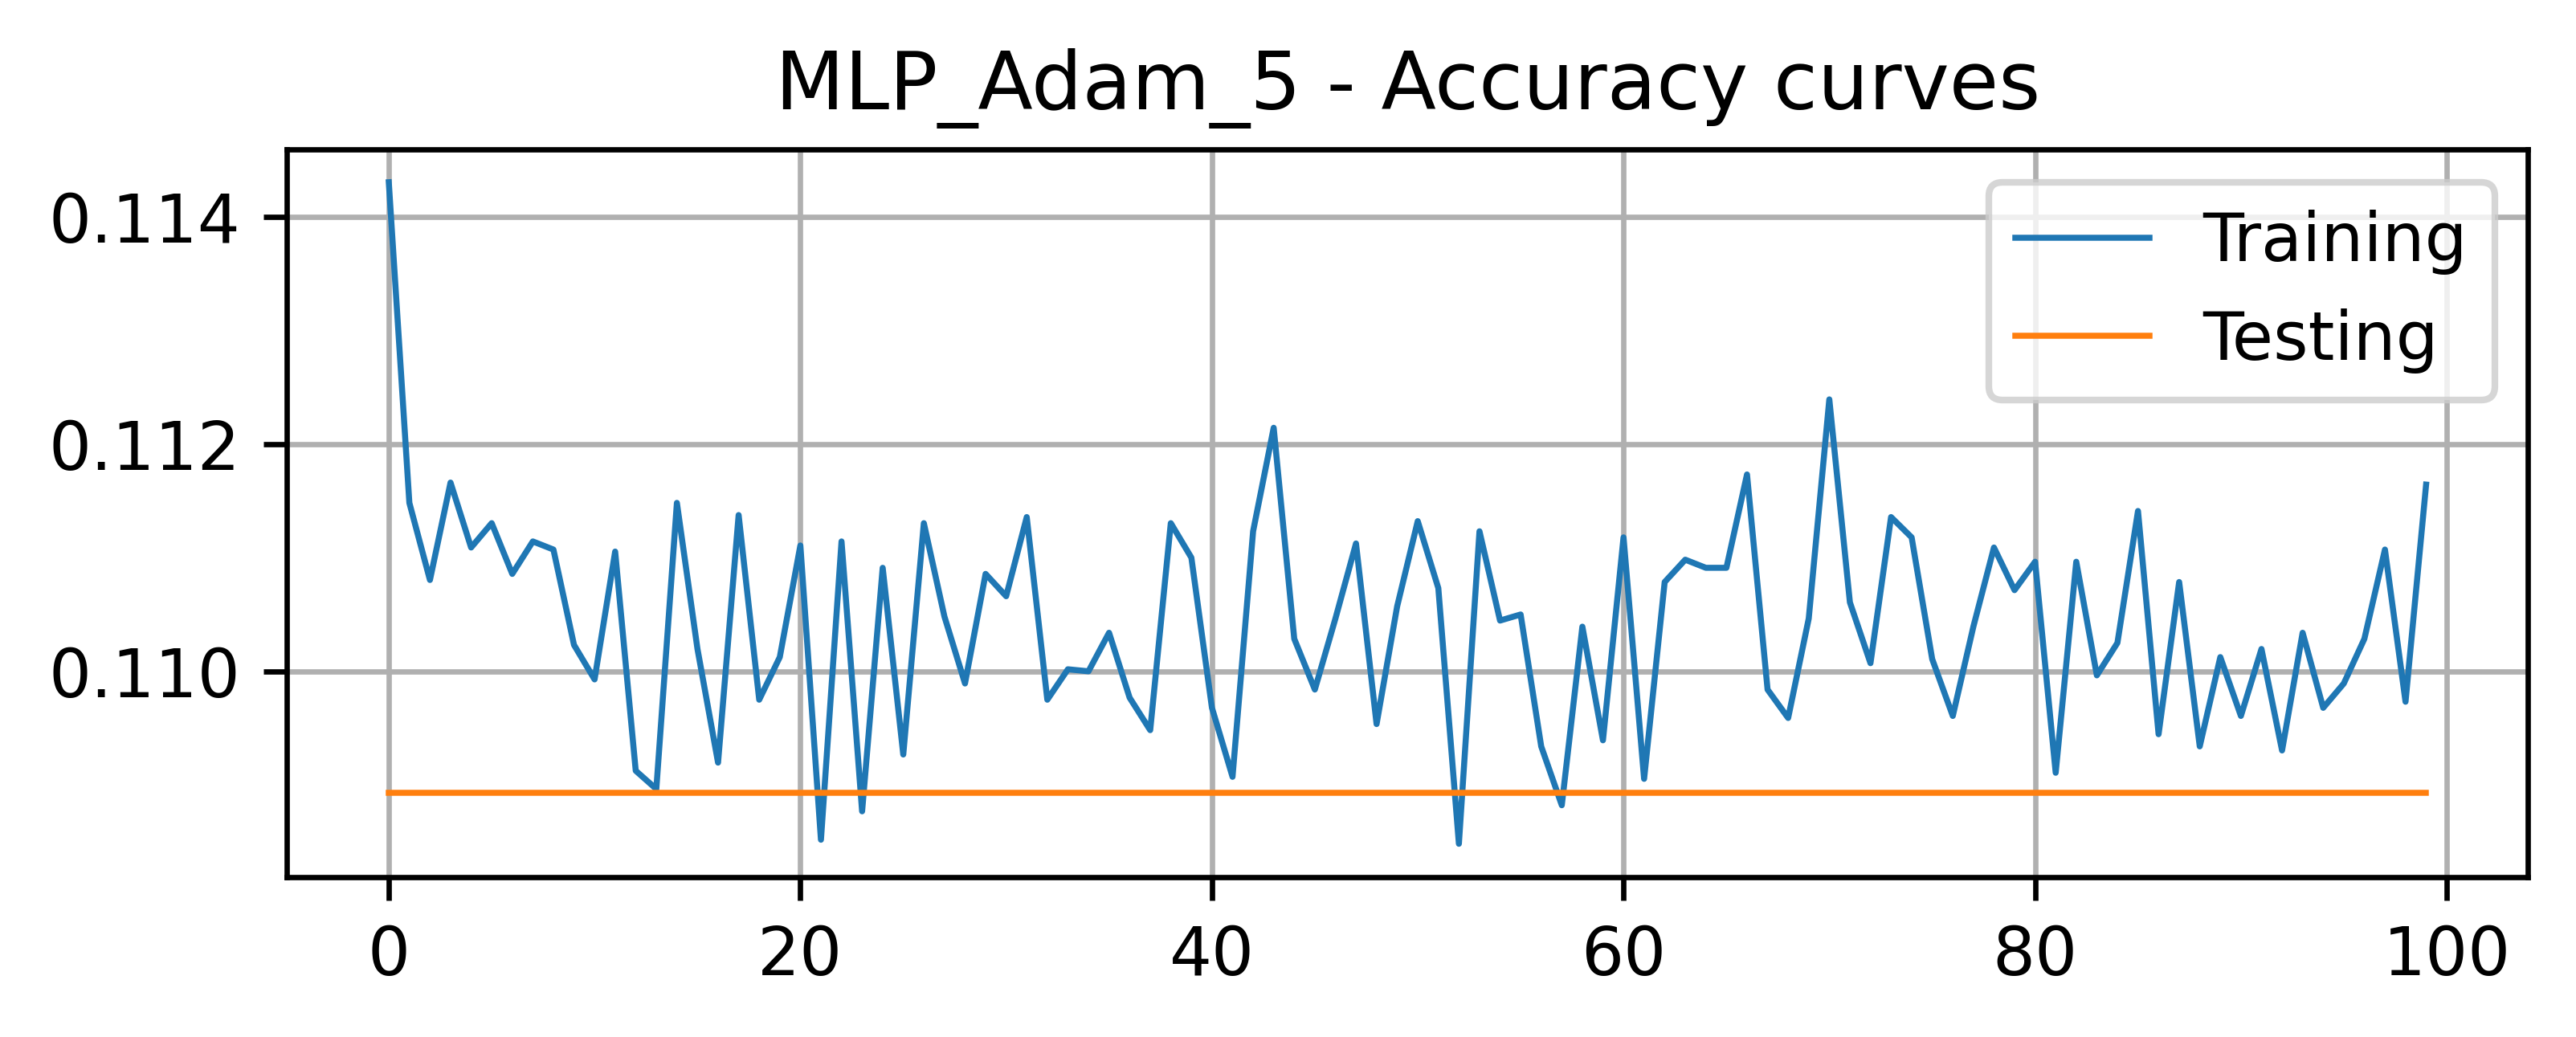

In [21]:
# display results
utils.disp_results(mlp_adam_5, X_train, y_train, X_test, y_test, mlp_adam_5_history)

Very bad results and underfitting. $L1$ regularization and dropout layers destroy the performance of the model.

# **$2$. MLP with RMSProp optimizer**

## $a$. Default Case

### $i)$ $\;\rho=0.01$

In [22]:
rho = 0.01

In [23]:
# create model
mlp_rmsprop_1 = utils.create_mlp("MLP_RMSProp_1", 
                            n_hidden_1, n_hidden_2, 
                            num_features, num_classes)

In [24]:
# compile model
mlp_rmsprop_1.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=rho),
                    loss=loss, 
                    metrics=metrics)

# train model
mlp_rmsprop_1_history = mlp_rmsprop_1.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=verbose)

Evaluation on training data:
1750/1750 [==============================] - 3s 2ms/step - loss: 5.3714e-06 - accuracy: 1.0000
Evaluation on testing data:
438/438 [==============================] - 1s 2ms/step - loss: 0.4435 - accuracy: 0.9784


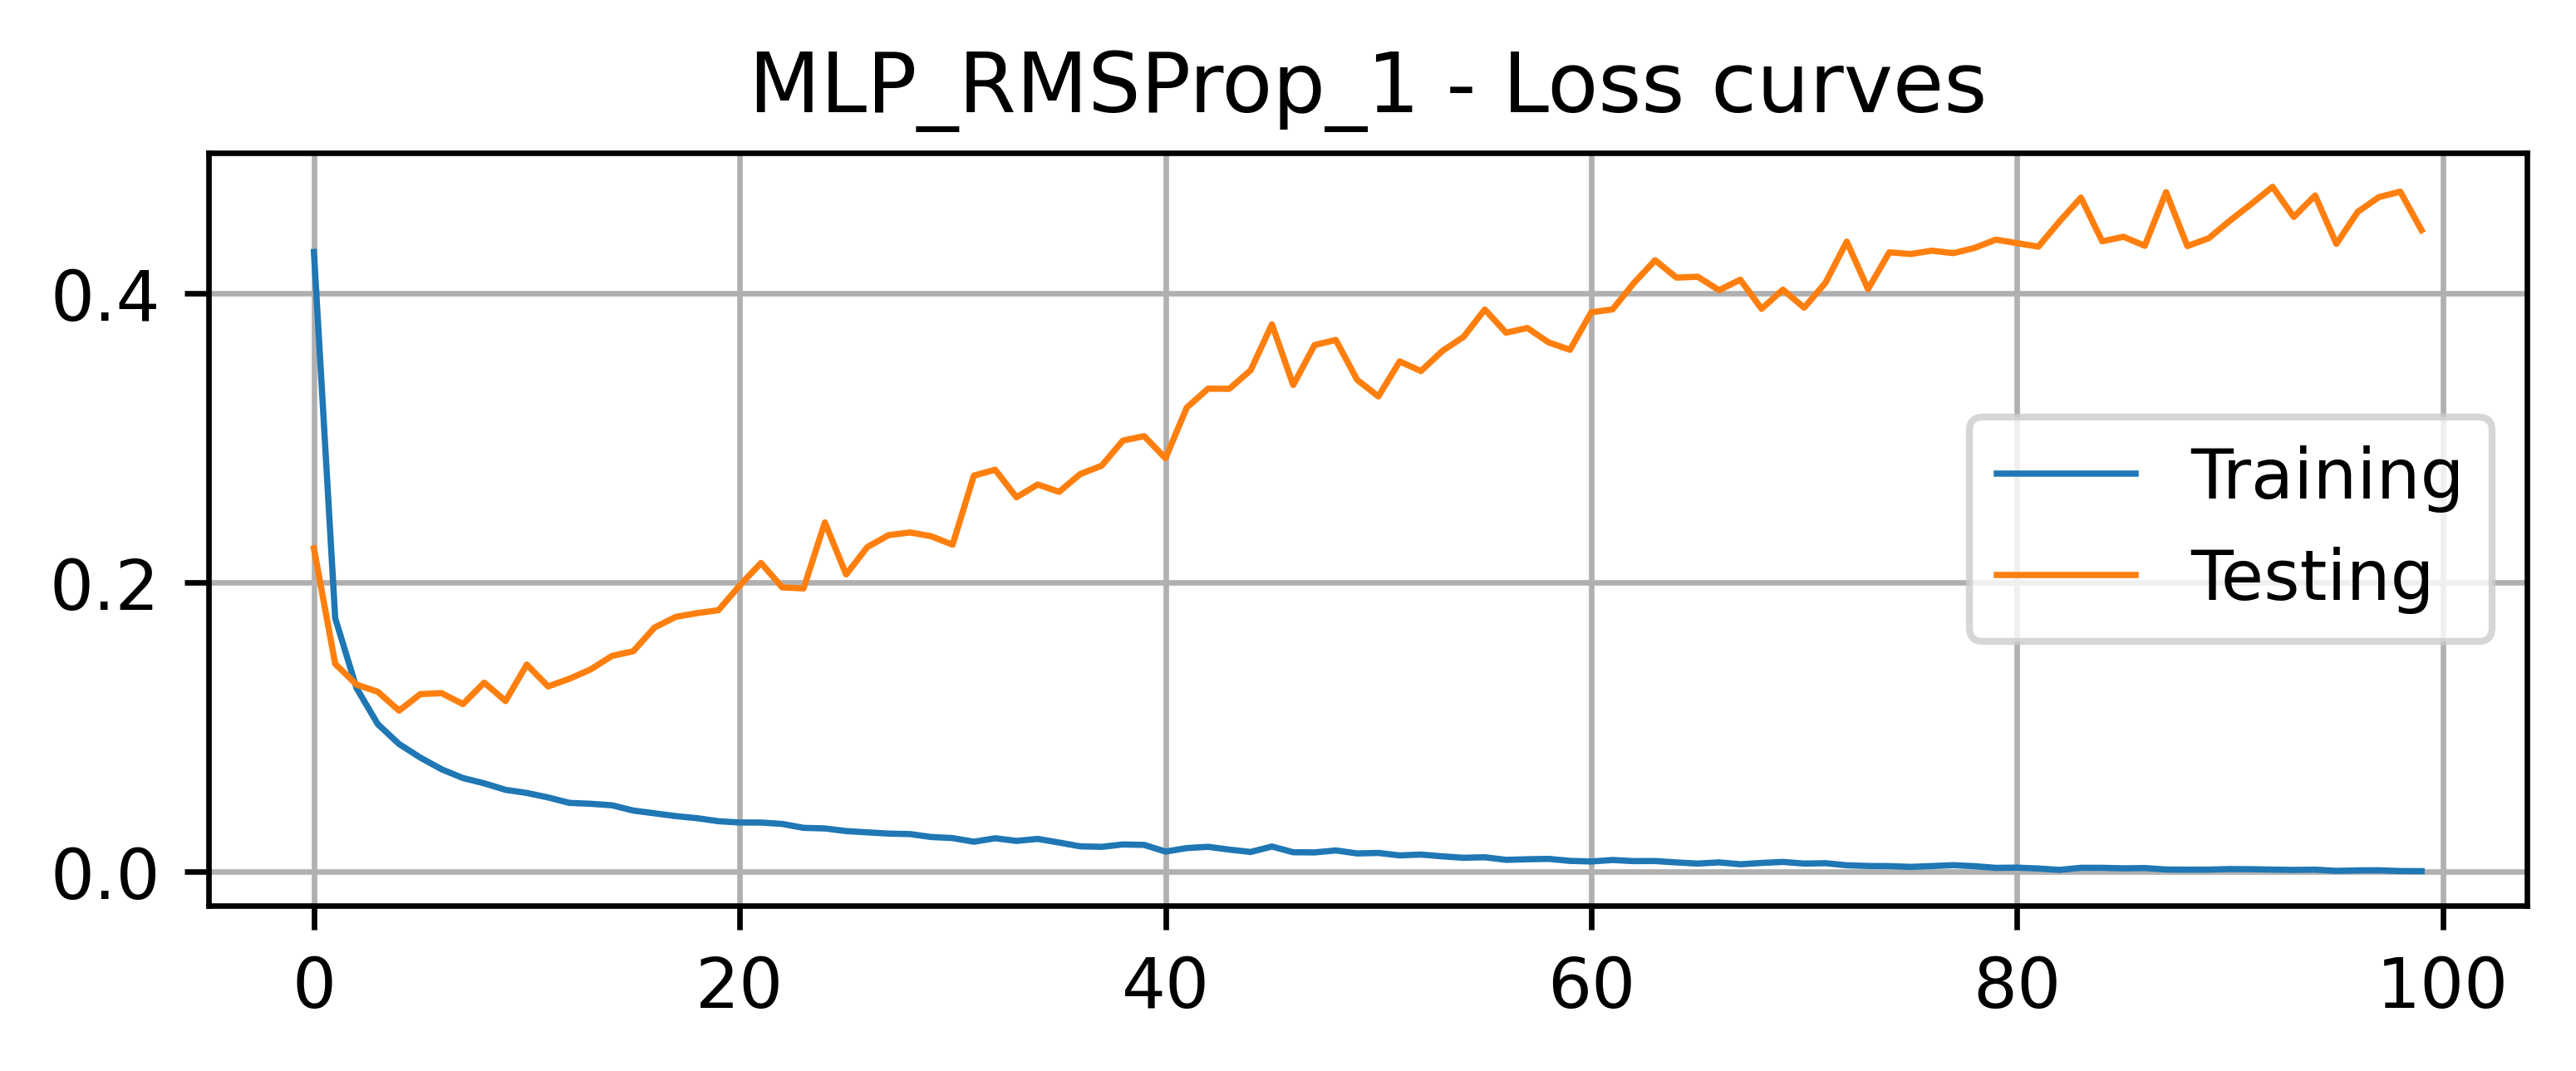

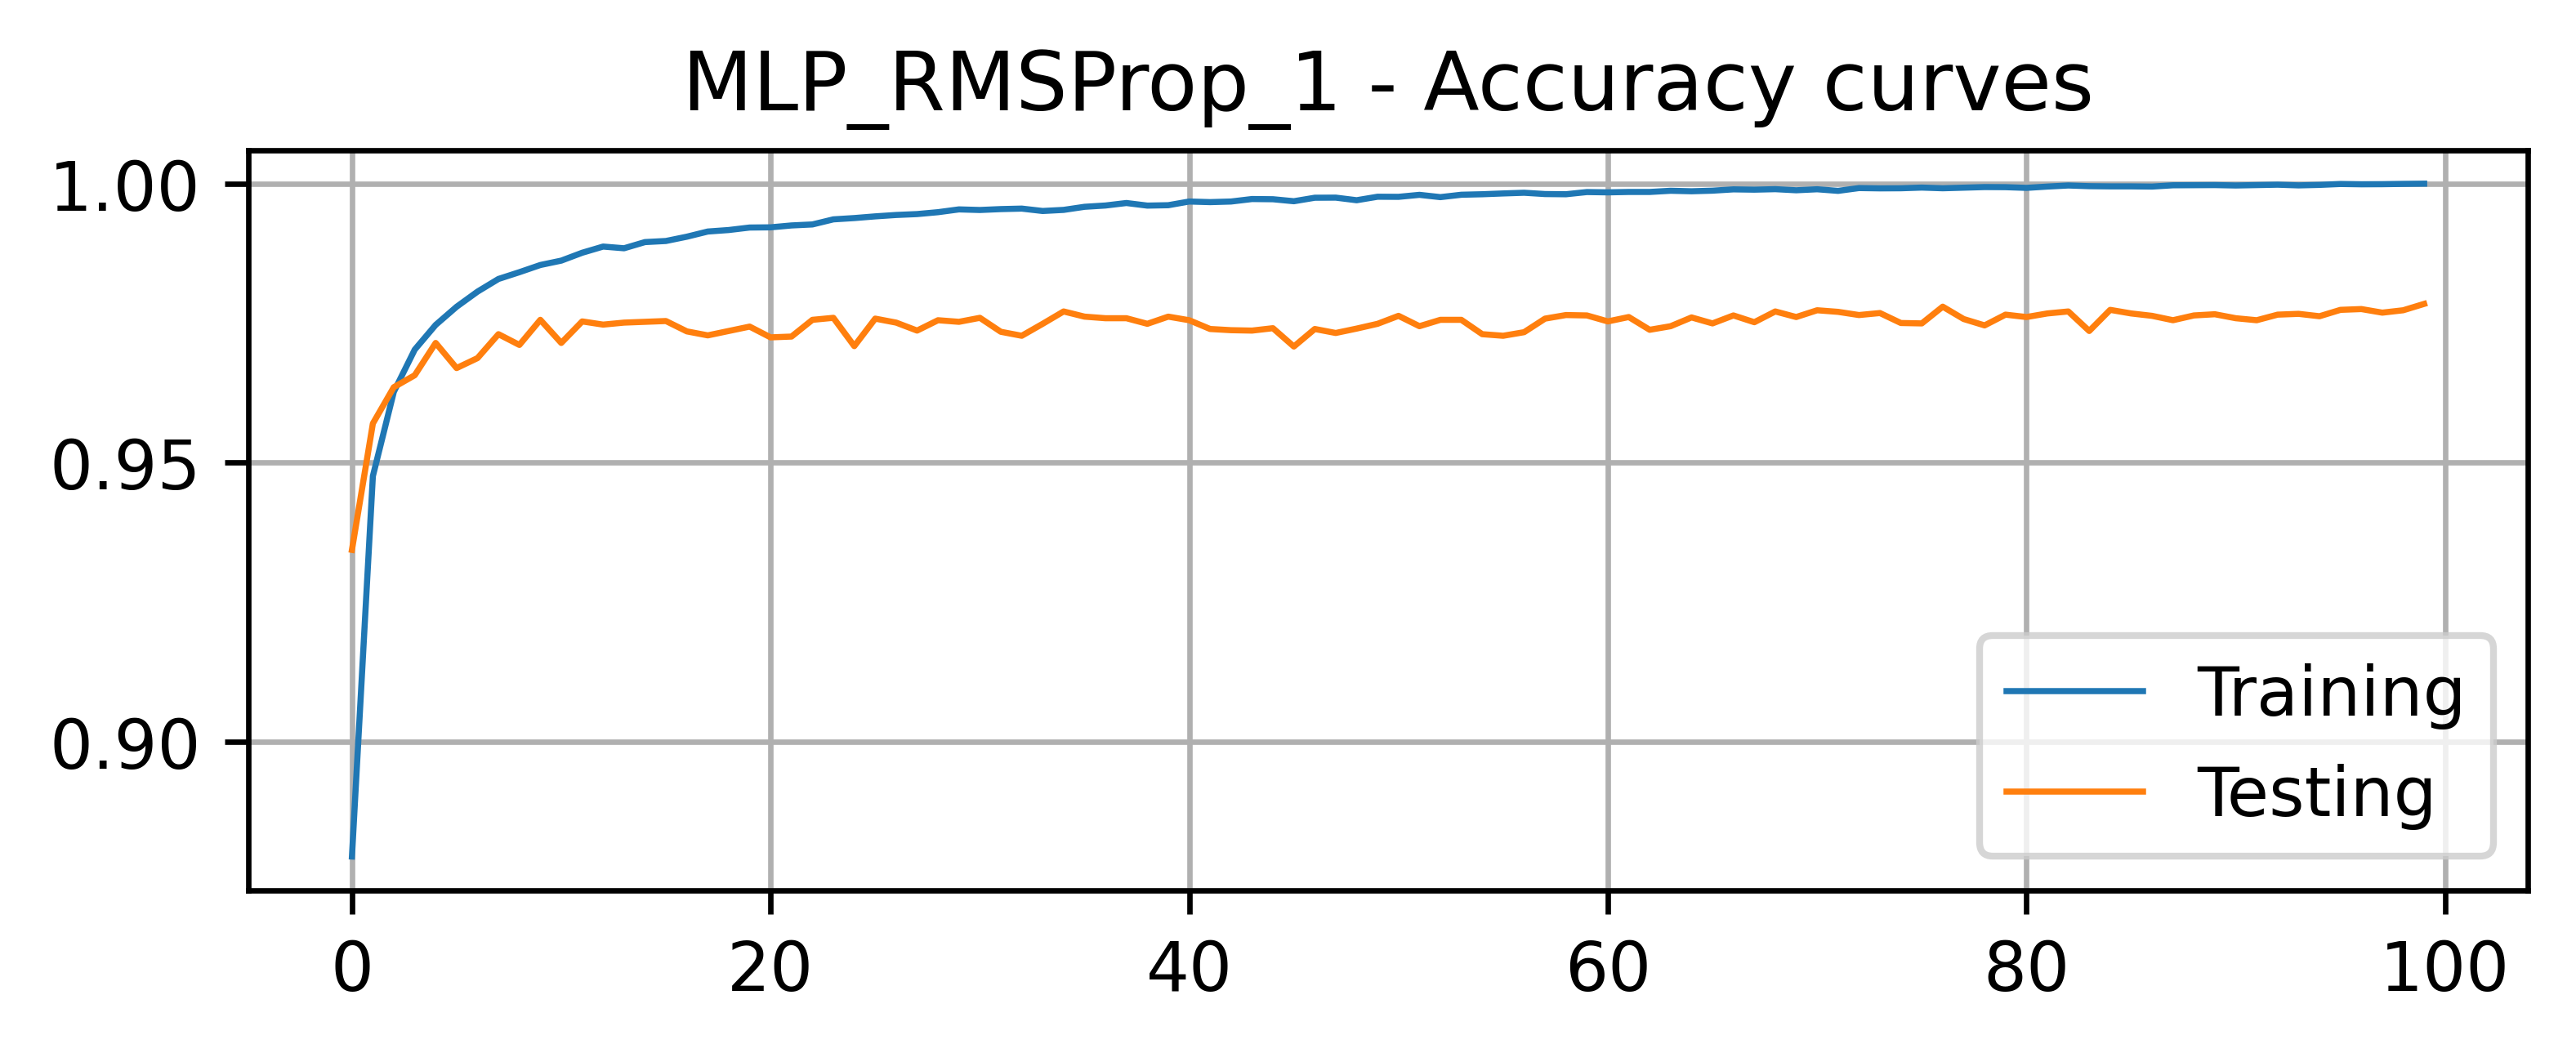

In [25]:
# display results
utils.disp_results(mlp_rmsprop_1, X_train, y_train, X_test, y_test, mlp_rmsprop_1_history)

Loss curve of testing set starts increasing after some time but the accuracy remains stable. Just like *Adam*, *RMSProp* starts overfitting very early, but it is not visible on the accuracy of the model. The performance is good and similar to *Adam's*. 

### $ii)$ $\;\rho=0.99$

In [26]:
rho = 0.99

In [27]:
# create model
mlp_rmsprop_2 = utils.create_mlp("MLP_RMSProp_2", 
                            n_hidden_1, n_hidden_2, 
                            num_features, num_classes)

In [28]:
# compile model
mlp_rmsprop_2.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=rho),
                    loss=loss, 
                    metrics=metrics)

# train model
mlp_rmsprop_2_history = mlp_rmsprop_2.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=verbose)

Evaluation on training data:
1750/1750 [==============================] - 3s 2ms/step - loss: 0.1493 - accuracy: 0.9797
Evaluation on testing data:
438/438 [==============================] - 1s 1ms/step - loss: 0.4782 - accuracy: 0.9585


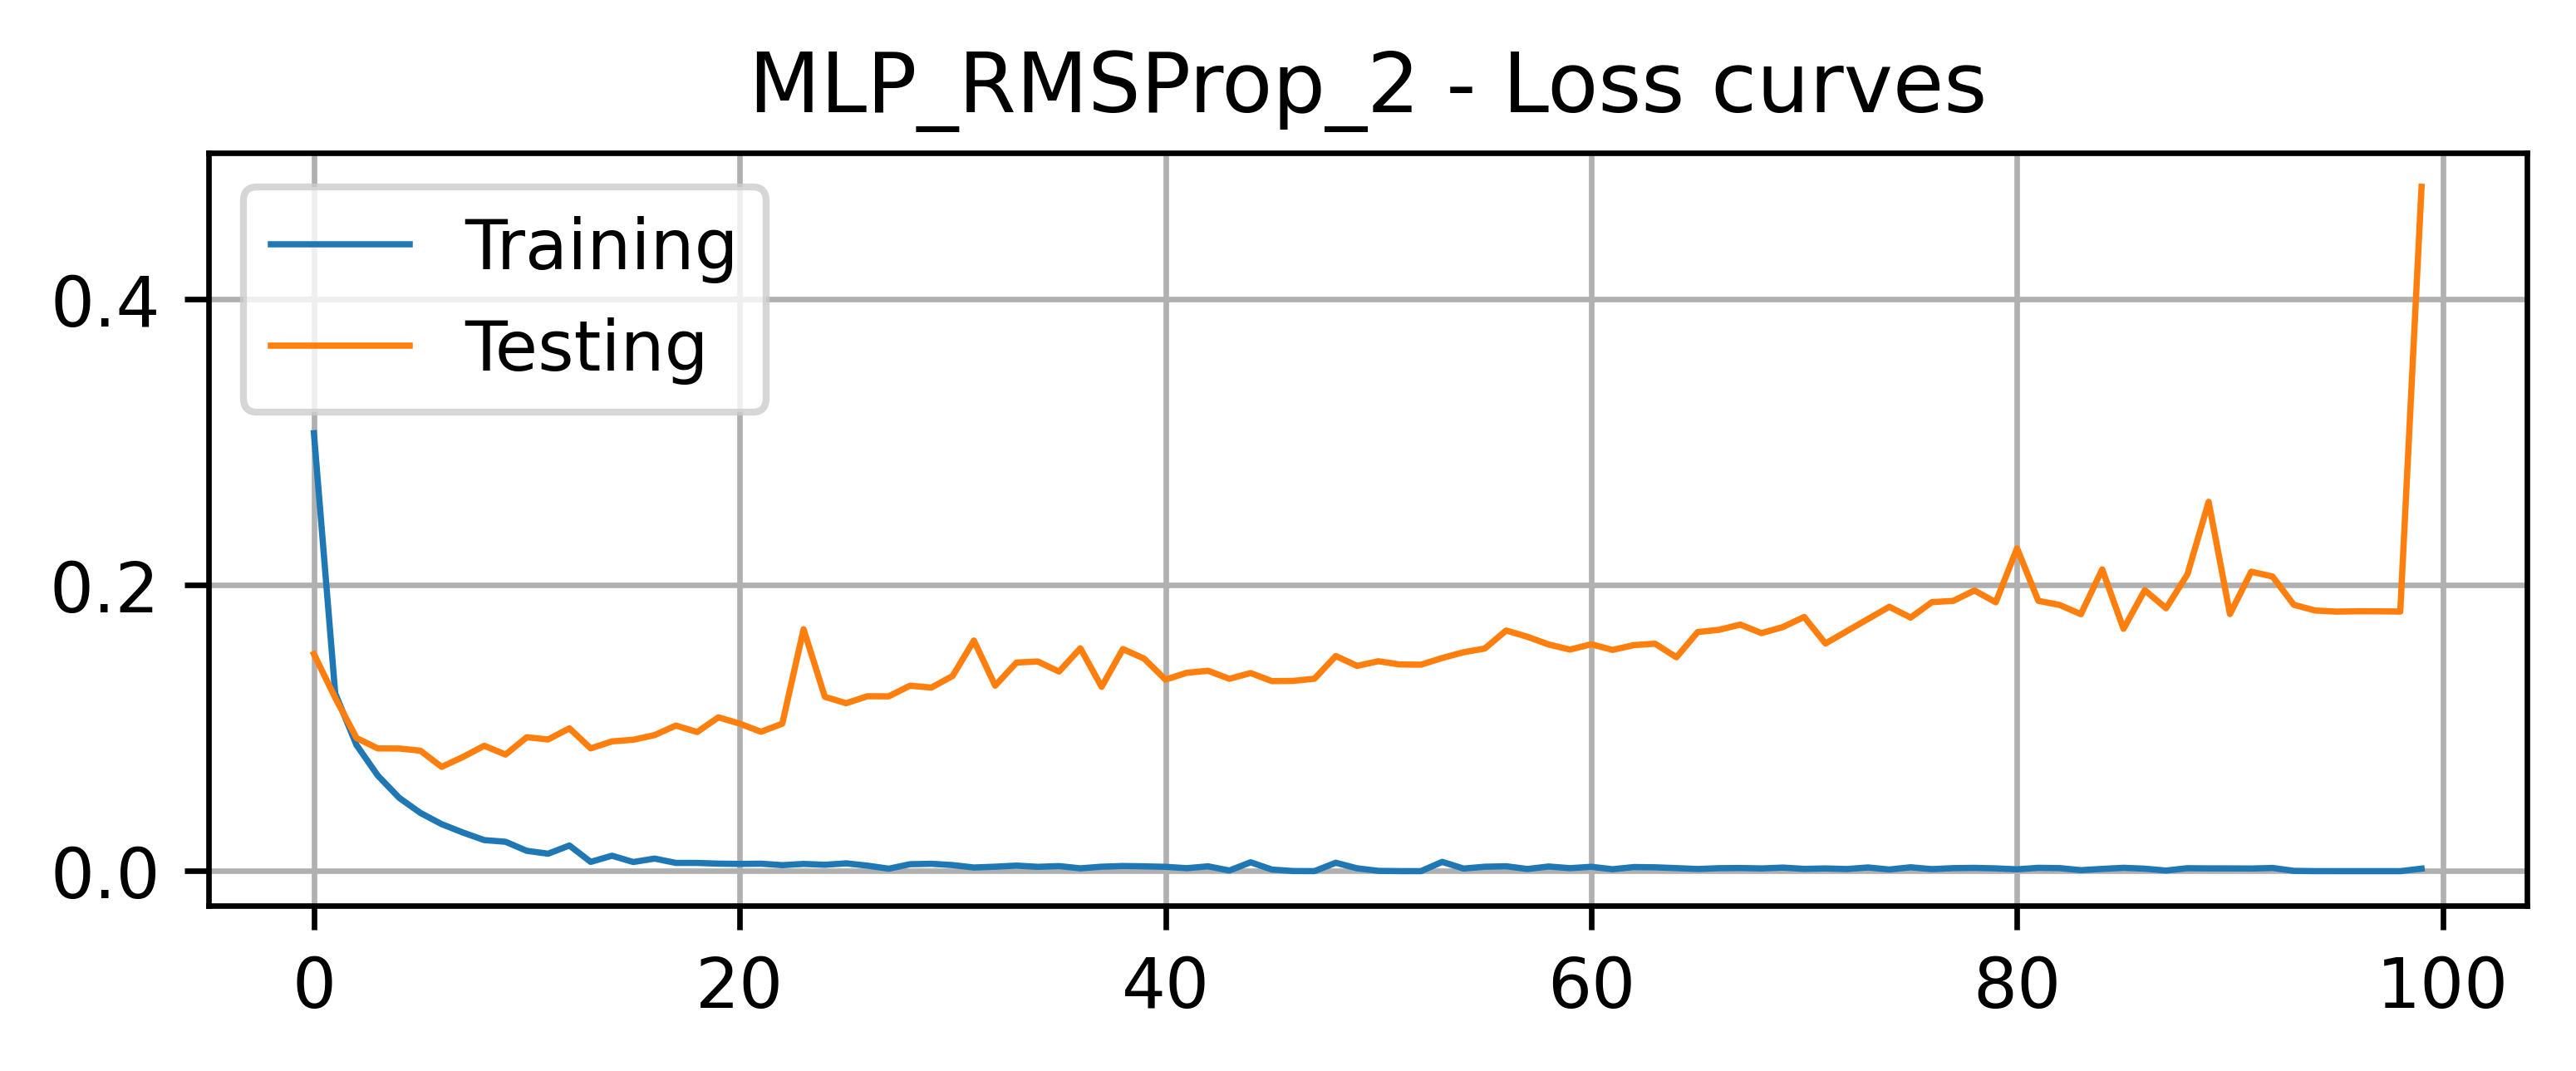

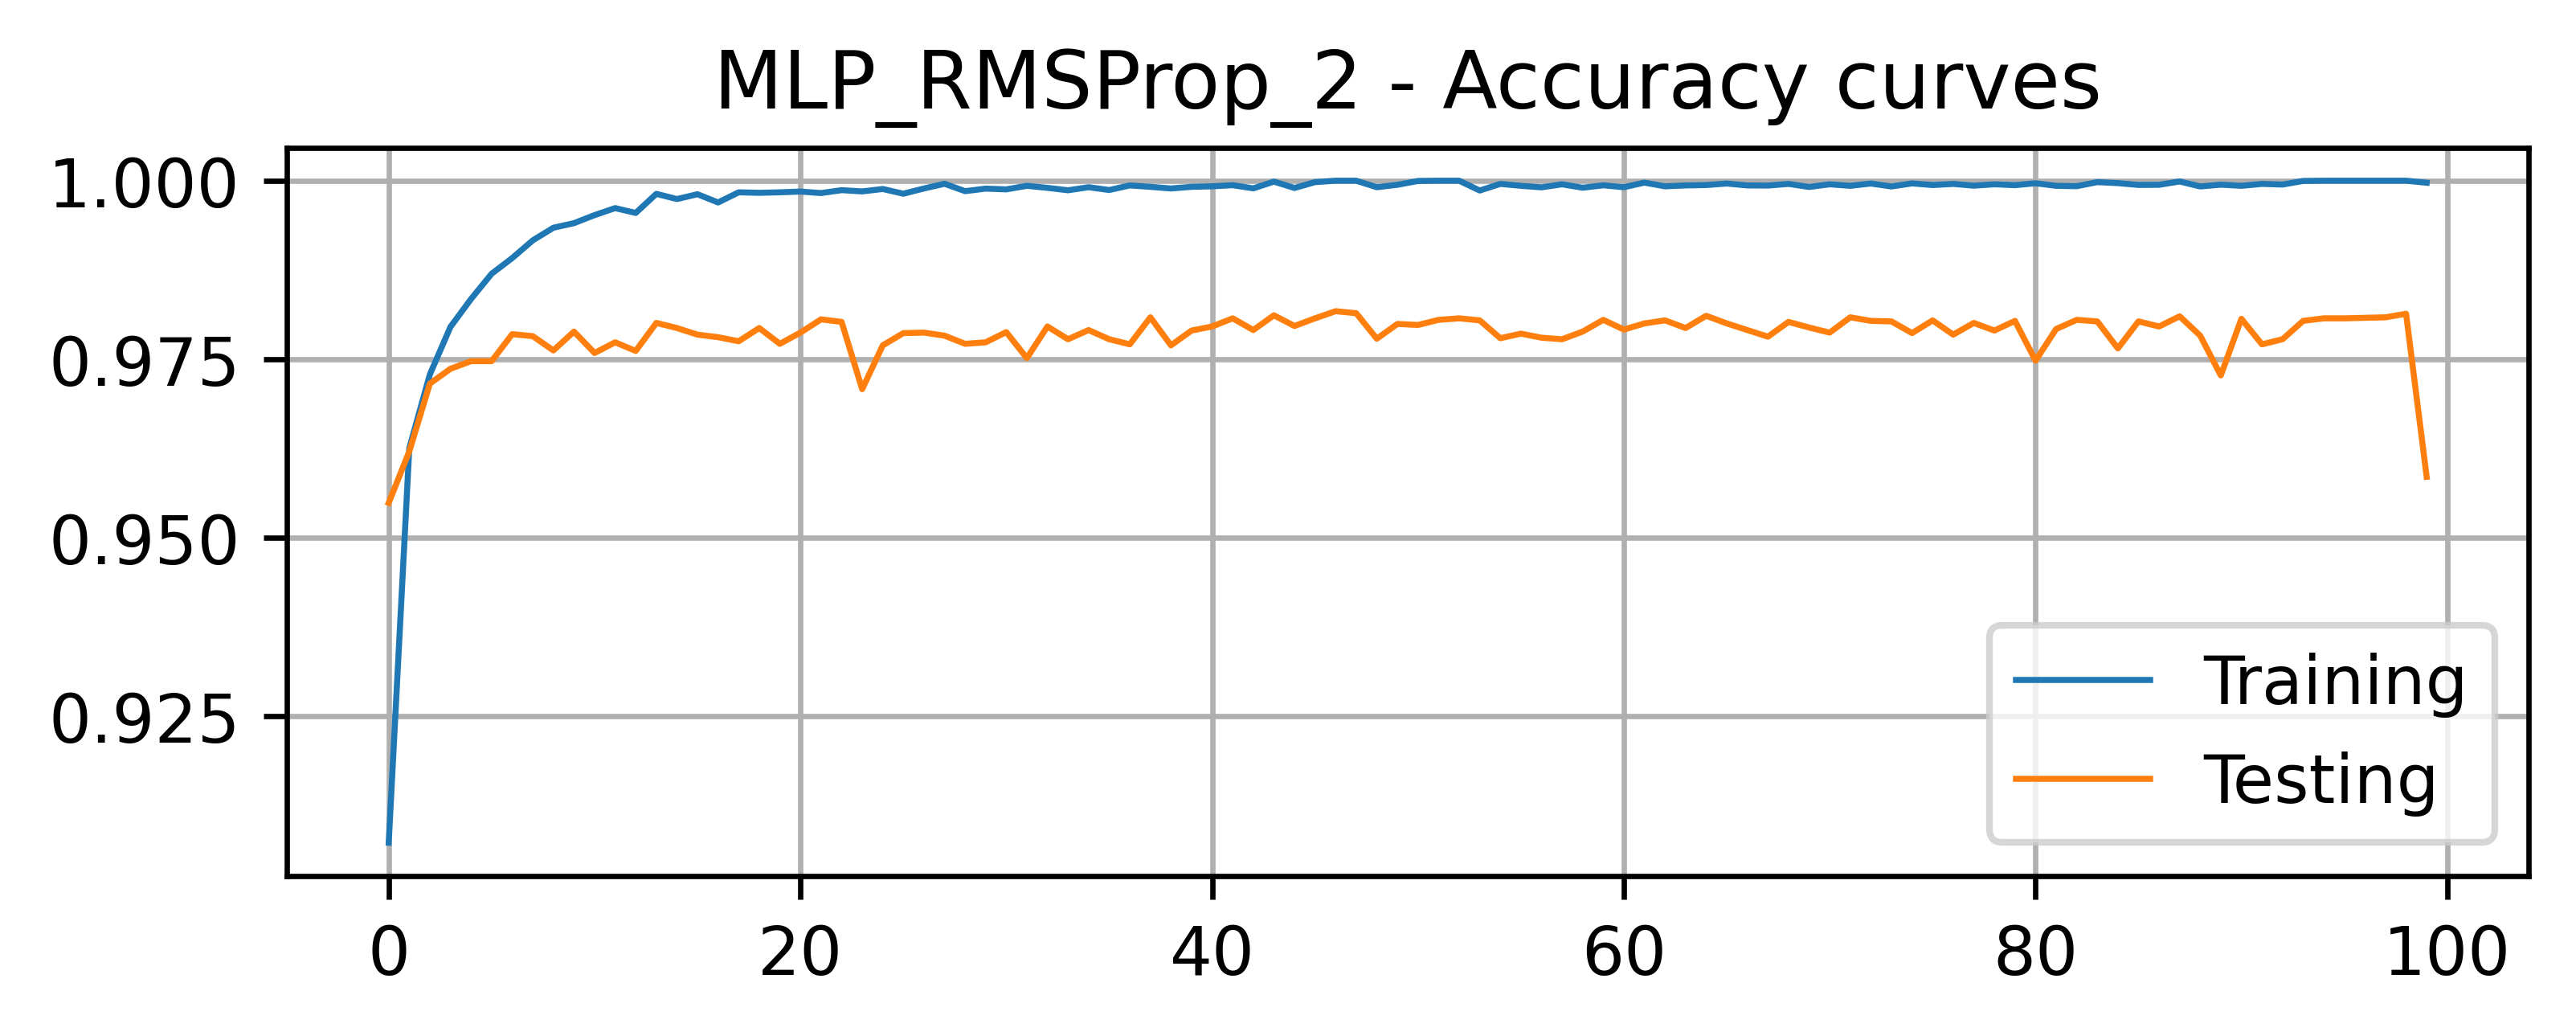

In [29]:
# display results
utils.disp_results(mlp_rmsprop_2, X_train, y_train, X_test, y_test, mlp_rmsprop_2_history)

For a high value of $\rho$, we can notice that in the last epochs the loss curve of the testing set increases while the accuracy decreases rapidly. Probably overfitting begins to take place after the threshold of 100 epochs. Overfitting starts much later and is more rapid than the default case.

## $b$. $L2$ regularization ($\alpha=0.01$)

In [30]:
a_reg = 0.01

### $i)$ $\;\rho=0.01$

In [31]:
rho = 0.01

In [32]:
# create model
mlp_rmsprop_3 = utils.create_mlp("MLP_RMSProp_3", 
                            n_hidden_1, n_hidden_2, 
                            num_features, num_classes,
                            kernel_reg="l2", a_reg=a_reg)

In [33]:
# compile model
mlp_rmsprop_3.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=rho),
                    loss=loss, 
                    metrics=metrics)

# train model
mlp_rmsprop_3_history = mlp_rmsprop_3.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=verbose)

Evaluation on training data:
1750/1750 [==============================] - 3s 2ms/step - loss: 0.7488 - accuracy: 0.9135
Evaluation on testing data:
438/438 [==============================] - 1s 1ms/step - loss: 0.7474 - accuracy: 0.9136


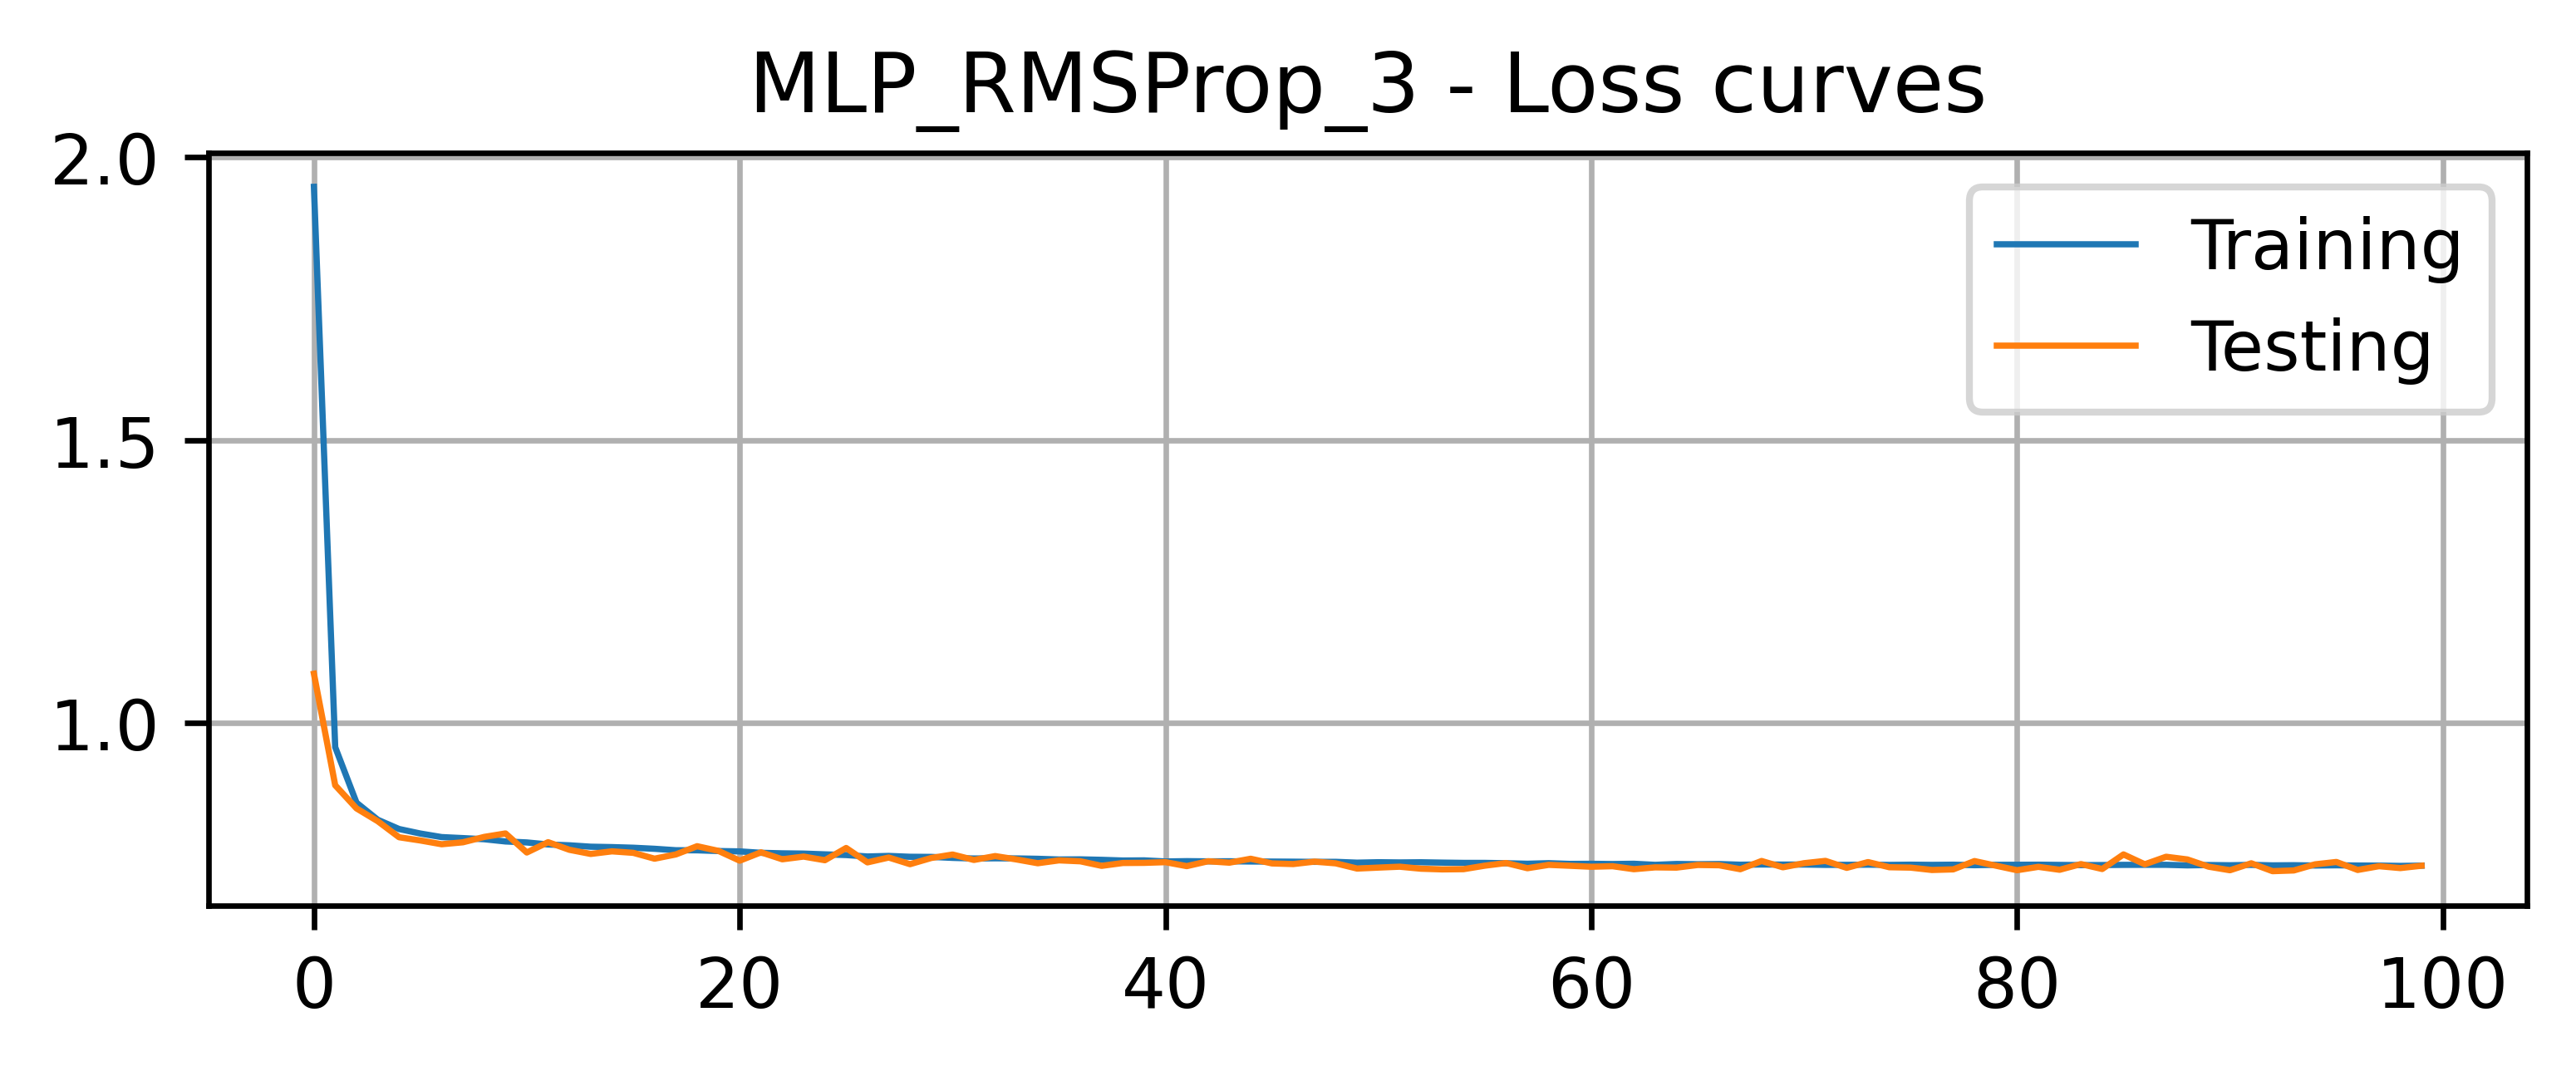

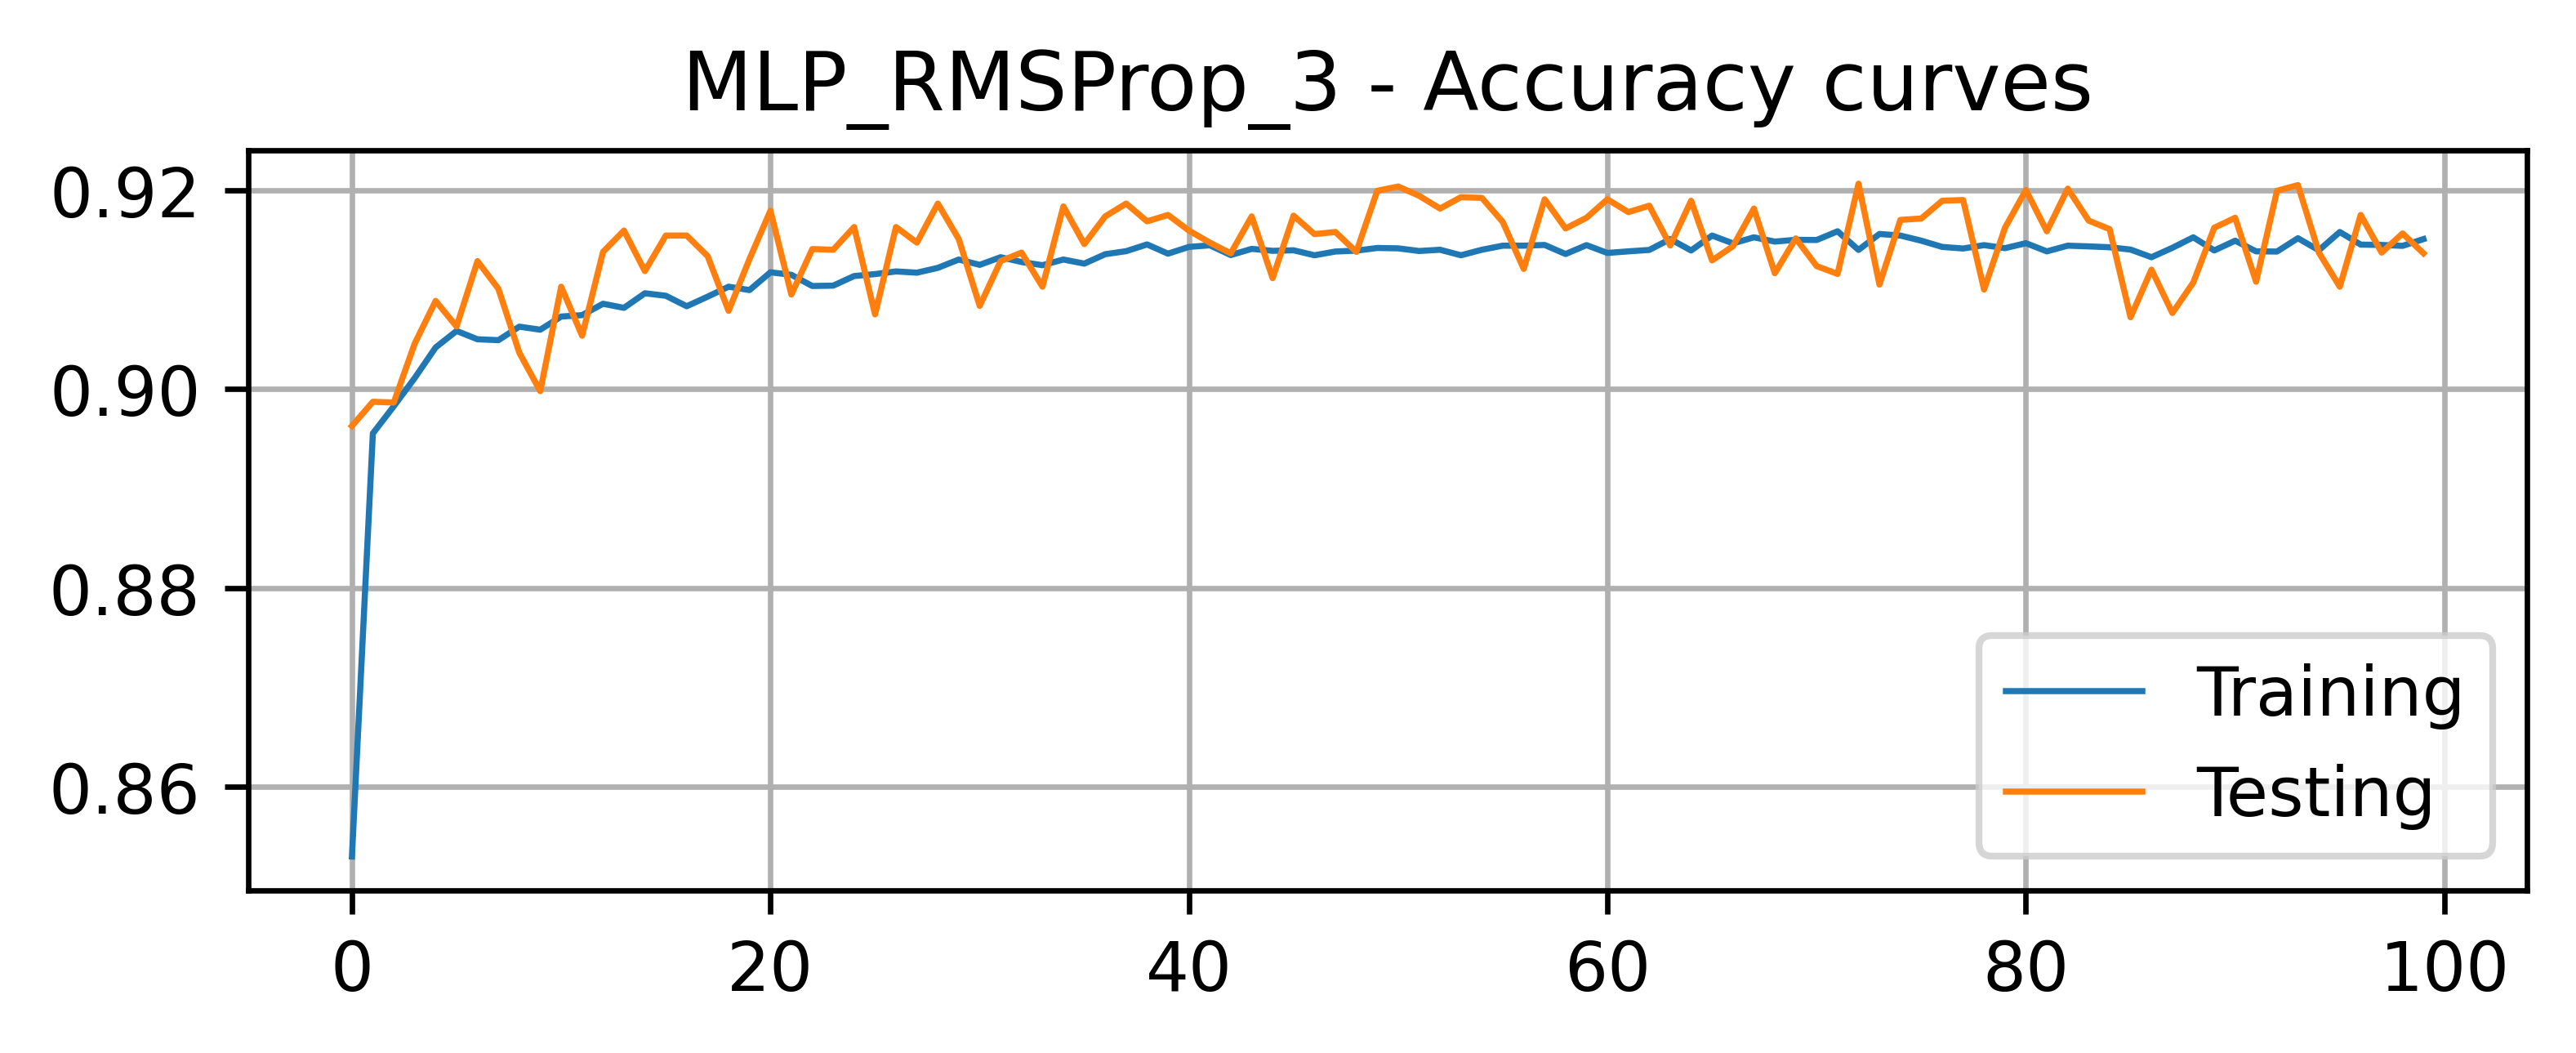

In [34]:
# display results
utils.disp_results(mlp_rmsprop_3, X_train, y_train, X_test, y_test, mlp_rmsprop_3_history)

### $ii)$ $\;\rho=0.99$

In [35]:
rho = 0.99

In [36]:
# create model
mlp_rmsprop_4 = utils.create_mlp("MLP_RMSProp_4", 
                            n_hidden_1, n_hidden_2, 
                            num_features, num_classes,
                            kernel_reg="l2", a_reg=a_reg)

In [37]:
# compile model
mlp_rmsprop_4.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=rho),
                    loss=loss, 
                    metrics=metrics)

# train model
mlp_rmsprop_4_history = mlp_rmsprop_4.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=verbose)

Evaluation on training data:
1750/1750 [==============================] - 3s 2ms/step - loss: 0.7469 - accuracy: 0.9147
Evaluation on testing data:
438/438 [==============================] - 1s 2ms/step - loss: 0.7457 - accuracy: 0.9149


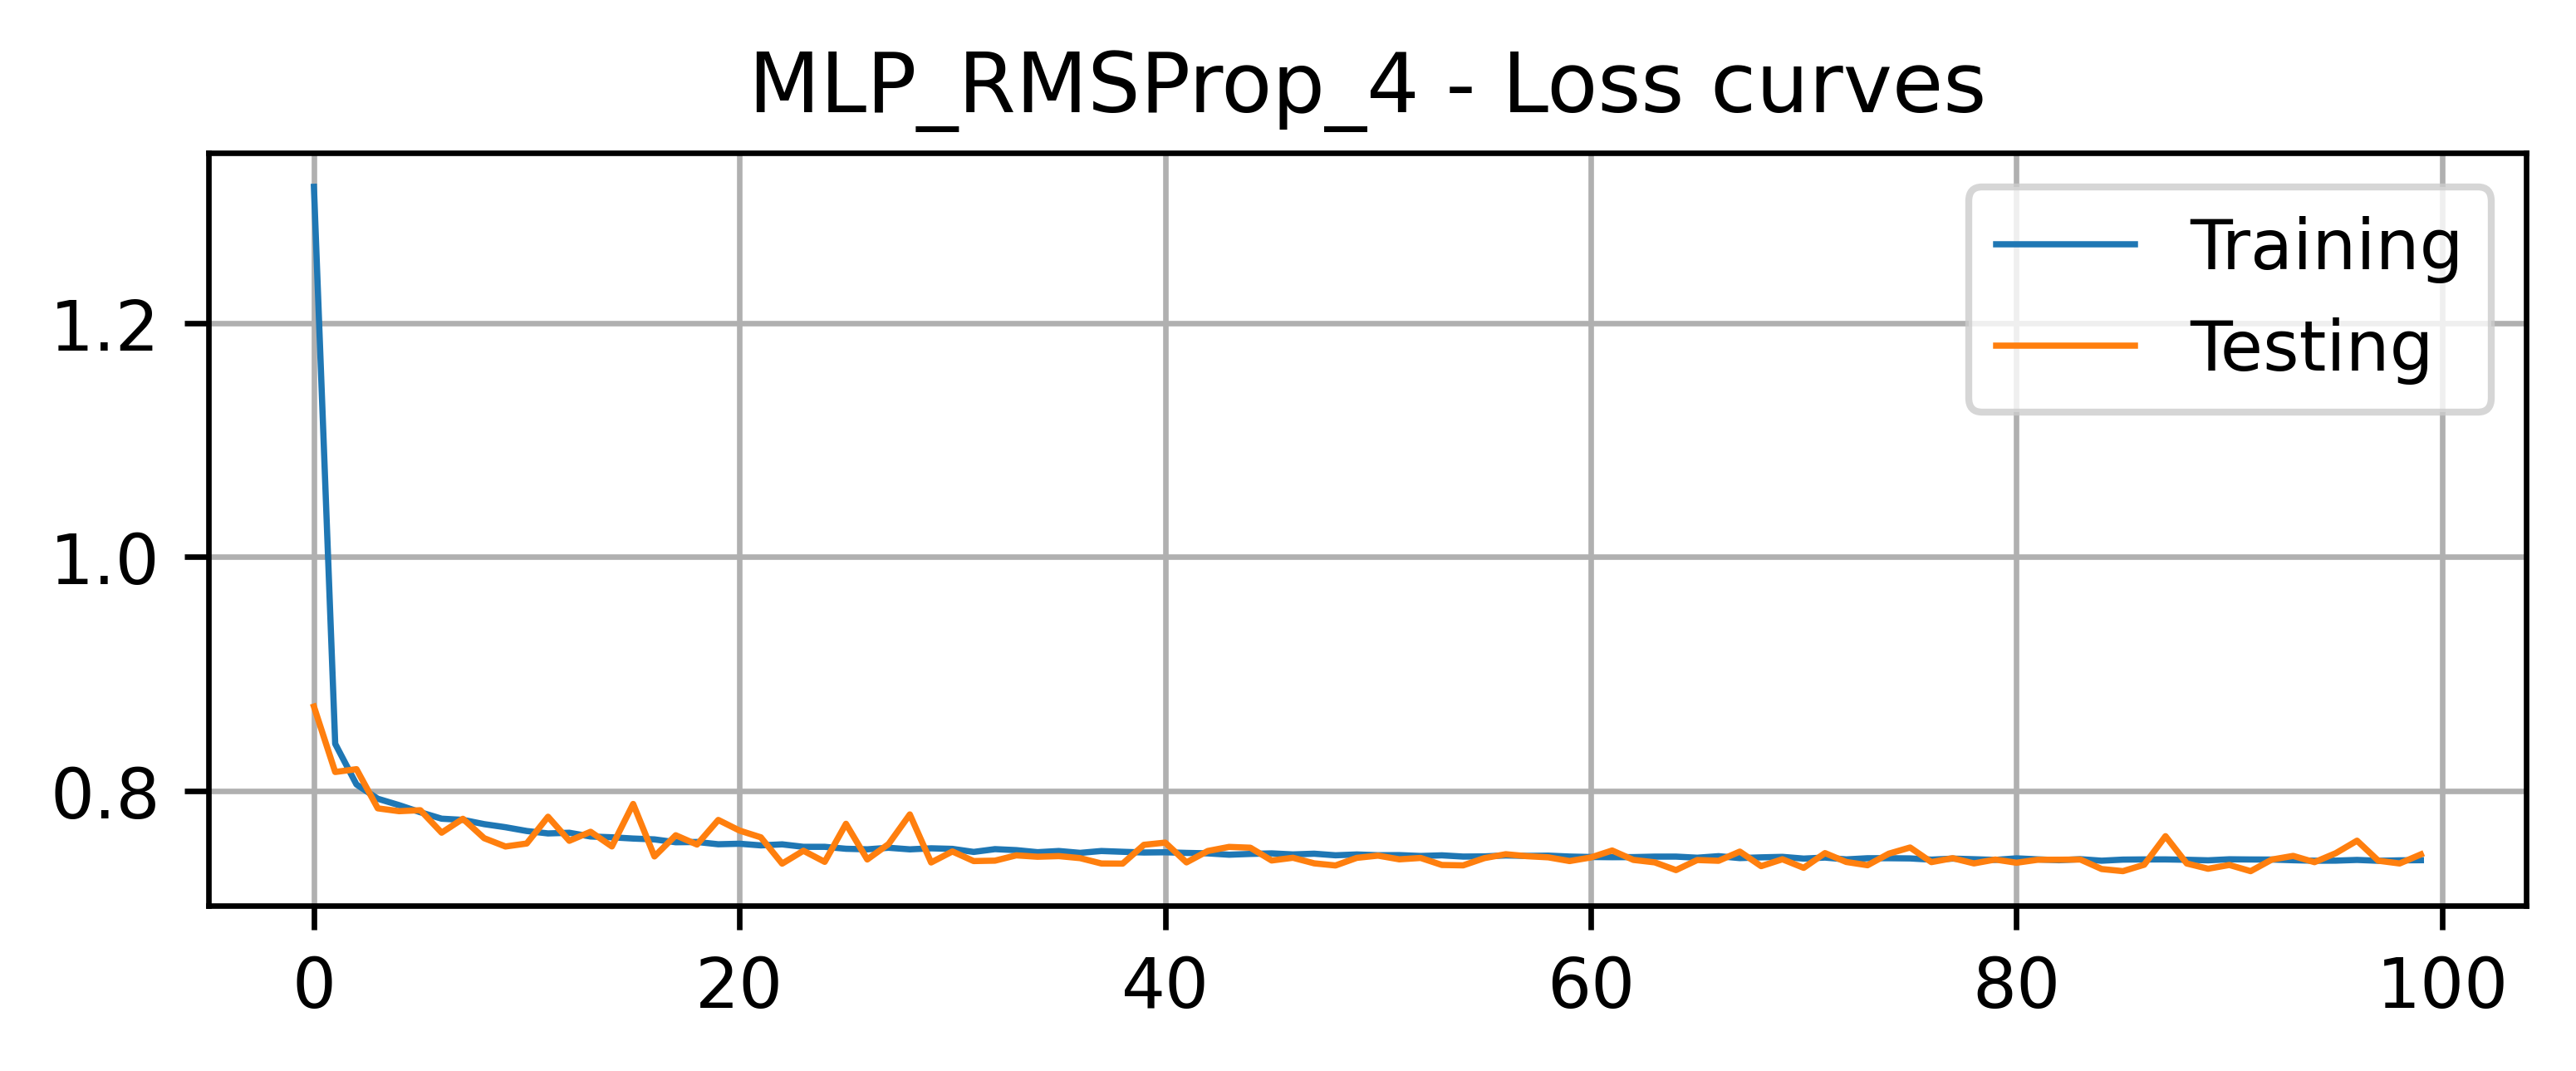

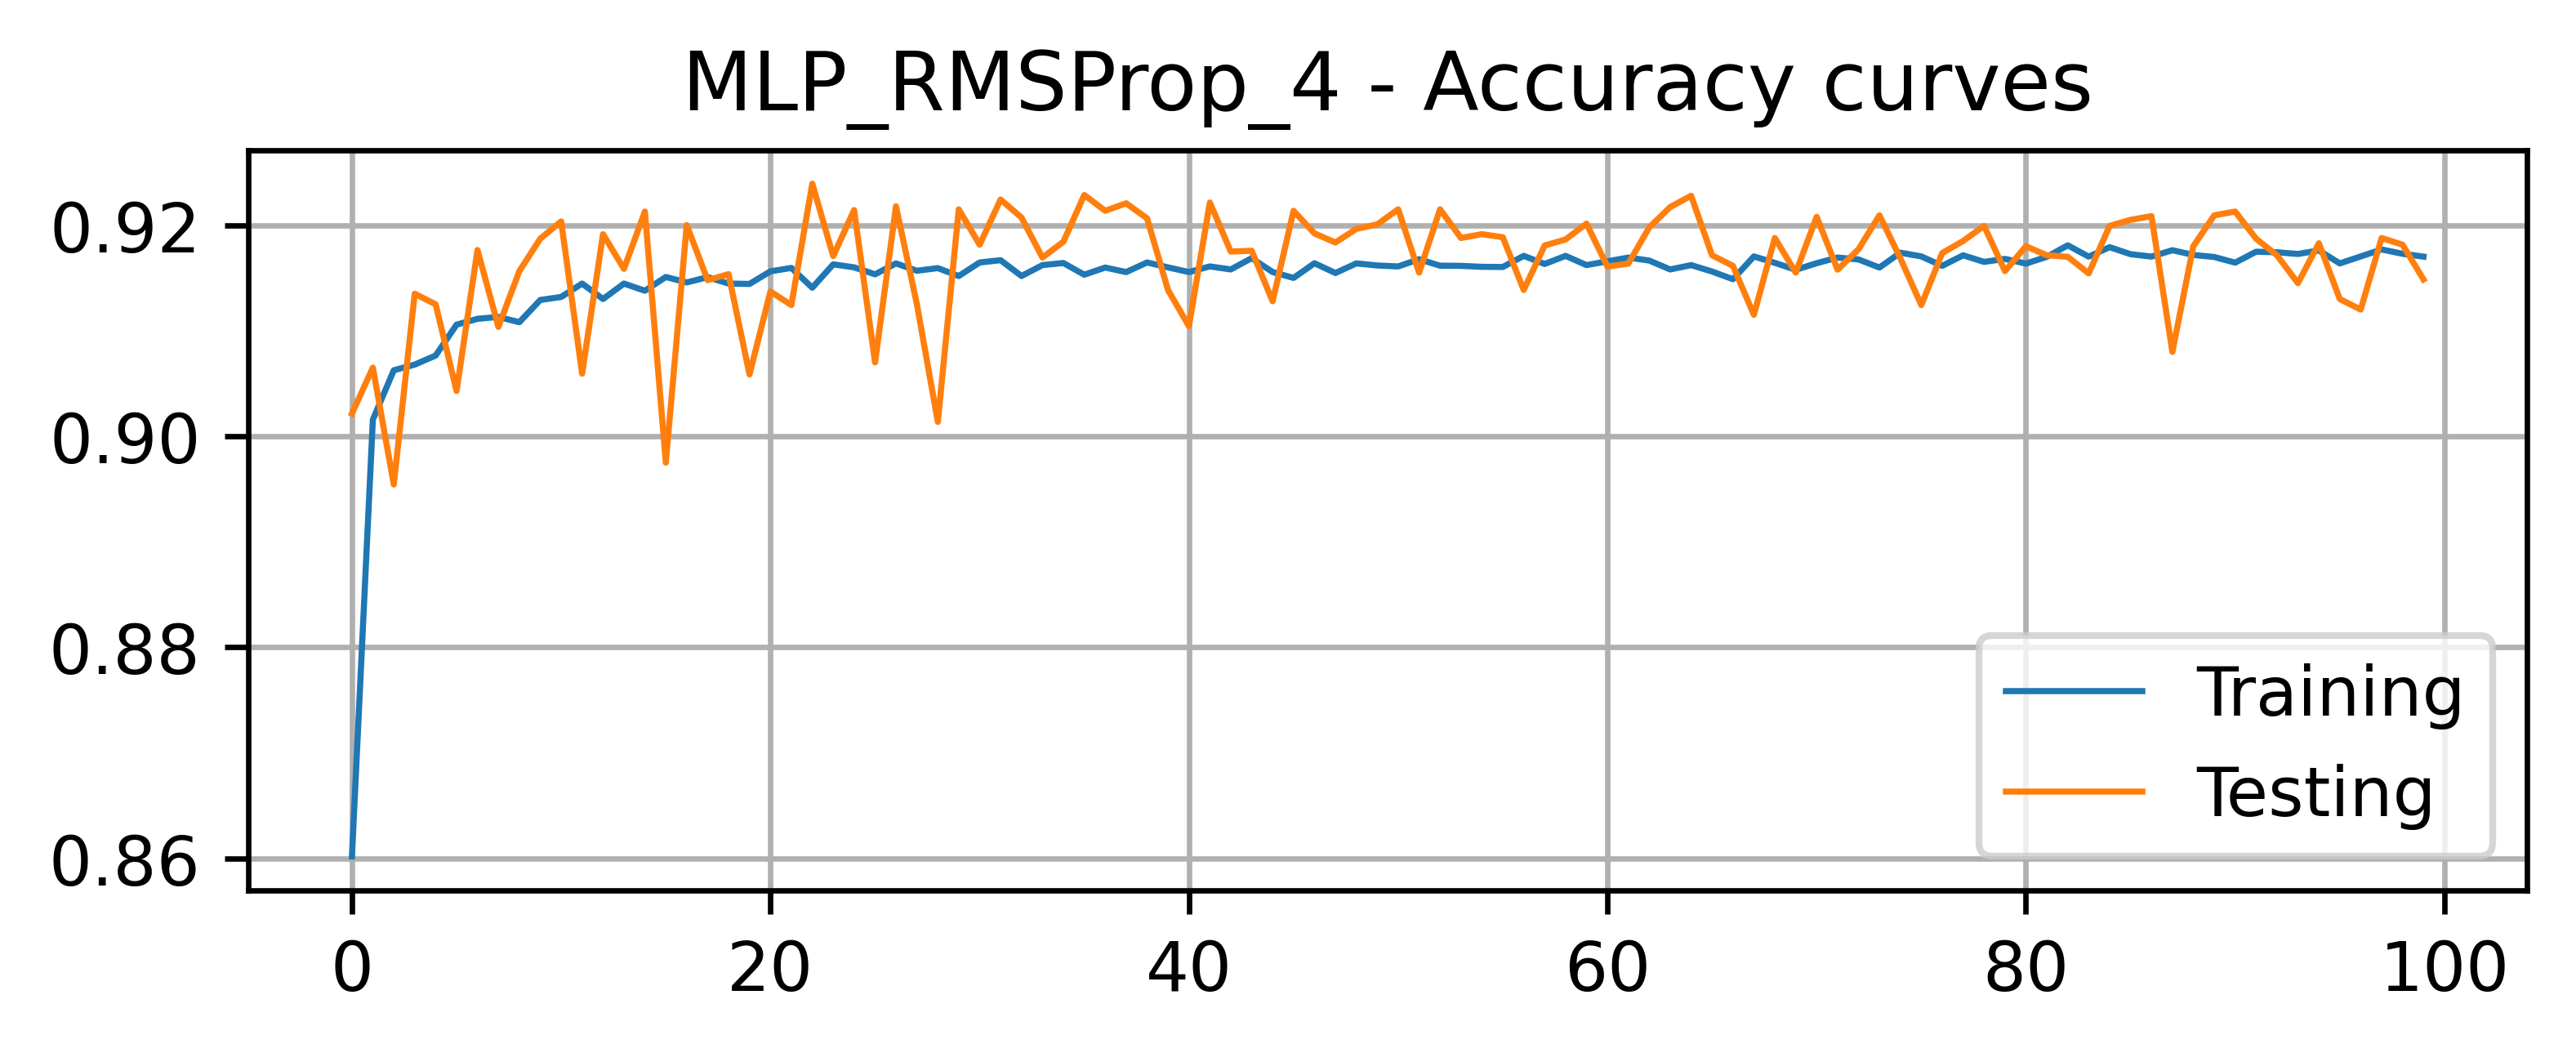

In [38]:
# display results
utils.disp_results(mlp_rmsprop_4, X_train, y_train, X_test, y_test, mlp_rmsprop_4_history)

$L2$ regulatization makes the performance worse but prevents overfitting. The model has the same performance in both training and testing datasets.

## $c$. $L1$ regularization ($\alpha=0.01$) & Dropout ($probability=0.3$)

In [39]:
a_reg = 0.01
dropout_prob = 0.3

### $i)$ $\;\rho=0.01$

In [40]:
rho = 0.01

In [41]:
# create model
mlp_rmsprop_5 = utils.create_mlp("MLP_RMSProp_5", 
                            n_hidden_1, n_hidden_2, 
                            num_features, num_classes, kernel_reg="l1", a_reg=a_reg,
                            dropout_layers=True, dropout_prob=dropout_prob)

In [42]:
# compile model
mlp_rmsprop_5.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=rho),
                    loss=loss, 
                    metrics=metrics)

# train model
mlp_rmsprop_5_history = mlp_rmsprop_5.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=verbose)

Evaluation on training data:
1750/1750 [==============================] - 4s 2ms/step - loss: 2.9780 - accuracy: 0.1134
Evaluation on testing data:
438/438 [==============================] - 1s 2ms/step - loss: 2.9793 - accuracy: 0.1089


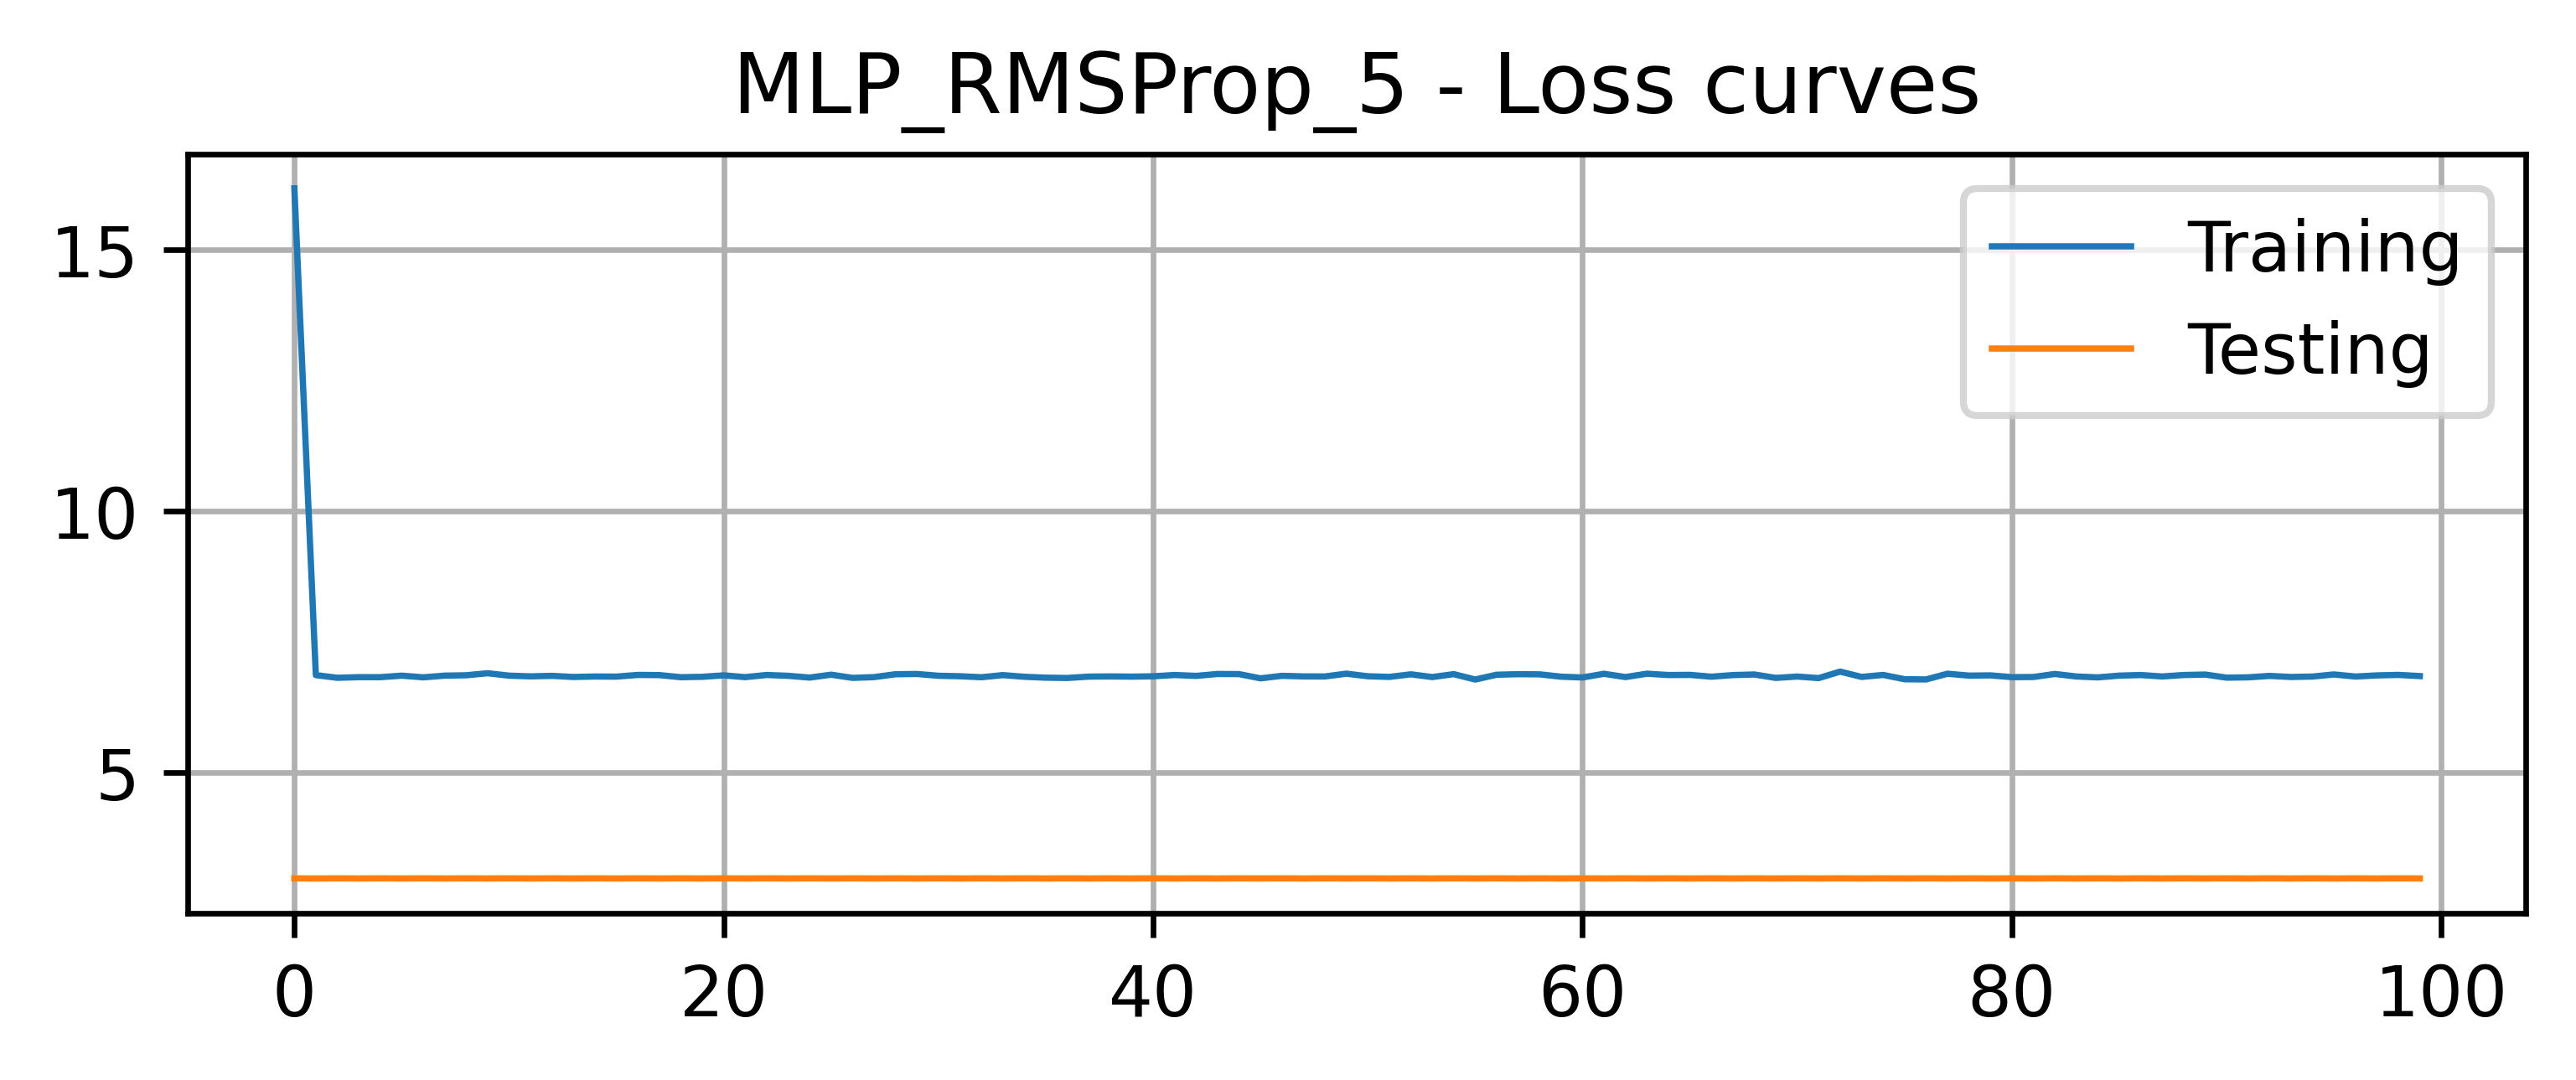

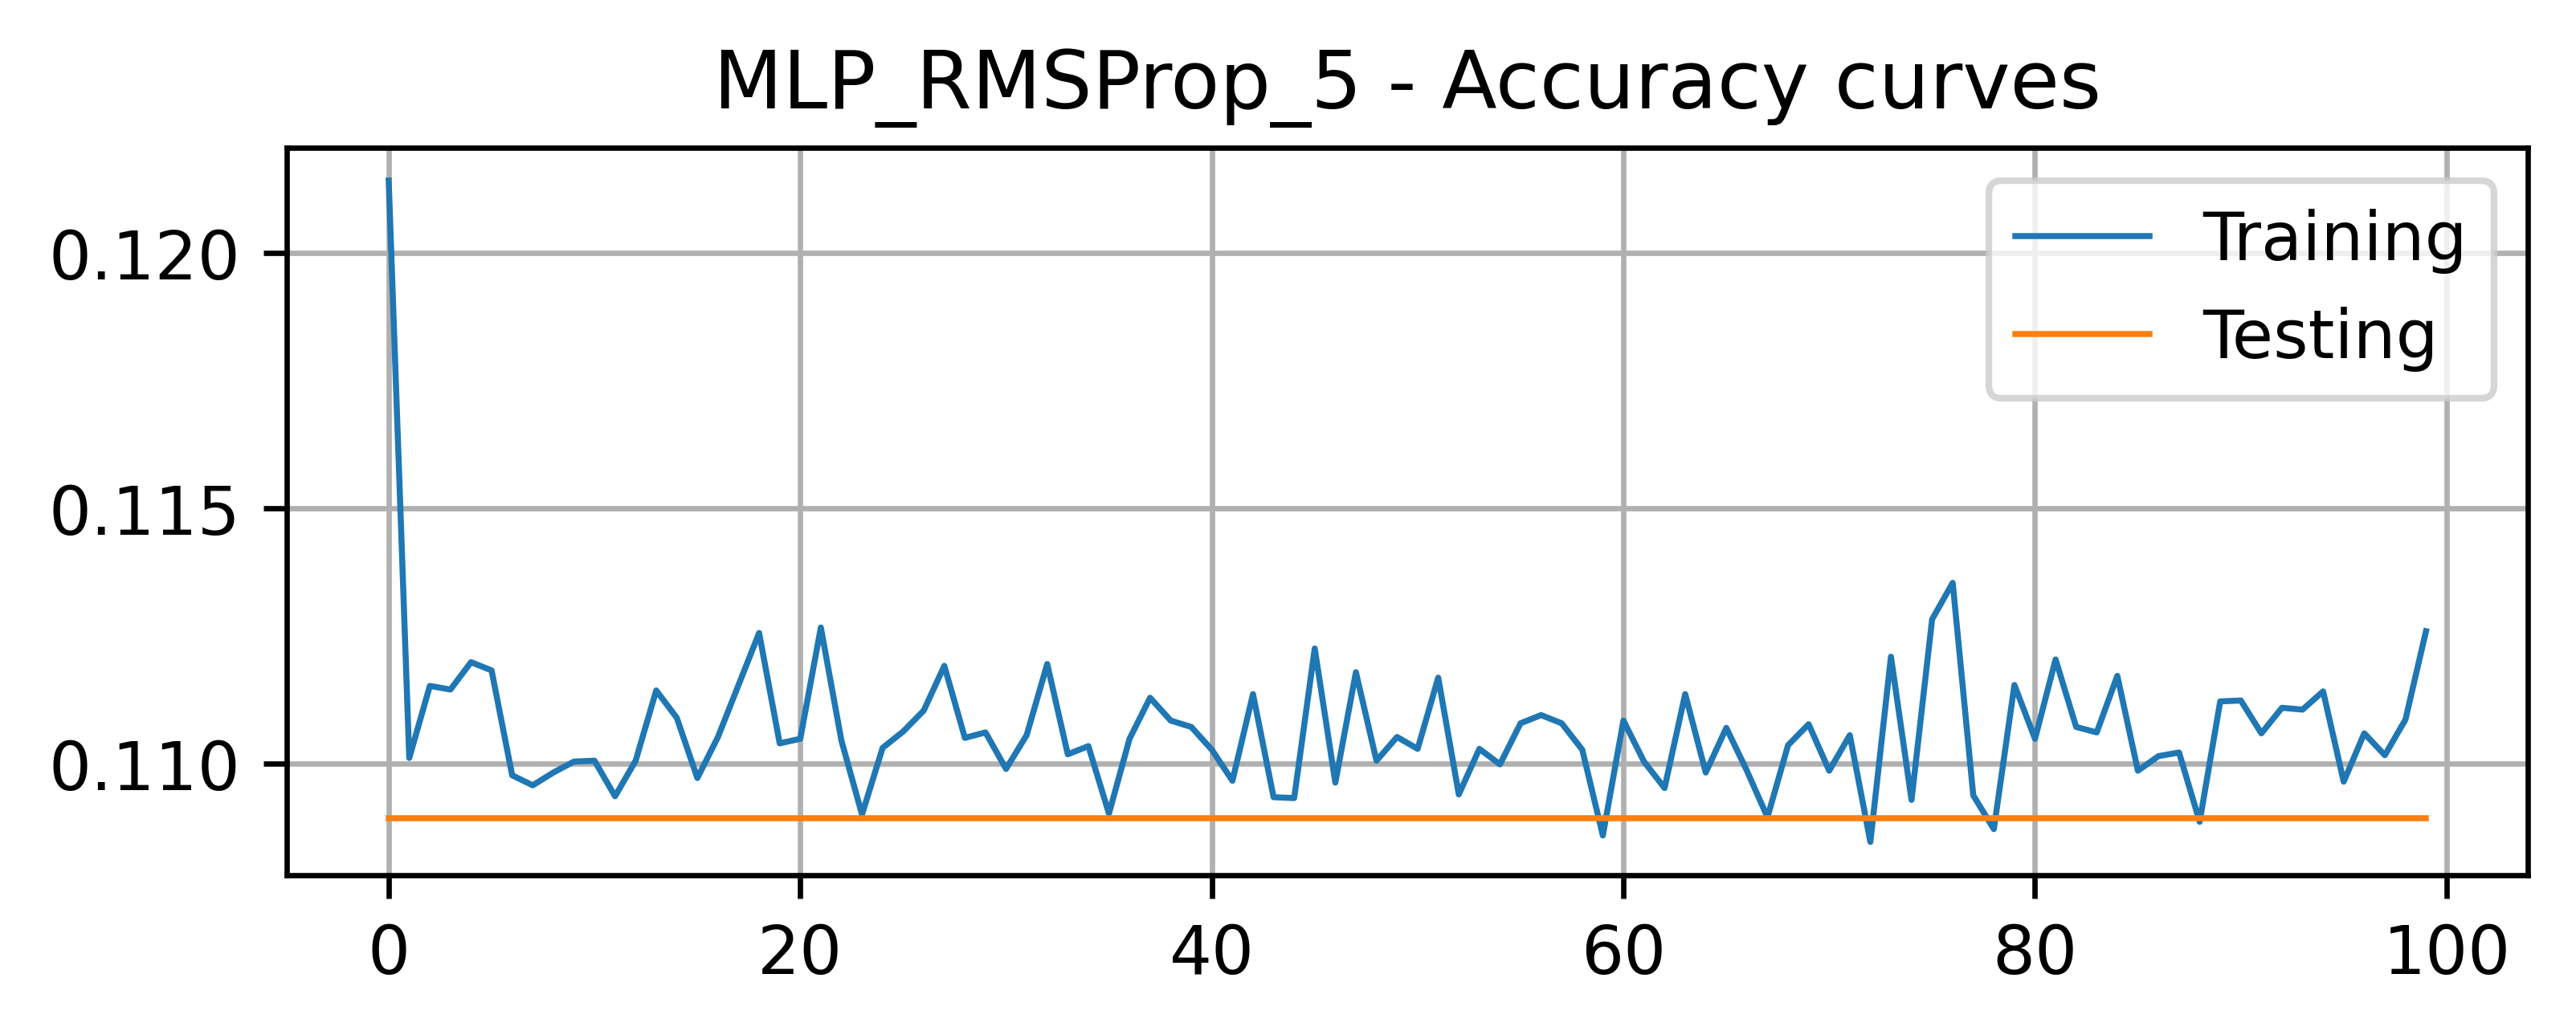

In [43]:
# display results
utils.disp_results(mlp_rmsprop_5, X_train, y_train, X_test, y_test, mlp_rmsprop_5_history)

### $ii)$ $\;\rho=0.99$

In [44]:
rho = 0.99

In [45]:
# create model
mlp_rmsprop_6 = utils.create_mlp("MLP_RMSProp_6", 
                            n_hidden_1, n_hidden_2, 
                            num_features, num_classes, kernel_reg="l1", a_reg=a_reg,
                            dropout_layers=True, dropout_prob=dropout_prob)

In [46]:
# compile model
mlp_rmsprop_6.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=rho),
                    loss=loss, 
                    metrics=metrics)

# train model
mlp_rmsprop_6_history = mlp_rmsprop_6.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=verbose)

Evaluation on training data:
1750/1750 [==============================] - 3s 2ms/step - loss: 2.7521 - accuracy: 0.1134
Evaluation on testing data:
438/438 [==============================] - 1s 2ms/step - loss: 2.7533 - accuracy: 0.1089


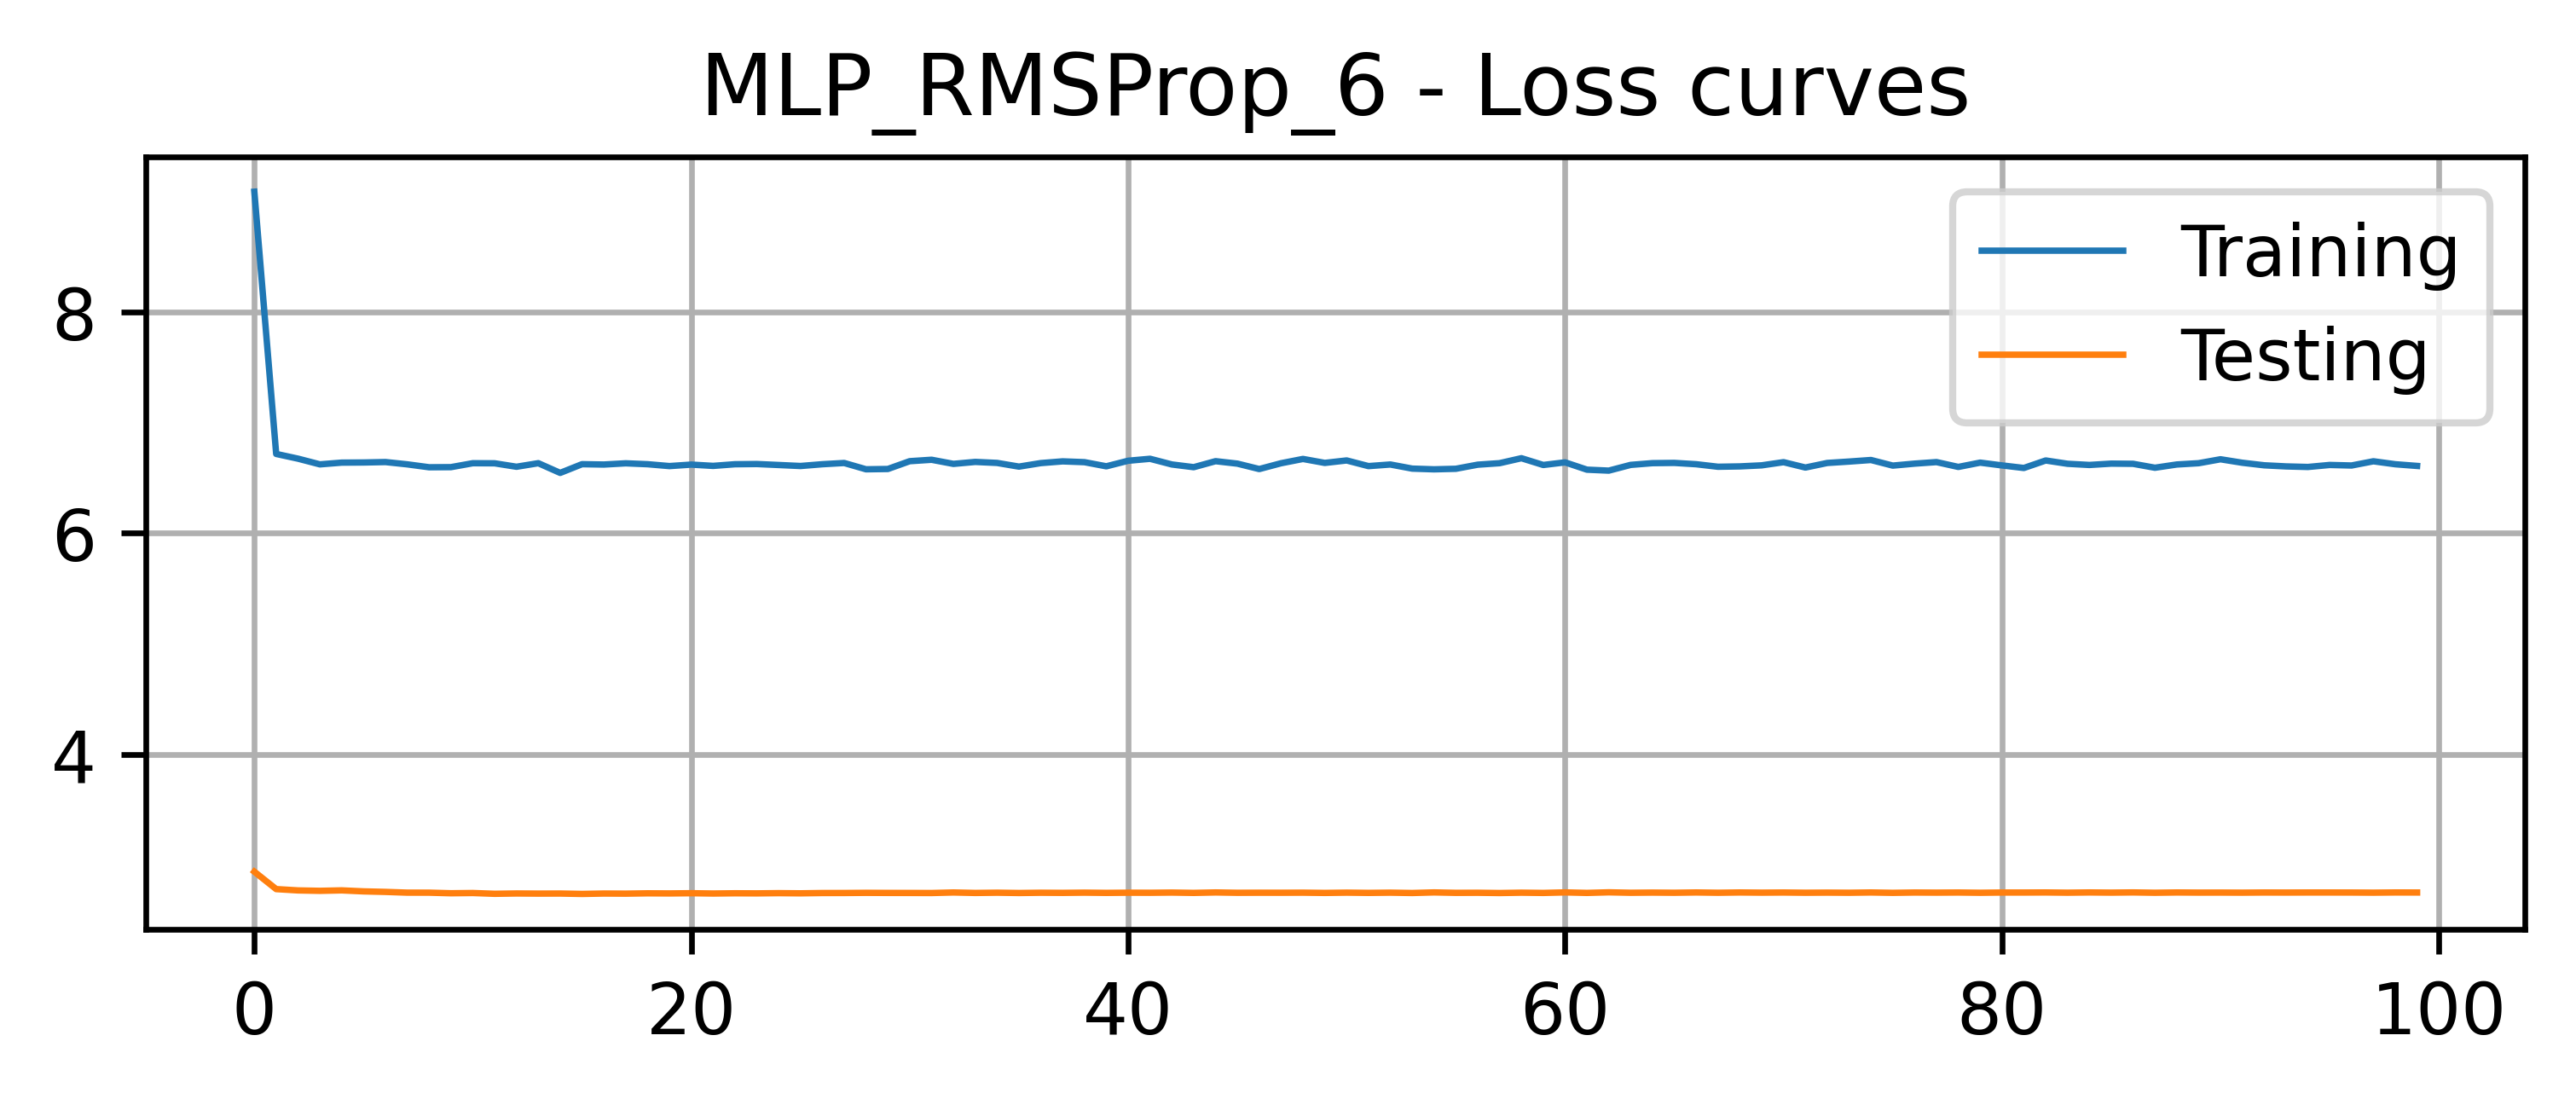

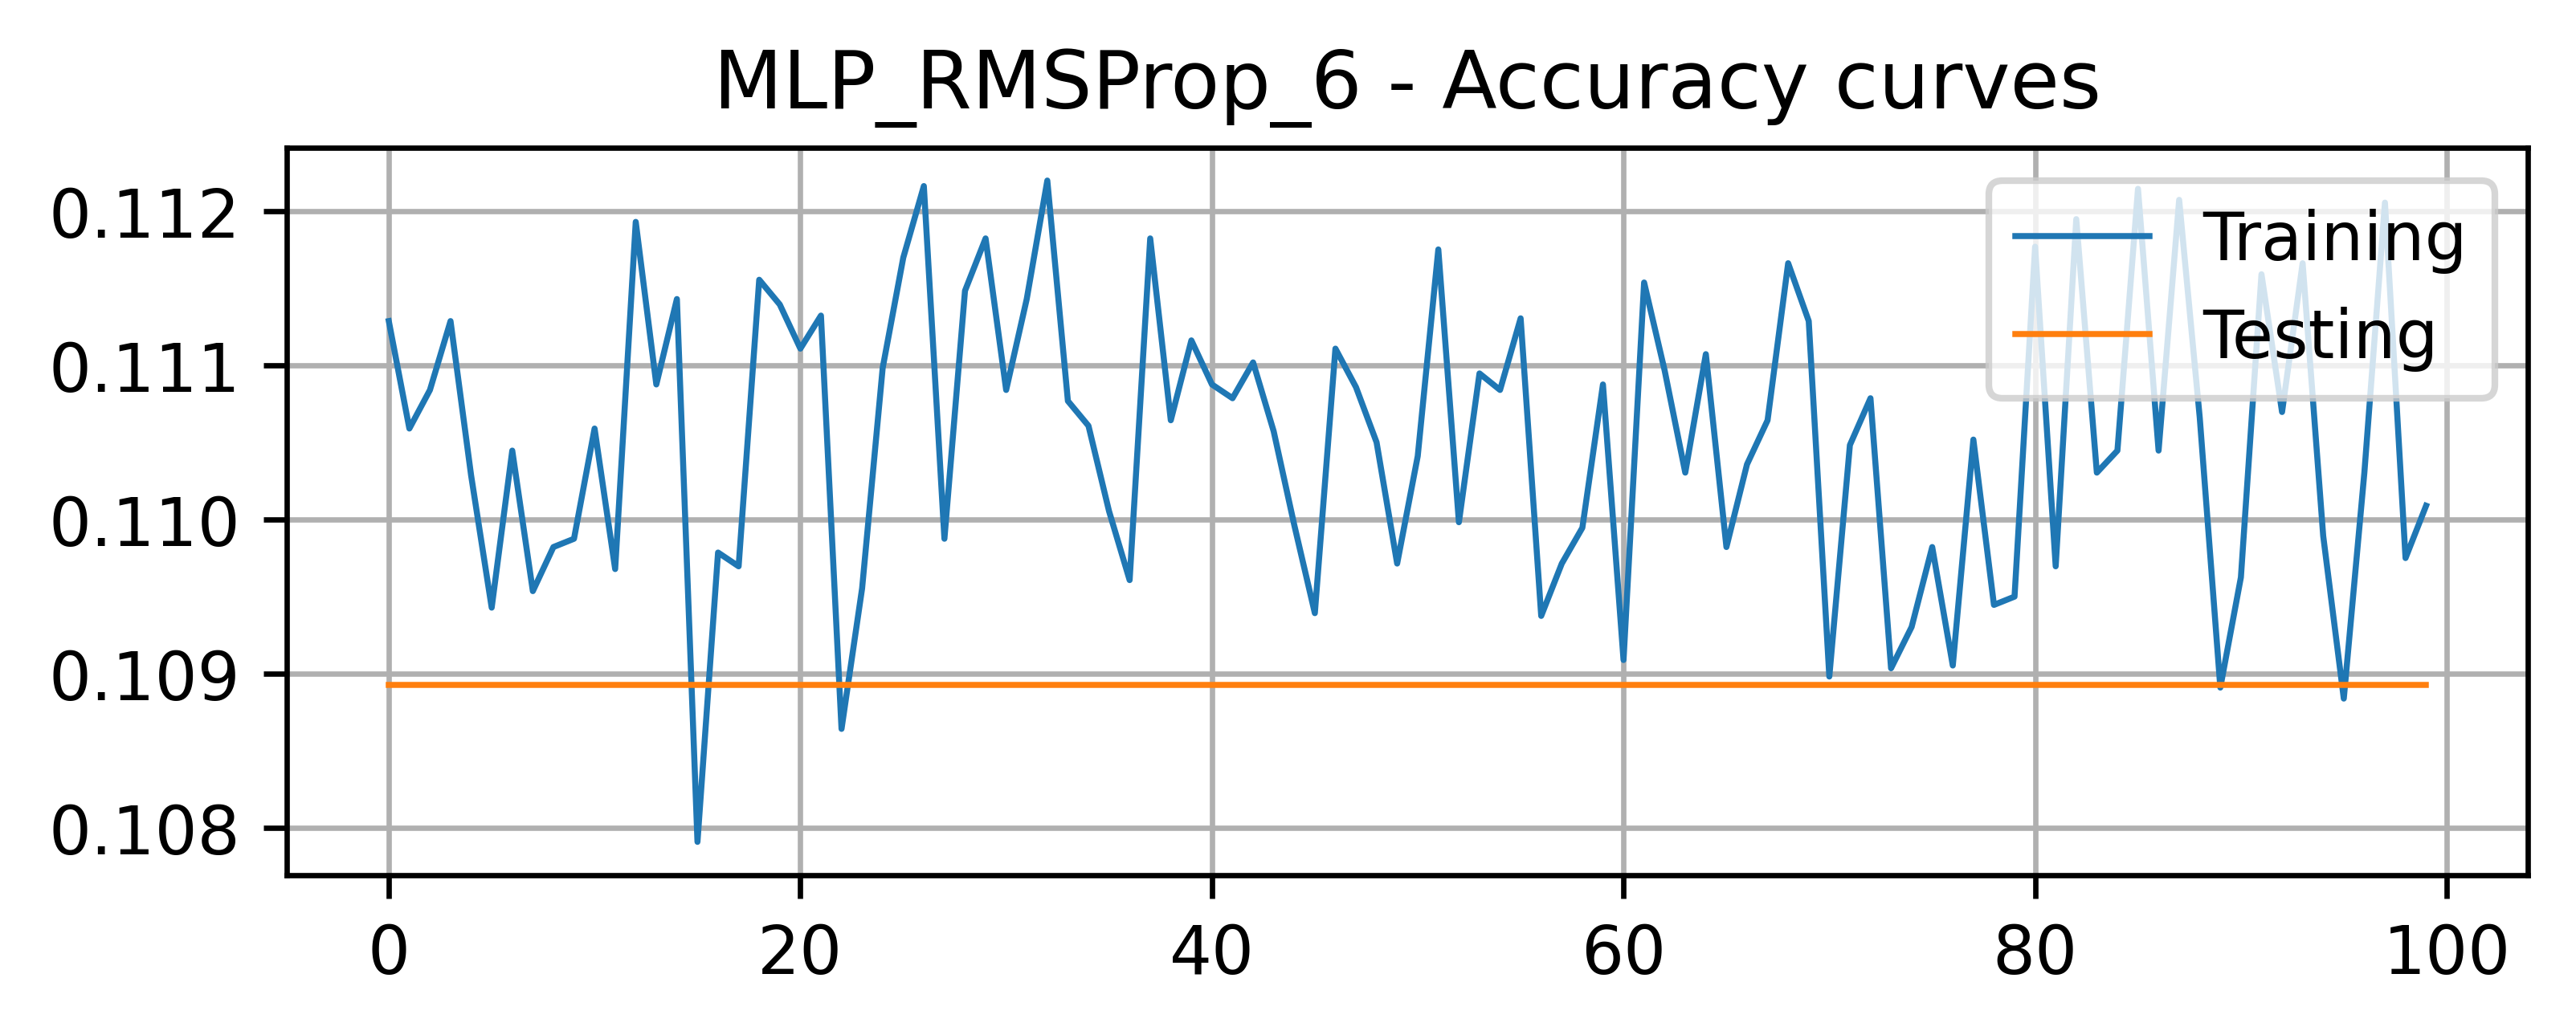

In [47]:
# display results
utils.disp_results(mlp_rmsprop_6, X_train, y_train, X_test, y_test, mlp_rmsprop_6_history)

$L1$ regularization and dropout layers lead to underfitting.

# **$3$. MLP with SGD optimizer**

***Weight initializer**: Gaussian distribution, mean = 10*

In [48]:
gaussian_mean = 10

## $a$. Default Case

In [49]:
# create model
mlp_sgd_1 = utils.create_mlp("MLP_SGD_1", 
                            n_hidden_1, n_hidden_2, 
                            num_features, num_classes,
                            gaussian_init=True, gaussian_mean=gaussian_mean)

In [50]:
# compile model
mlp_sgd_1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=loss, 
              metrics=metrics)

# train model
mlp_sgd_1_history = mlp_sgd_1.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=verbose)

Evaluation on training data:
1750/1750 [==============================] - 3s 1ms/step - loss: 2.3009 - accuracy: 0.1134
Evaluation on testing data:
438/438 [==============================] - 1s 1ms/step - loss: 2.3020 - accuracy: 0.1089


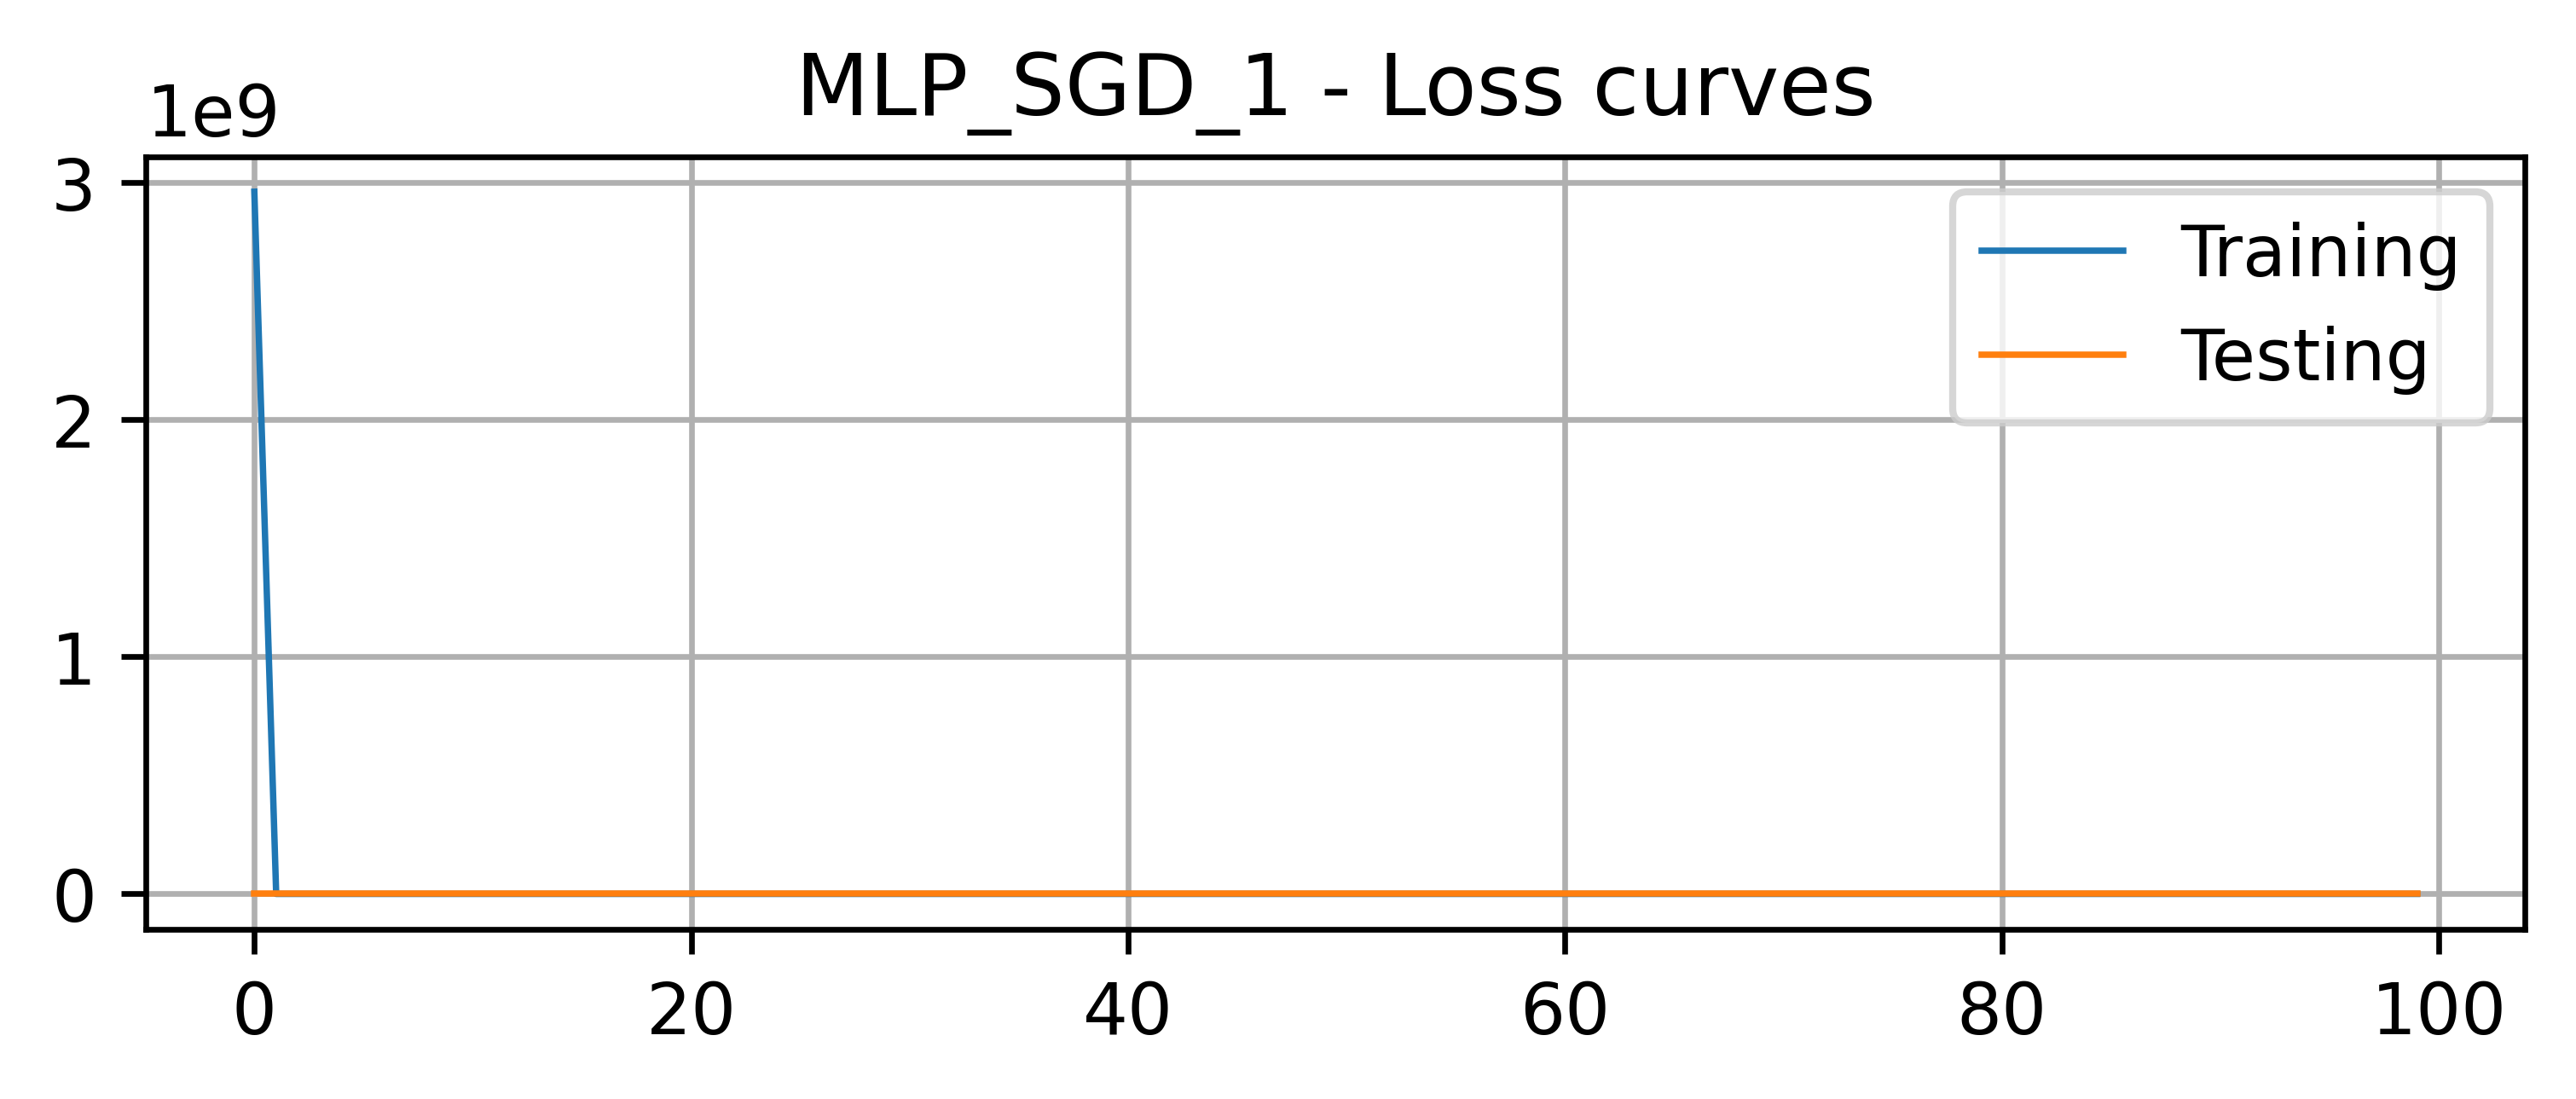

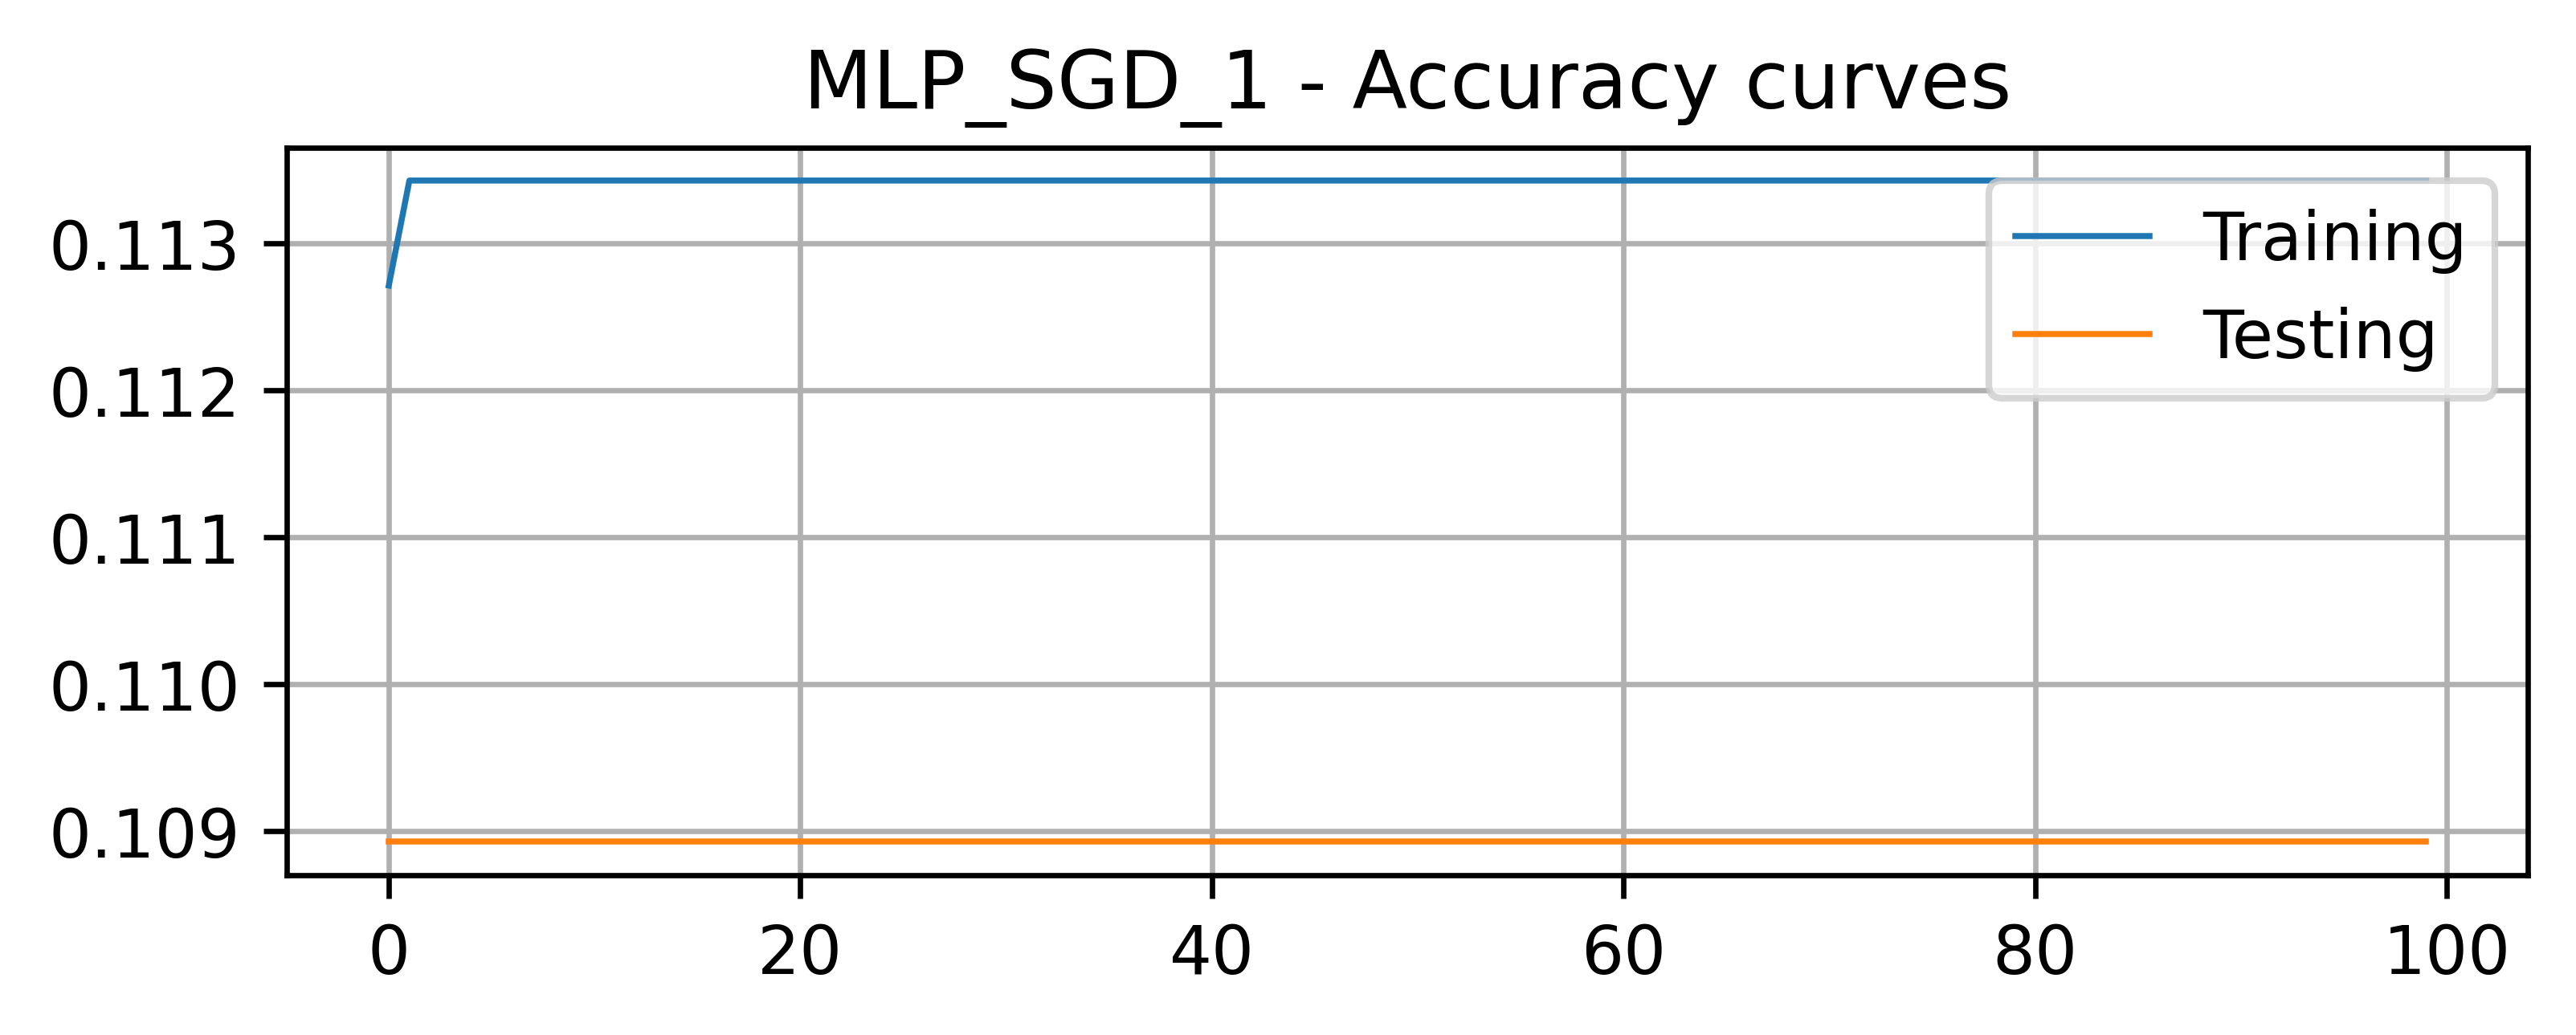

In [51]:
# display results
utils.disp_results(mlp_sgd_1, X_train, y_train, X_test, y_test, mlp_sgd_1_history)

## $b$. $L2$ regularization

### $i)$ $\;\alpha=0.1$

In [52]:
a_reg = 0.1

In [53]:
# create model
mlp_sgd_2 = utils.create_mlp("MLP_SGD_2", 
                            n_hidden_1, n_hidden_2, 
                            num_features, num_classes,
                            gaussian_init=True, gaussian_mean=gaussian_mean,
                            kernel_reg="l2", a_reg=a_reg)

In [54]:
# compile model
mlp_sgd_2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=loss, 
              metrics=metrics)

# train model
mlp_sgd_2_history = mlp_sgd_2.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=verbose)

Evaluation on training data:
1750/1750 [==============================] - 3s 2ms/step - loss: 2.3009 - accuracy: 0.1134
Evaluation on testing data:
438/438 [==============================] - 1s 1ms/step - loss: 2.3020 - accuracy: 0.1089


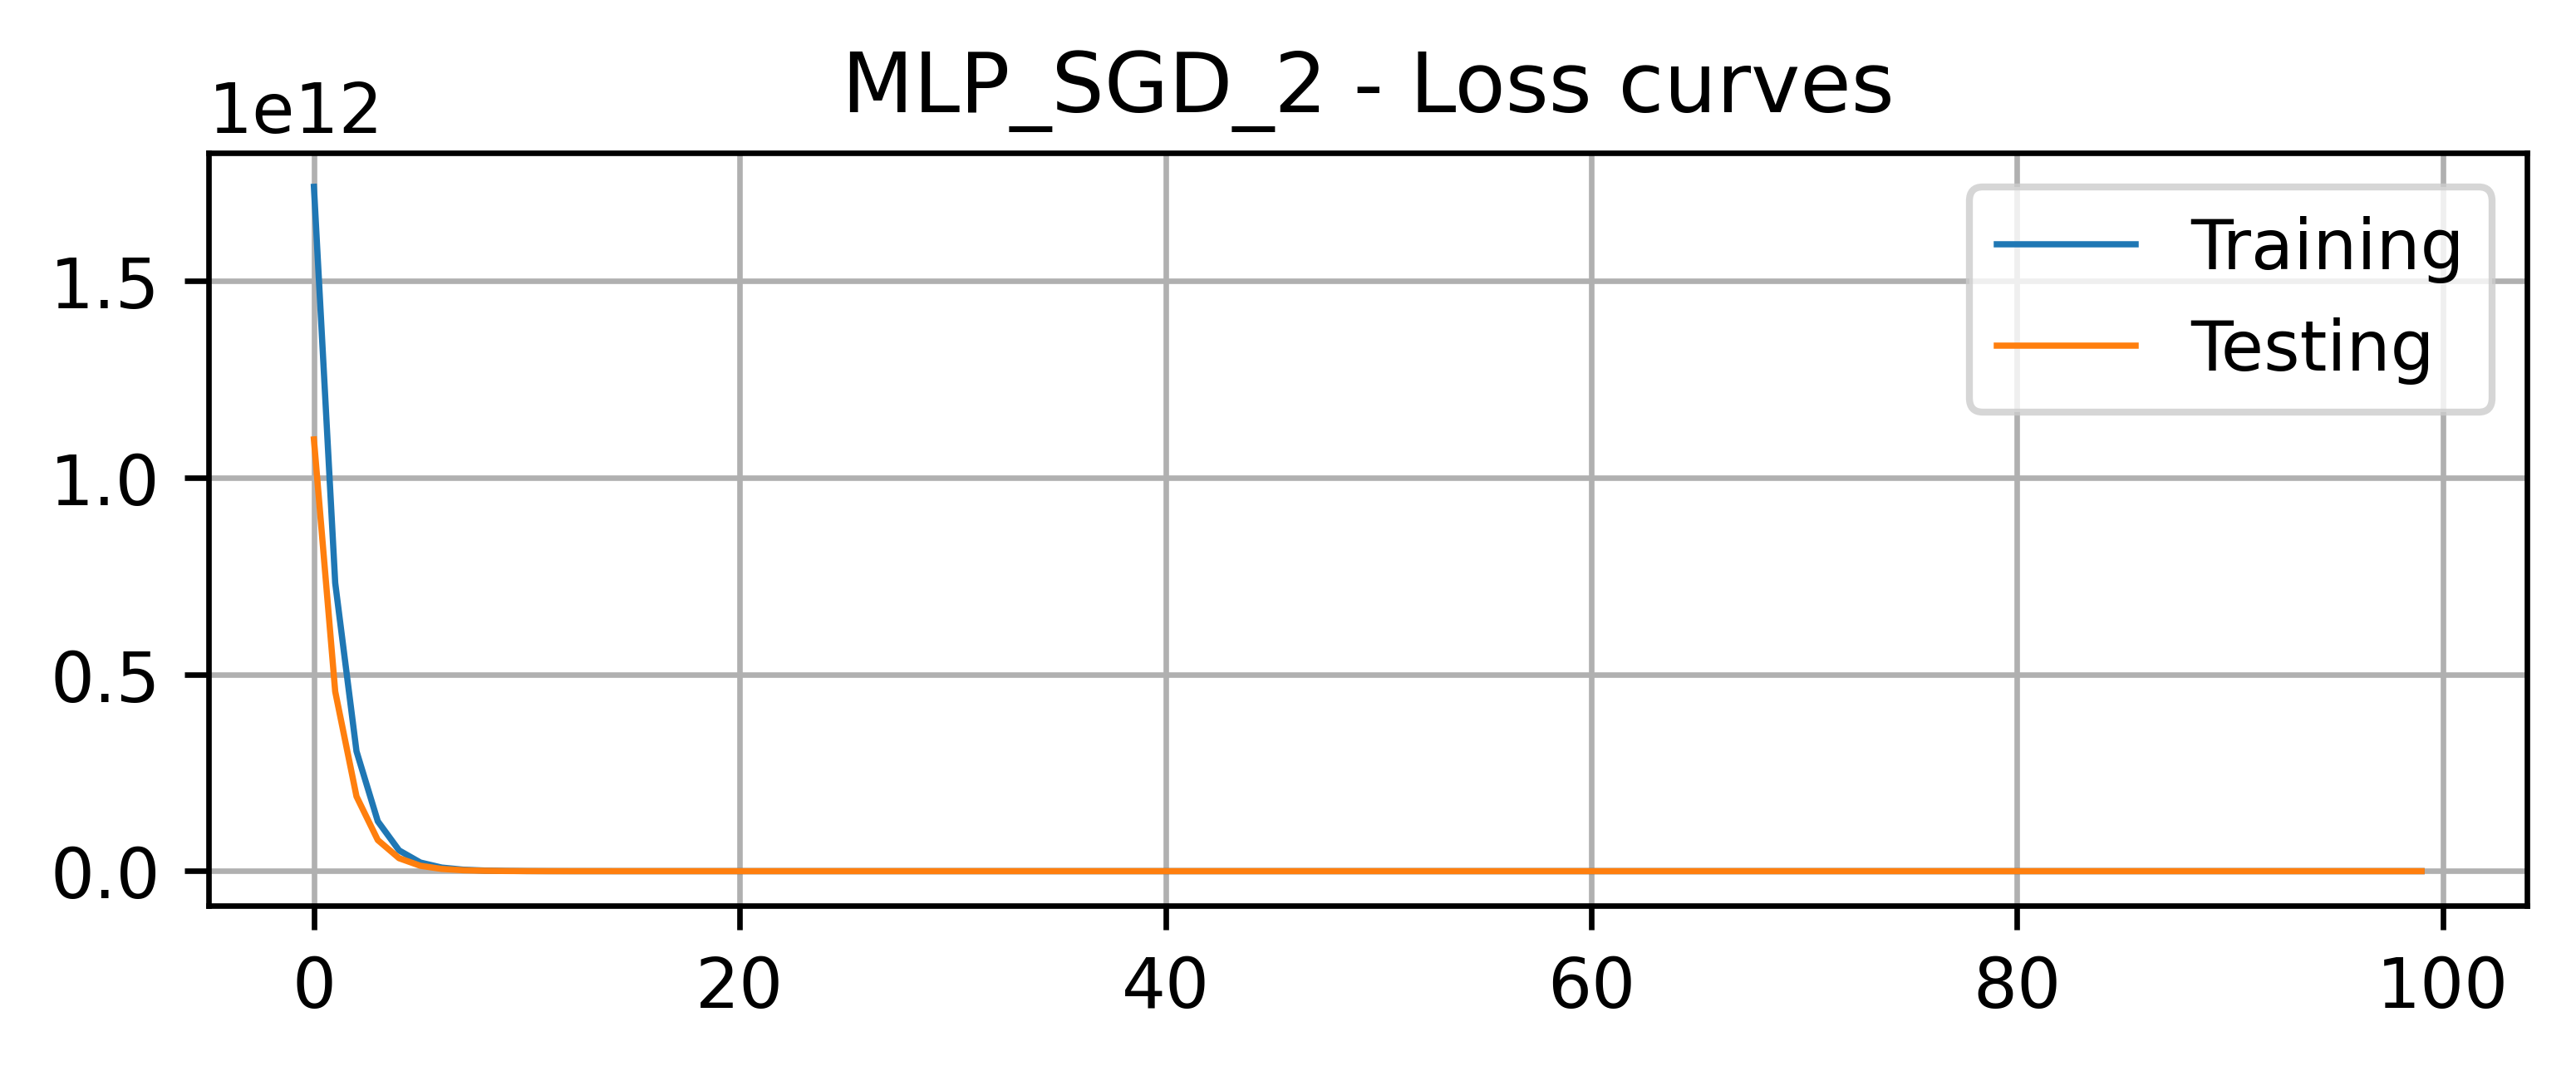

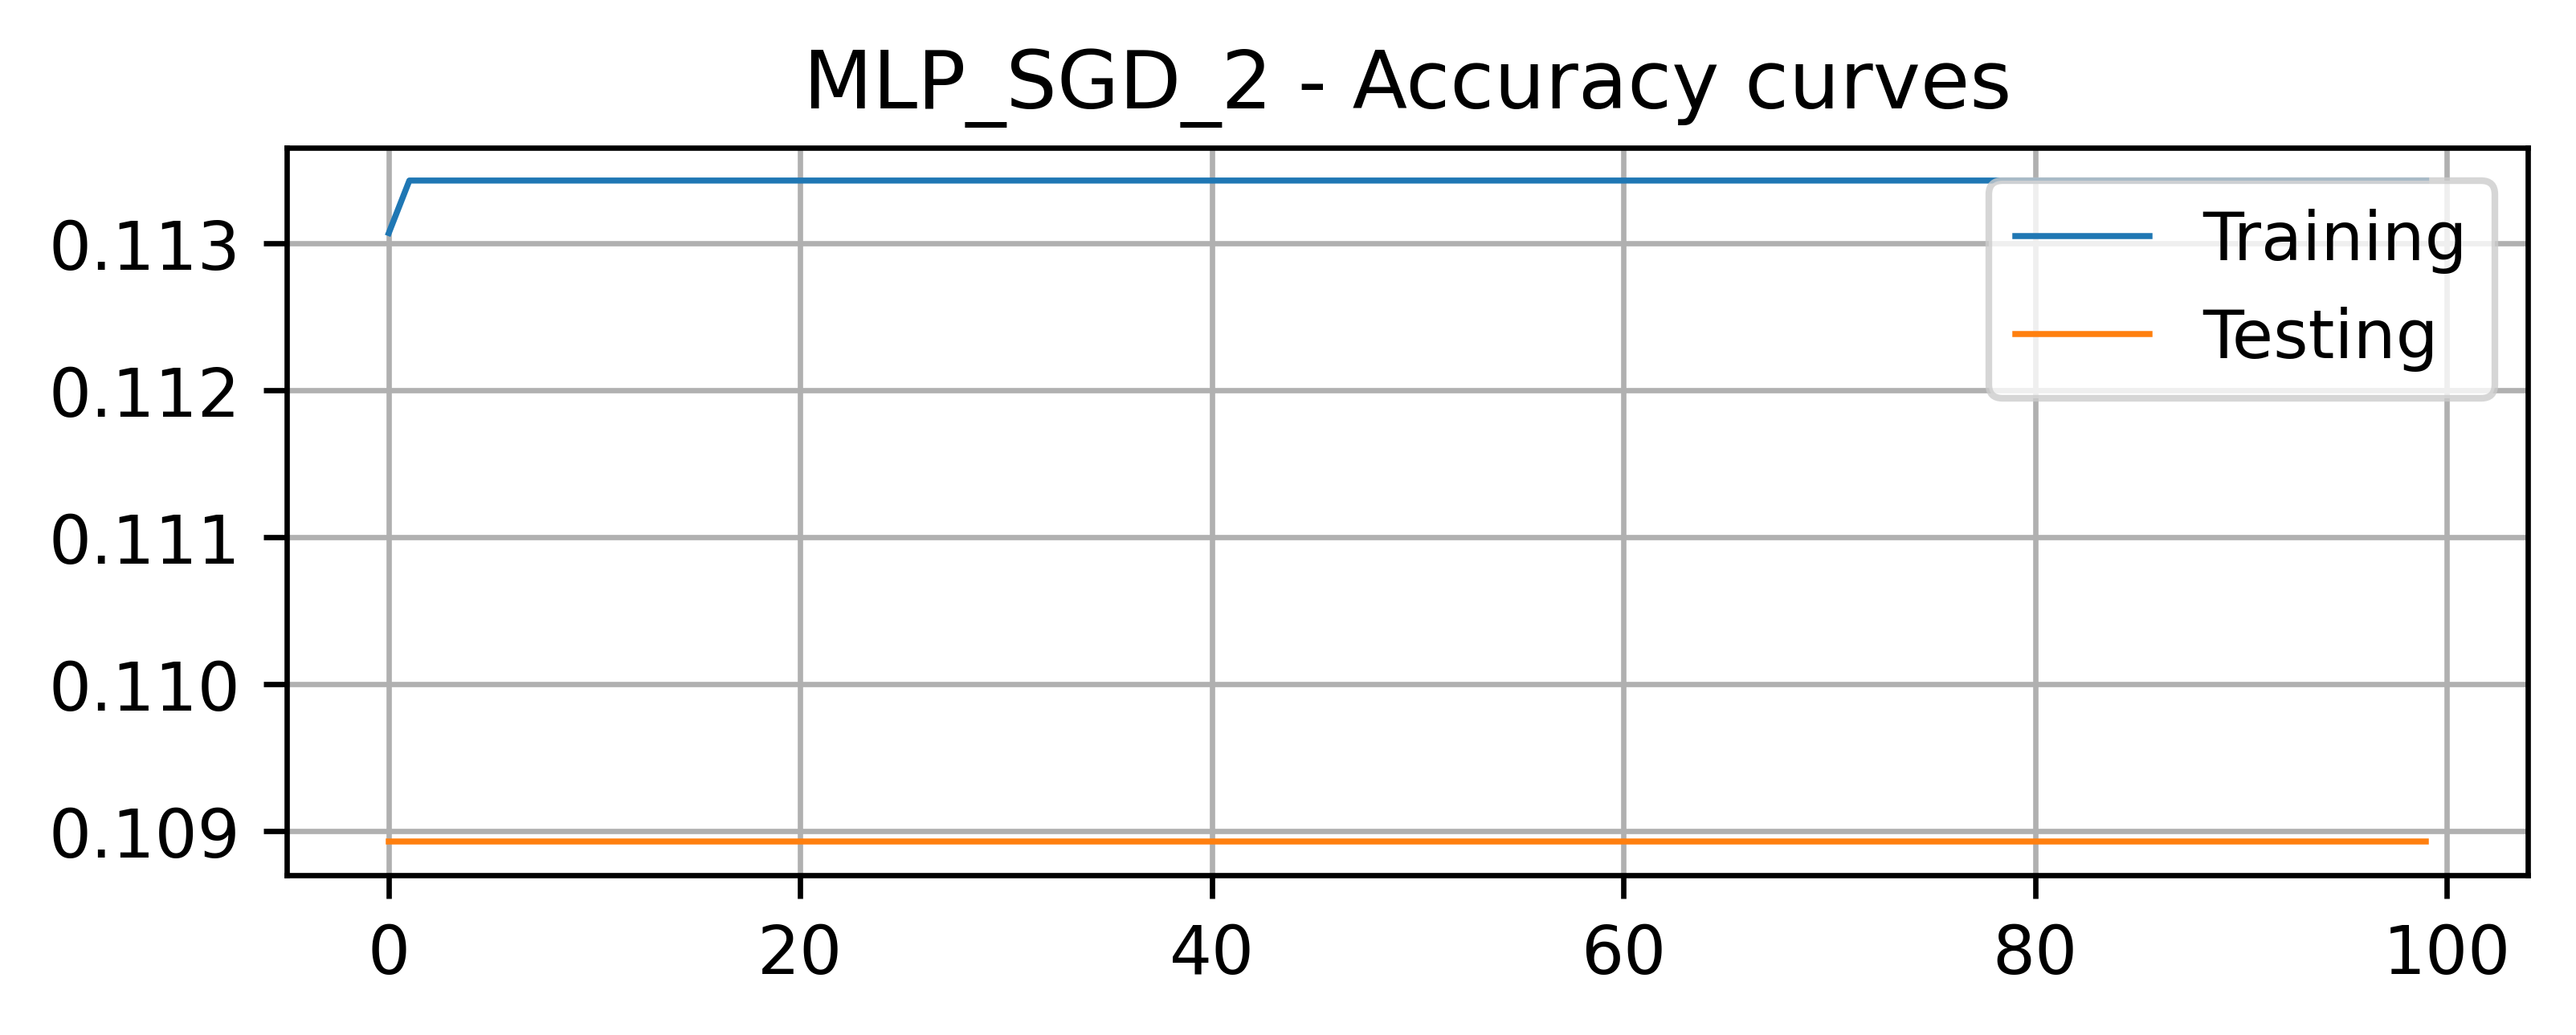

In [55]:
# display results
utils.disp_results(mlp_sgd_2, X_train, y_train, X_test, y_test, mlp_sgd_2_history)

### $ii)$ $\;\alpha=0.01$

In [56]:
a_reg = 0.01

In [57]:
# create model
mlp_sgd_3 = utils.create_mlp("MLP_SGD_3", 
                            n_hidden_1, n_hidden_2, 
                            num_features, num_classes,
                            gaussian_init=True, gaussian_mean=gaussian_mean,
                            kernel_reg="l2", a_reg=a_reg)

In [58]:
# compile model
mlp_sgd_3.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=loss, 
              metrics=metrics)

# train model
mlp_sgd_3_history = mlp_sgd_3.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=verbose)

Evaluation on training data:
1750/1750 [==============================] - 3s 2ms/step - loss: 80134112.0000 - accuracy: 0.1134
Evaluation on testing data:
438/438 [==============================] - 1s 1ms/step - loss: 80134040.0000 - accuracy: 0.1089


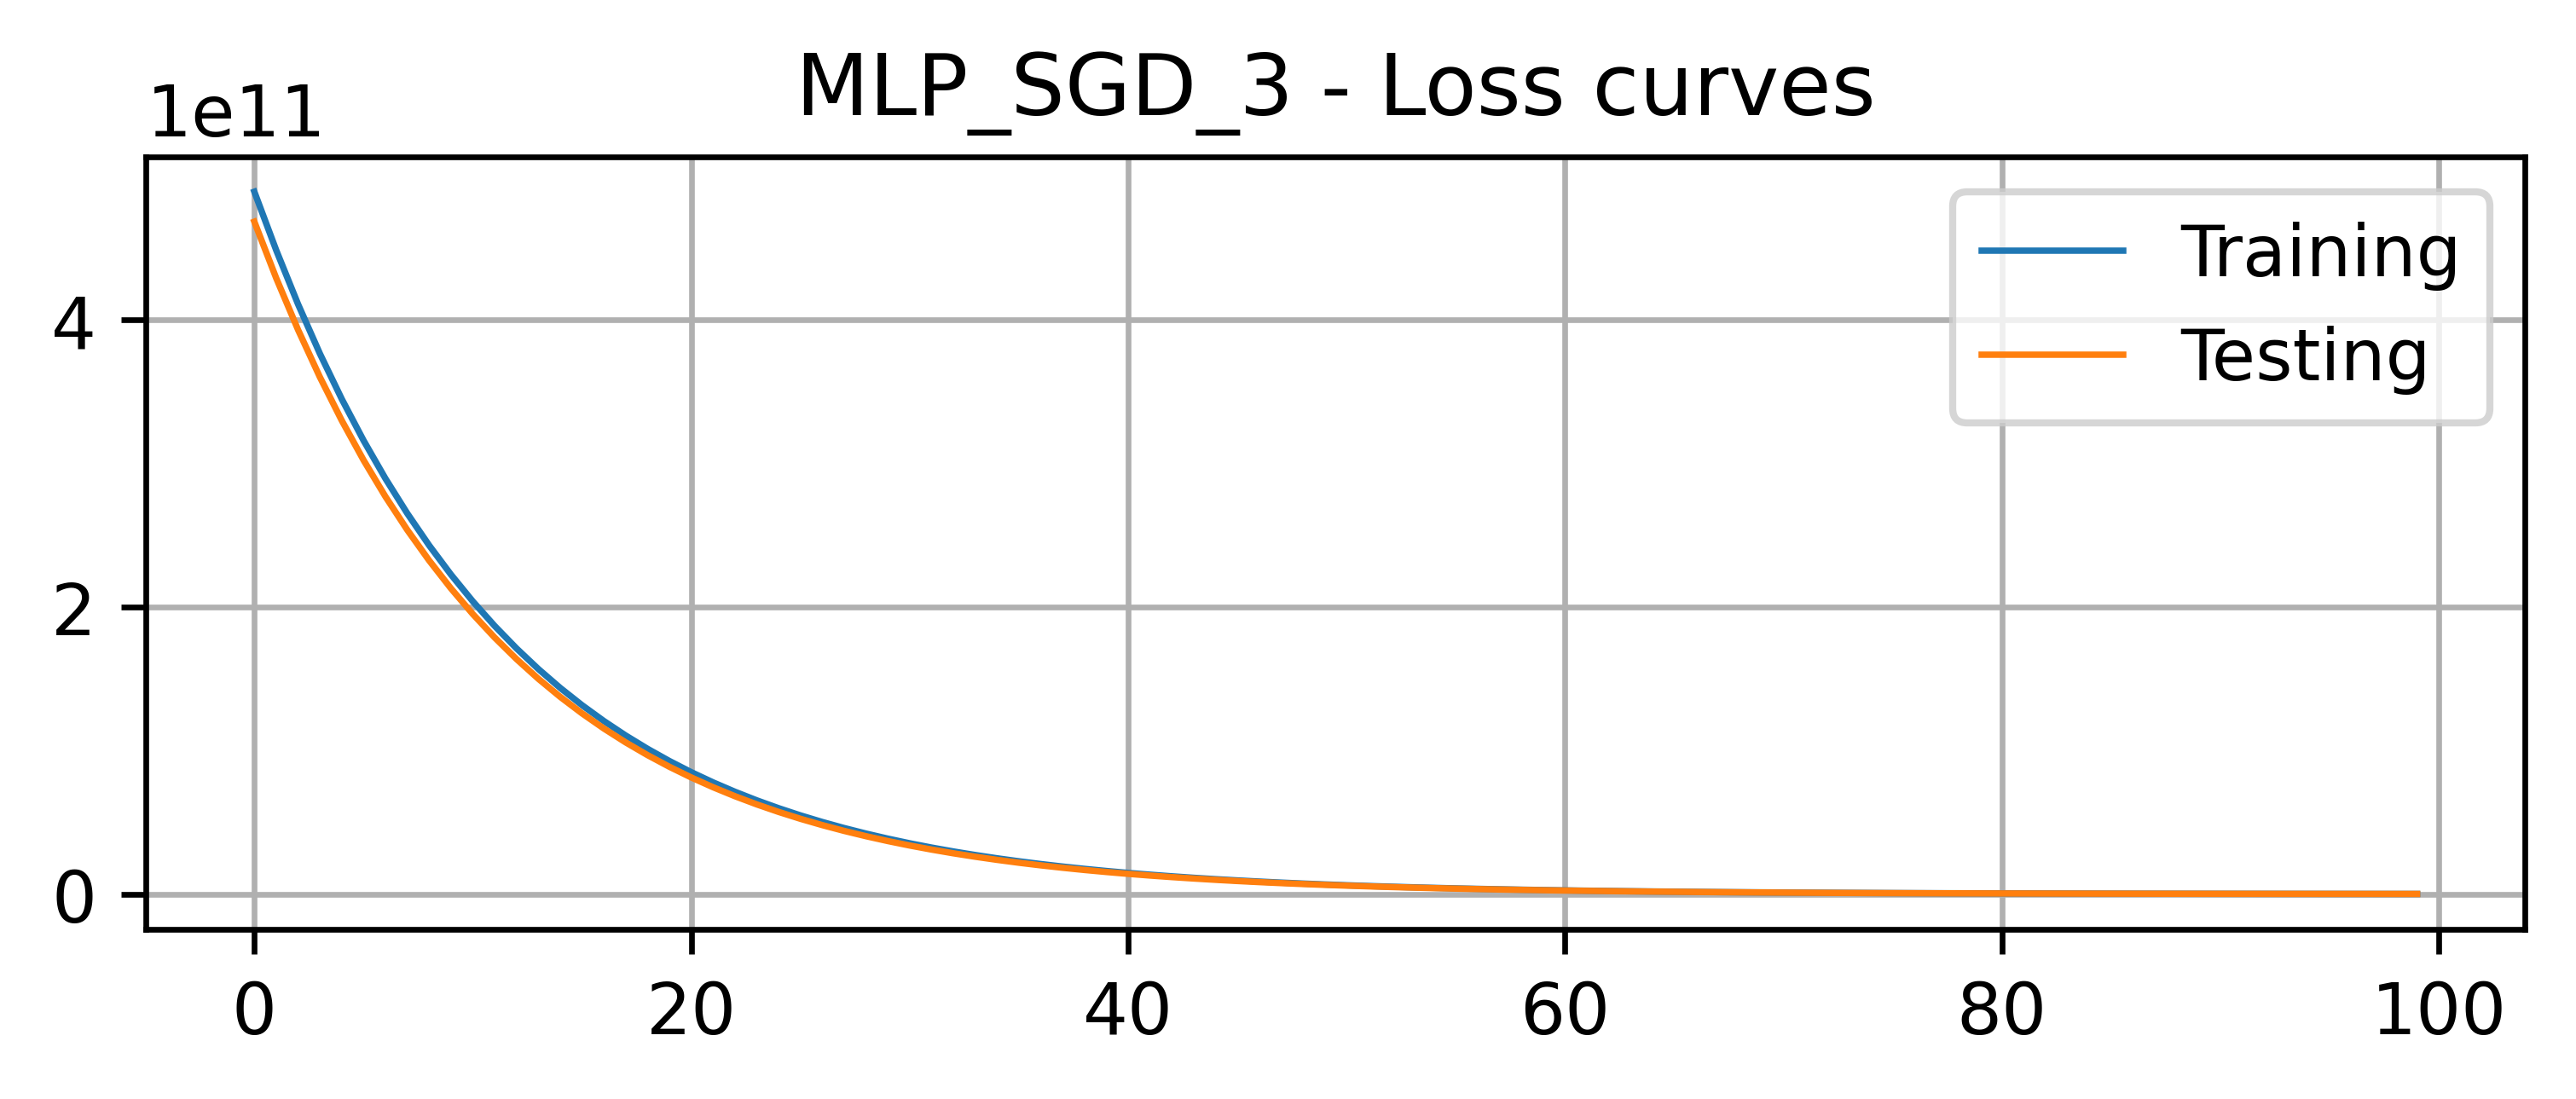

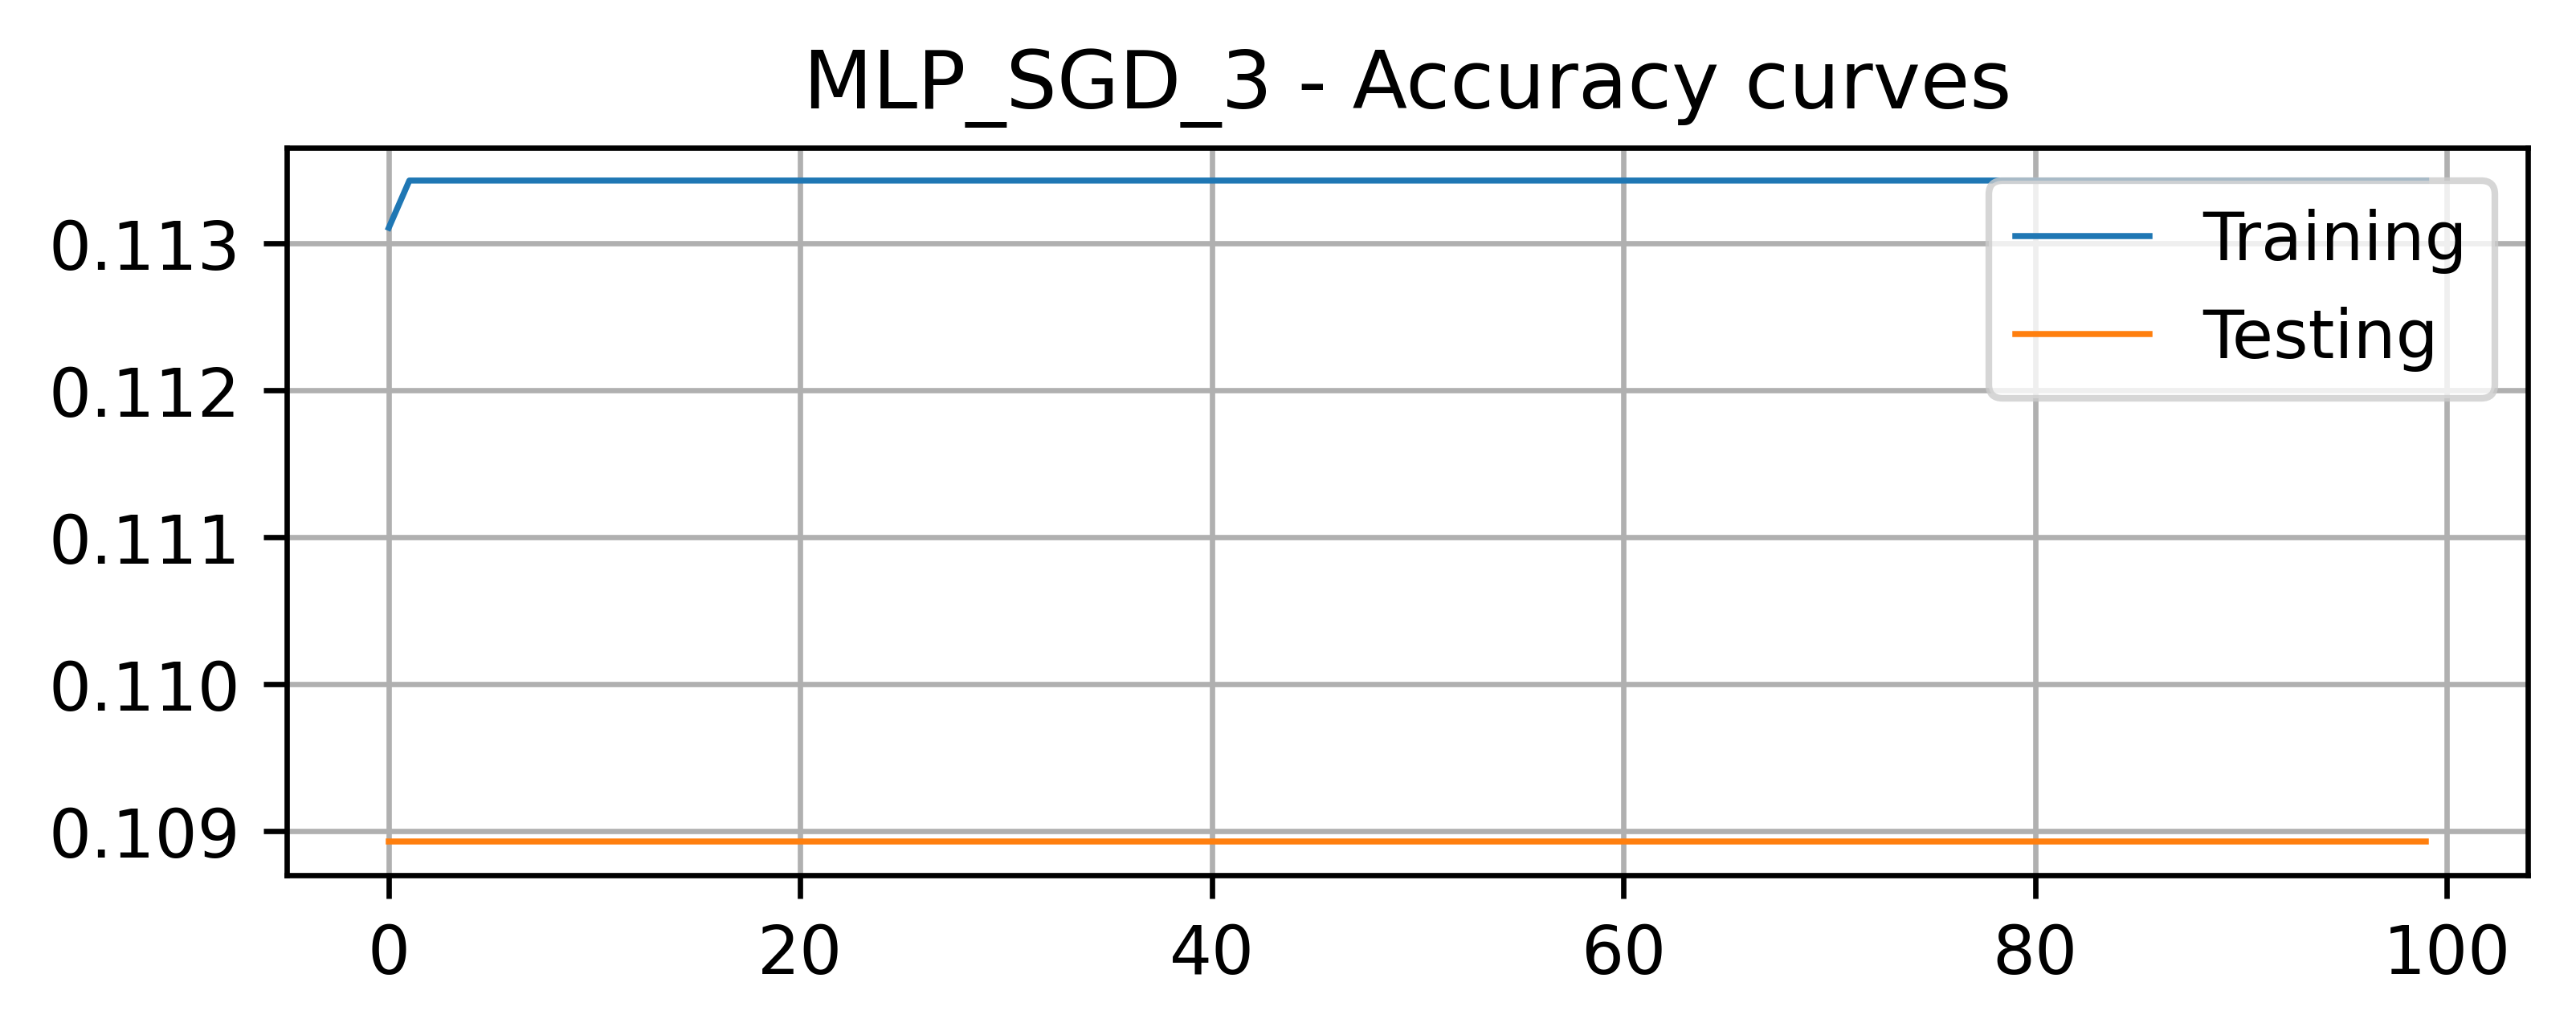

In [59]:
# display results
utils.disp_results(mlp_sgd_3, X_train, y_train, X_test, y_test, mlp_sgd_3_history)

## $c$. $L1$ regularization ($\alpha=0.01$) & Dropout ($probability=0.3$)

In [60]:
a_reg = 0.01
dropout_prob = 0.3

In [61]:
# create model
mlp_sgd_4 = utils.create_mlp("MLP_SGD_4", 
                            n_hidden_1, n_hidden_2, 
                            num_features, num_classes,
                            gaussian_init=True, gaussian_mean=gaussian_mean,
                            kernel_reg="l1", a_reg=a_reg,
                            dropout_layers=True, dropout_prob=dropout_prob)

In [62]:
# compile model
mlp_sgd_4.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=loss, 
              metrics=metrics)

# train model
mlp_sgd_4_history = mlp_sgd_4.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=verbose)

Evaluation on training data:
1750/1750 [==============================] - 3s 2ms/step - loss: 10678.6094 - accuracy: 0.0976
Evaluation on testing data:
438/438 [==============================] - 1s 1ms/step - loss: 10678.5957 - accuracy: 0.0969


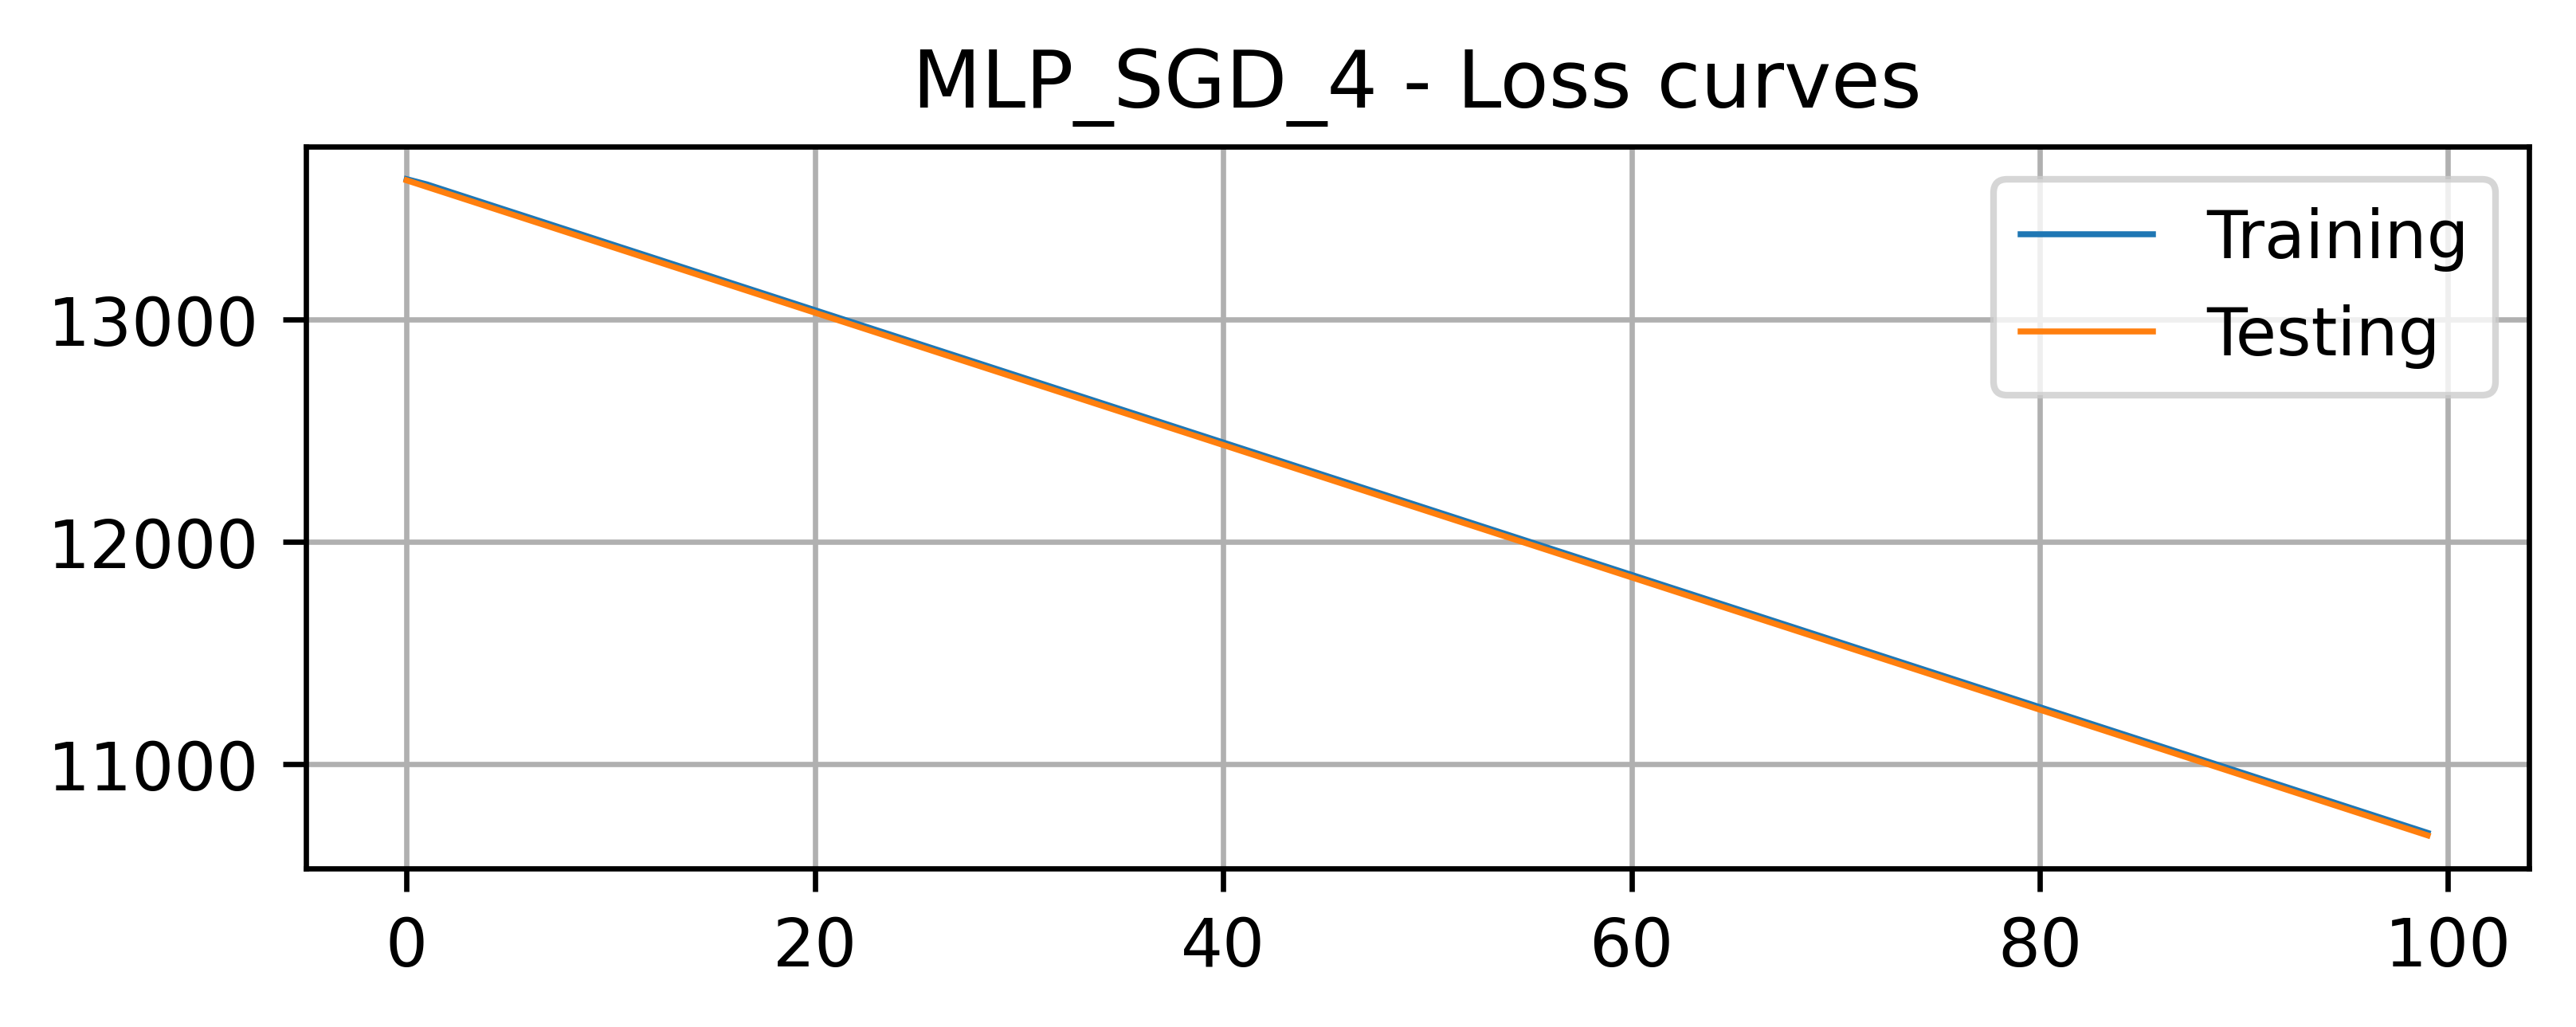

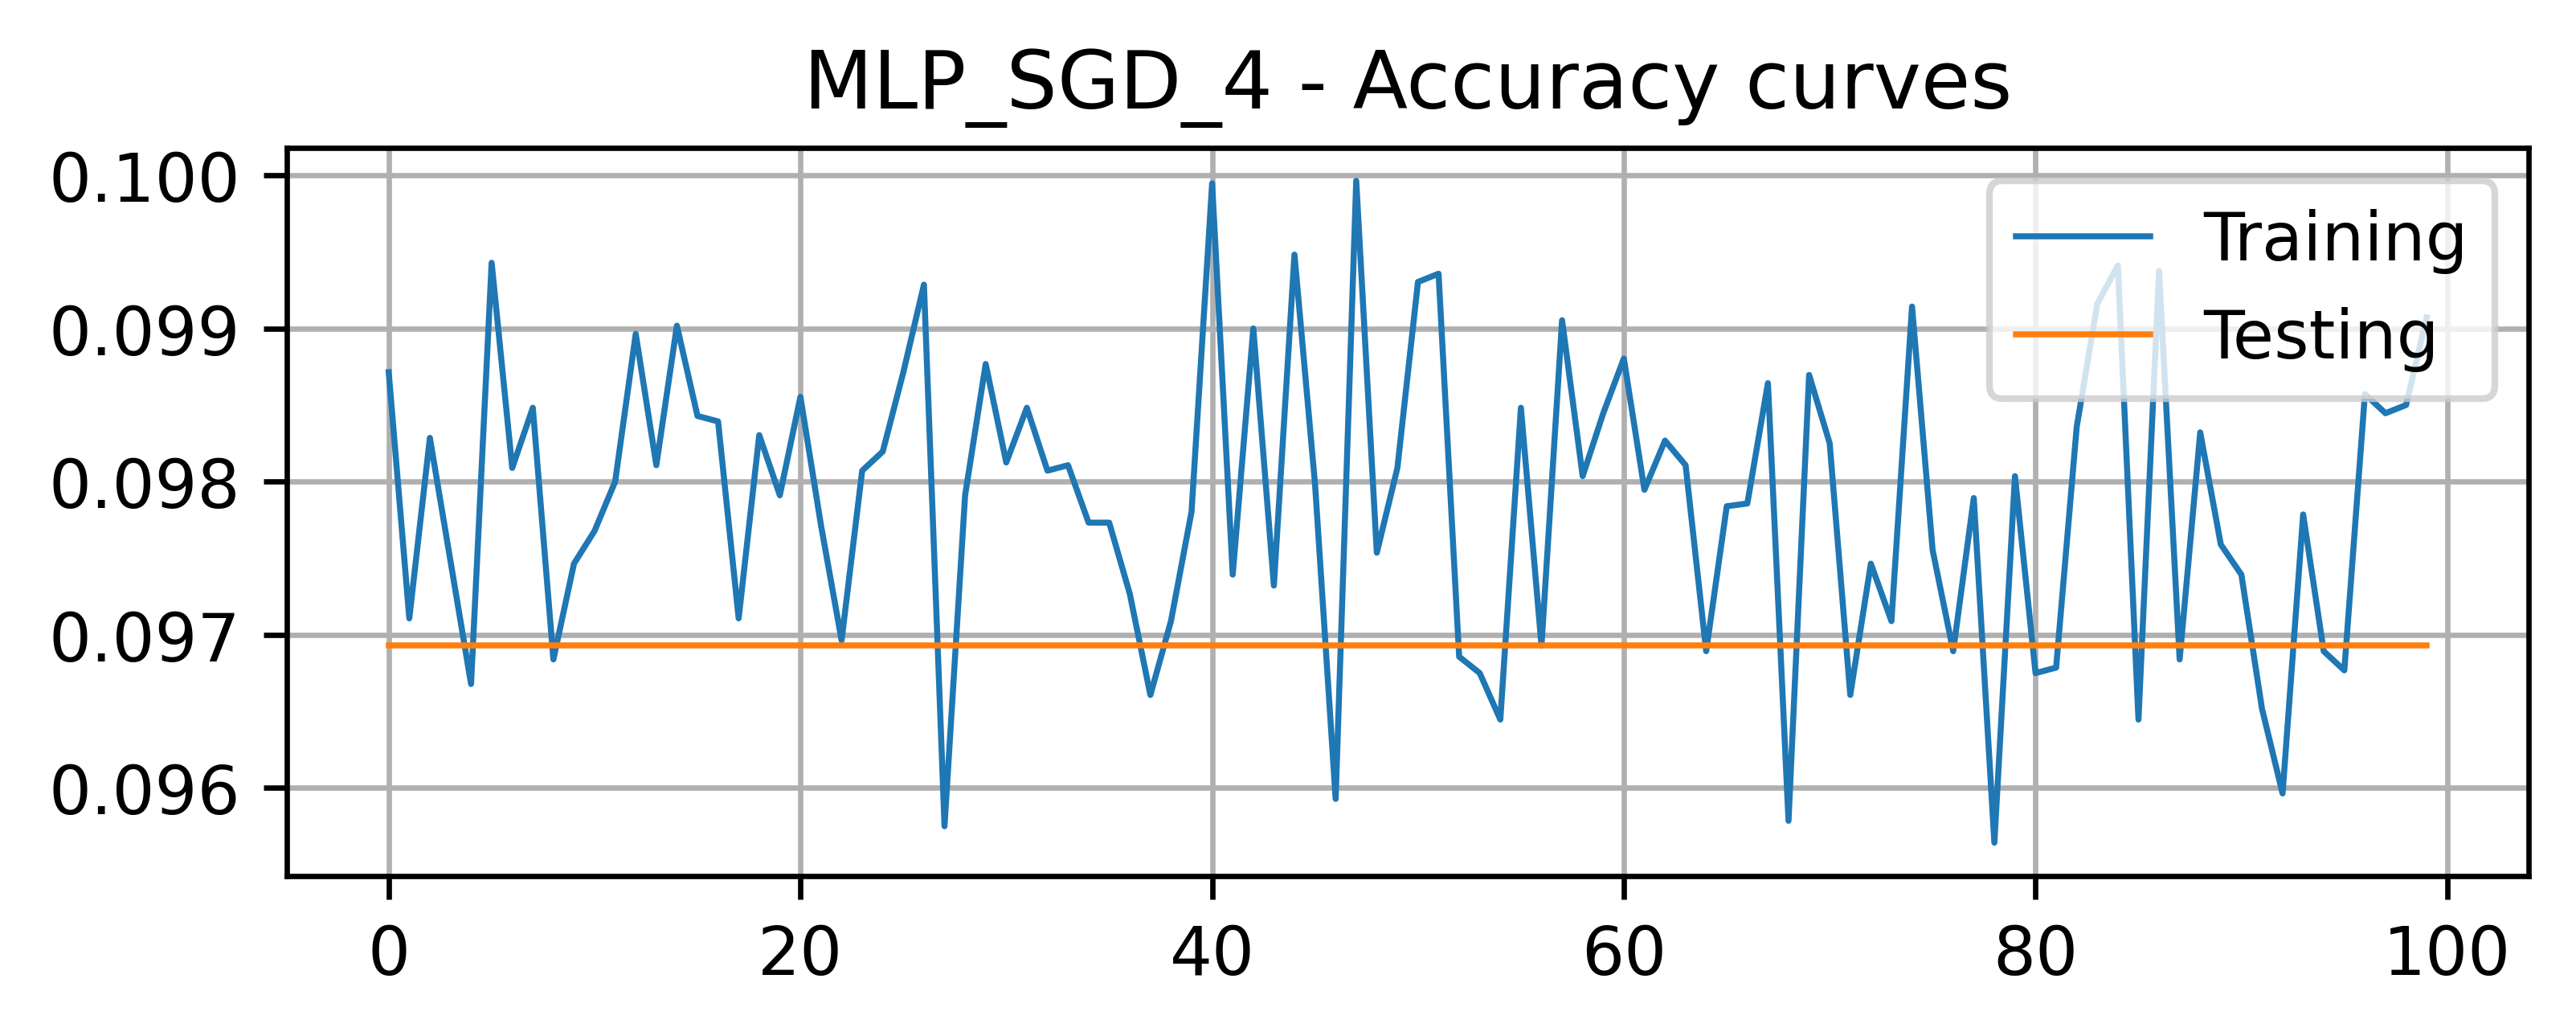

In [63]:
# display results
utils.disp_results(mlp_sgd_4, X_train, y_train, X_test, y_test, mlp_sgd_4_history)

*SGD* presents underfitting in all cases. Probably the model gets trapped in local optimal.

## **$4$. Additional Comments - Training speed in default cases**
![title](fig/MLP_Adam_1_Loss.jpg)
![title](fig/MLP_RMSProp_1_Loss.jpg)
![title](fig/MLP_RMSProp_2_Loss.jpg)
![title](fig/MLP_SGD_1_Loss.jpg)

In the default cases, *Adam* and *RMSProp* present similar training speed based on their training curves. They both cross the threshold of 0.1 in less than 5 seconds and could be considered equivalent fast. On the other hand, *SGD* fails to train the model properly, so there is no point of comparison with the other optimizers in terms of speed.